In [4]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter  # Import FuncFormatter from matplotlib.ticker

# I. Read dataset

In [5]:
df_cleaned=pd.read_csv('01_df_cleaned.csv', delimiter=',')
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(df_cleaned.head())
    print(df_cleaned.shape)

  Result_offer  Amount_DE  Amount_HD  Amount_ID  Amount_OTHER  Amount_PP  Amount_PS  Amount_SP  Total_Amount   SR_codigo Bid_Notbid  Resolution_time Client_type Market_segment              Client_BU Country Client_importance Coverage_model
0         Lost    64200.0        0.0        0.0           0.0        0.0        0.0        0.0       64200.0  SR-2468496        Bid             14.8  Contractor            BDZ         Power Products      ES               MA3      Sales Rep
1          Won    67500.0        0.0   480000.0           0.0   222000.0  1155000.0        0.0     1924500.0  SR-2468507        Bid             57.7  Contractor            E34  INDUSTRIAL AUTOMATION      ES               MS3      Sales Rep
2         Lost   111600.0        0.0        0.0           0.0        0.0      300.0        0.0      111900.0  SR-2468656        Bid              2.1  Contractor            I9Z         Power Products      ES               MS3      Sales Rep
3         Lost   111600.0        0.0    

# II. Mapping for correlation

* Converted Result_offer, Bid_Notbid and Country into numbers to check correlations.

In [6]:
# Mapping categorical values to numerical values: Result_offer & Bid_Notbid

# Map Result_offer to numerical values
result_offer_mapping = {'Won': 1, 'Lost': -1, 'Pipeline': 0}
df_cleaned['Result_offer_mapped'] = df_cleaned['Result_offer'].map(result_offer_mapping)

# Display updated unique values in the column
unique_values_result_offer = df_cleaned['Result_offer_mapped'].unique()
print("Unique values in 'Result_offer' (mapped)':")
print(unique_values_result_offer)

#----------------------------------------------------------------------------

# Map Bid_Notbid to numerical values
bid_notbid_mapping = {'Bid': 1, 'Not_bid': -1, 'Not_decided_yet': 0}
df_cleaned['Bid_Notbid_mapped'] = df_cleaned['Bid_Notbid'].map(bid_notbid_mapping)

# Display updated unique values in the column
unique_values_bid_notbid = df_cleaned['Bid_Notbid_mapped'].unique()
print("Unique values in 'Bid_Notbid' (mapped)':")
print(unique_values_bid_notbid)

#----------------------------------------------------------------------------
# Map Country to numerical values
country_mapping = {'ES': 1, 'PT': -1, 'Not informed': 0, 'GB': 0, 'AD': 0}
df_cleaned['Country_mapped'] = df_cleaned['Country'].map(country_mapping)

# Display updated unique values in the column
unique_values_country = df_cleaned['Country_mapped'].unique()
print("Unique values in 'Country' (mapped)':")
print(unique_values_country)

Unique values in 'Result_offer' (mapped)':
[-1  1  0]
Unique values in 'Bid_Notbid' (mapped)':
[ 1 -1  0]
Unique values in 'Country' (mapped)':
[ 1 -1  0]


# II. Zeros analysis

In [7]:
#Calculate zeros in columns
amount_columns = ['Amount_DE', 'Amount_HD', 'Amount_ID', 'Amount_OTHER', 'Amount_PP', 'Amount_PS', 'Amount_SP', 'Total_Amount']

for col in amount_columns:
    print(f"{col}: {df_cleaned[col].eq(0).mean() * 100:.2f}% zeros")

Amount_DE: 68.10% zeros
Amount_HD: 98.17% zeros
Amount_ID: 84.84% zeros
Amount_OTHER: 98.54% zeros
Amount_PP: 76.65% zeros
Amount_PS: 52.96% zeros
Amount_SP: 97.10% zeros
Total_Amount: 0.12% zeros


In [8]:
# Rows where Total_Amount is equal to 0

# Filter rows where Total_Amount is 0
total_amount_zero = df_cleaned[df_cleaned['Total_Amount'] == 0]

# Display the filtered rows
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(f"\nNumber of rows where Total_Amount is 0: {len(total_amount_zero)}")
    print("Rows where Total_Amount is 0:")
total_amount_zero

# Optionally, export these rows to a CSV file
# total_amount_zero_rows.to_csv('rows_with_total_amount_zero.csv', index=False)



Number of rows where Total_Amount is 0: 26
Rows where Total_Amount is 0:


Result_offer  Amount_DE  Amount_HD  Amount_ID  Amount_OTHER  Amount_PP  \
81             Won        0.0        0.0        0.0           0.0        0.0   
1812           Won        0.0        0.0        0.0           0.0        0.0   
2139          Lost        0.0        0.0        0.0           0.0        0.0   
2203          Lost        0.0        0.0        0.0           0.0        0.0   
3054      Pipeline        0.0        0.0        0.0           0.0        0.0   
3657          Lost        0.0        0.0        0.0           0.0        0.0   
5220      Pipeline        0.0        0.0        0.0           0.0        0.0   
5668      Pipeline        0.0        0.0        0.0           0.0        0.0   
5869      Pipeline        0.0        0.0        0.0           0.0        0.0   
5917      Pipeline        0.0        0.0        0.0           0.0        0.0   
6224      Pipeline        0.0        0.0        0.0           0.0        0.0   
6233      Pipeline        0.0        0.0        0.0           0.0        0.0   
6470      Pipeline        0.0        0.0        0.0           0.0        0.0   
6591      Pipeline        0.0        0.0        0.0           0.0        0.0   
6774      Pipeline        0.0        0.0        0.0           0.0        0.0   
7020      Pipeline        0.0        0.0        0.0           0.0        0.0   
7160      Pipeline        0.0        0.0        0.0           0.0        0.0   
7430      Pipeline        0.0        0.0        0.0           0.0        0.0   
7683      Pipeline        0.0        0.0        0.0           0.0        0.0   
9522      Pipeline        0.0        0.0        0.0           0.0        0.0   
10113          Won        0.0        0.0        0.0           0.0        0.0   
15871         Lost        0.0        0.0        0.0           0.0        0.0   
17298     Pipeline        0.0        0.0        0.0           0.0        0.0   
17971     Pipeline        0.0        0.0        0.0           0.0        0.0   
19319         Lost        0.0        0.0        0.0           0.0        0.0   
20342         Lost        0.0        0.0        0.0           0.0        0.0   

       Amount_PS  Amount_SP  Total_Amount   SR_codigo  ... Resolution_time  \
81           0.0        0.0           0.0  SR-2475645  ...            19.2   
1812         0.0        0.0           0.0  SR-2564709  ...            11.0   
2139         0.0        0.0           0.0  SR-2584391  ...            28.0   
2203         0.0        0.0           0.0  SR-2587791  ...            33.0   
3054         0.0        0.0           0.0  SR-2631973  ...            17.2   
3657         0.0        0.0           0.0  SR-2662588  ...             8.1   
5220         0.0        0.0           0.0  SR-2755839  ...            20.1   
5668         0.0        0.0           0.0  SR-2777273  ...            32.0   
5869         0.0        0.0           0.0  SR-2787855  ...            17.1   
5917         0.0        0.0           0.0  SR-2790932  ...            12.1   
6224         0.0        0.0           0.0  SR-2806639  ...             7.0   
6233         0.0        0.0           0.0  SR-2807463  ...            15.1   
6470         0.0        0.0           0.0  SR-2822385  ...            35.0   
6591         0.0        0.0           0.0  SR-2828401  ...            27.2   
6774         0.0        0.0           0.0  SR-2840370  ...             3.0   
7020         0.0        0.0           0.0  SR-2853327  ...             4.0   
7160         0.0        0.0           0.0  SR-2859908  ...            10.9   
7430         0.0        0.0           0.0  SR-2871694  ...             8.7   
7683         0.0        0.0           0.0  SR-2883757  ...            12.9   
9522         0.0        0.0           0.0  SR-2979818  ...            30.2   
10113        0.0        0.0           0.0  SR-3006773  ...             7.0   
15871        0.0        0.0           0.0  SR-3307992  ...            18.0   
17298        0.0        0.0           0.0  SR-33784

## Convert to NaN the Zeros in Amount columns - only for statistical analyses

- Zeros in amount columns per BU:
    --> Converted to NaN to avoid skewing the calculations such as mean, percentiles, or distributions (as they are treated as valid numeric values). It artificially lowers percentiles and averages, leading to inaccurate analysis.
    --> We exclude the zeros to improve quartile and bin accuracy.

Converted in a separated dataframe to be able to try both approaches:
- use zeros --> having zeros gives information for the ML model. For the model we keep the ZEROS.
- not use zeros --> NaN values

In [9]:
#Zeros in amount colum
amount_columns = ['Amount_DE', 'Amount_HD', 'Amount_ID', 'Amount_OTHER', 'Amount_PP', 'Amount_PS', 'Amount_SP', 'Total_Amount']

# Create a copy of df_cleaned to maintain the original DataFrame unchanged
df_cleaned_nullamounts = df_cleaned.copy()

# Substitute zeros with NaN in the specified columns
df_cleaned_nullamounts[amount_columns] = df_cleaned_nullamounts[amount_columns].replace(0, np.nan)

# Display the first few rows of the modified DataFrame
df_cleaned_nullamounts.head()


# #Verify missing data - after cleansing
# missing_info = analyze_missing_data(df_cleaned_nullamounts)
# print("\nMissing Values Analysis:\n", missing_info)

Result_offer  Amount_DE  Amount_HD  Amount_ID  Amount_OTHER  Amount_PP  \
0         Lost    64200.0        NaN        NaN           NaN        NaN   
1          Won    67500.0        NaN   480000.0           NaN   222000.0   
2         Lost   111600.0        NaN        NaN           NaN        NaN   
3         Lost   111600.0        NaN        NaN           NaN        NaN   
4         Lost   111600.0        NaN        NaN           NaN        NaN   

   Amount_PS  Amount_SP  Total_Amount   SR_codigo  ... Resolution_time  \
0        NaN        NaN       64200.0  SR-2468496  ...            14.8   
1  1155000.0        NaN     1924500.0  SR-2468507  ...            57.7   
2      300.0        NaN      111900.0  SR-2468656  ...             2.1   
3      300.0        NaN      111900.0  SR-2468663  ...             0.2   
4      300.0        NaN      111900.0  SR-2468668  ...             0.2   

   Client_type Market_segment              Client_BU Country  \
0   Contractor            BDZ         Power Products      ES   
1   Contractor            E34  INDUSTRIAL AUTOMATION      ES   
2   Contractor            I9Z         Power Products      ES   
3   Contractor            I9Z         Power Products      ES   
4   Contractor            I9Z         Power Products      ES   

  Client_importance Coverage_model Result_offer_mapped  Bid_Notbid_mapped  \
0               MA3      Sales Rep                  -1                  1   
1               MS3      Sales Rep                   1                  1   
2               MS3      Sales Rep                  -1                  1   
3               MS3      Sales Rep                  -1                  1   
4               MS3      Sales Rep                  -1                  1   

   Country_mapped  
0               1  
1               1  
2               1  
3               1  
4               1  

[5 rows x 21 columns]

# III. Correlation of features

* Plot the correlation heatmap, some strong correlations are found

**Correlation with 0 vs without 0**

* 0 indicates no amount registered (and not an actual value of 0)

* Option 1: Keep Zeros as Is
    When to choose this approach:
        If we want to analyze the relationship between the presence or absence of transactions and other variables.
        If zeros are meaningful in the context of "no business activity" and we want the correlation matrix to reflect this lack of activity.
    Implications:
        Correlation values will account for the zeros as valid data points.
        This could reduce correlations if the zeros dominate certain columns.
        Example: A column with many zeros will likely have weaker correlations with other variables.


* Option 2: Convert Zeros to NaN
    When to choose this approach:
        If we want to analyze only the relationships between variables where transactions occurred.
        If we believe that "no transaction" is not meaningful for measuring correlations and could bias the results.
    Implications:
        Rows with NaN will be ignored in pairwise correlations.
        The correlations will be based only on cases where amounts are non-zero.
        Example: This can result in stronger correlations as we focus only on actual transactional values.


--> We decided to opt for Option 1

## 1. Correlations with 0

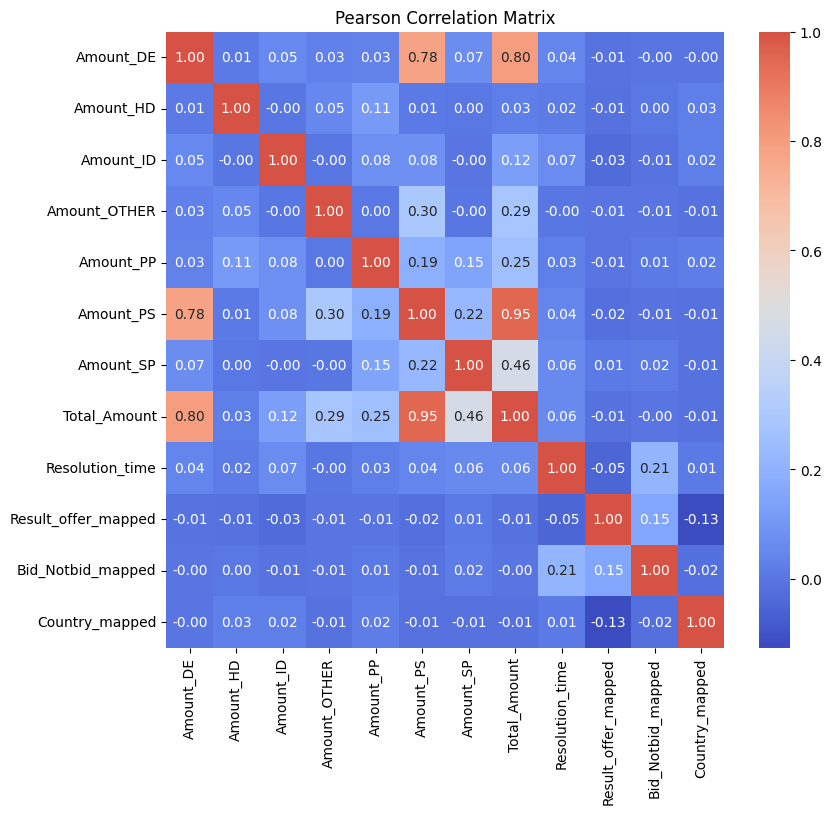


Strong Correlations:
         var1          var2  correlation
0  Amount_DE     Amount_PS     0.778552
1  Amount_DE  Total_Amount     0.799530
2  Amount_PS  Total_Amount     0.950096


In [10]:
# Correlation Matrix

numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

def analyze_correlations(df, method="pearson"):
    """Analyze and visualize correlations between variables"""
    # Calculate correlation matrix
    corr_matrix = df.corr(method=method)

    # Create heatmap
    plt.figure(figsize=(9, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", center=0.5)
    plt.title(f"{method.capitalize()} Correlation Matrix")
    plt.show()

    return corr_matrix

def identify_strong_correlations(corr_matrix, threshold):
    """Identify strong correlations above a threshold"""
    strong_corr = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                strong_corr.append(
                    {
                        "var1": corr_matrix.columns[i],
                        "var2": corr_matrix.columns[j],
                        "correlation": corr_matrix.iloc[i, j],
                    }
                )

    return pd.DataFrame(strong_corr)

# Analyze correlations
corr_matrix = analyze_correlations(df_cleaned[numeric_cols])
strong_correlations = identify_strong_correlations(corr_matrix, threshold=0.5)
print("\nStrong Correlations:\n", strong_correlations)

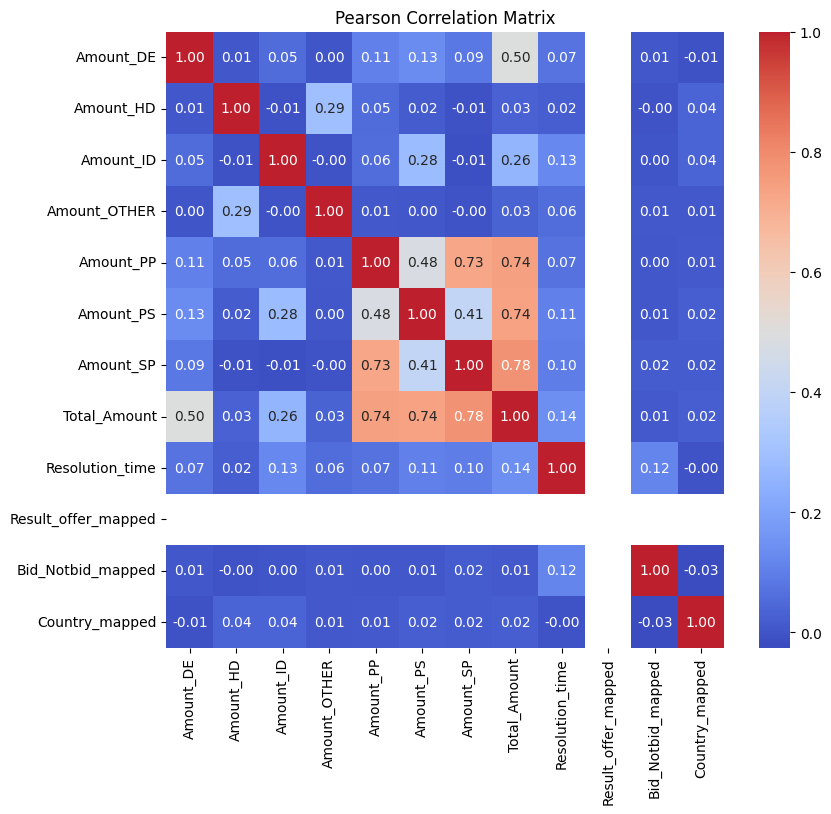


Strong Correlations:
         var1          var2  correlation
0  Amount_PP     Amount_SP     0.725517
1  Amount_PP  Total_Amount     0.740405
2  Amount_PS  Total_Amount     0.739689
3  Amount_SP  Total_Amount     0.782576


In [11]:
#Correlation when Result_offer = Won

df_cleaned_corr_won= df_cleaned[df_cleaned['Result_offer'] == 'Won']

# Analyze correlations
corr_matrix = analyze_correlations(df_cleaned_corr_won[numeric_cols])
strong_correlations = identify_strong_correlations(corr_matrix, threshold=0.5)
print("\nStrong Correlations:\n", strong_correlations)

### Pairplots Amount columns and Result_offer

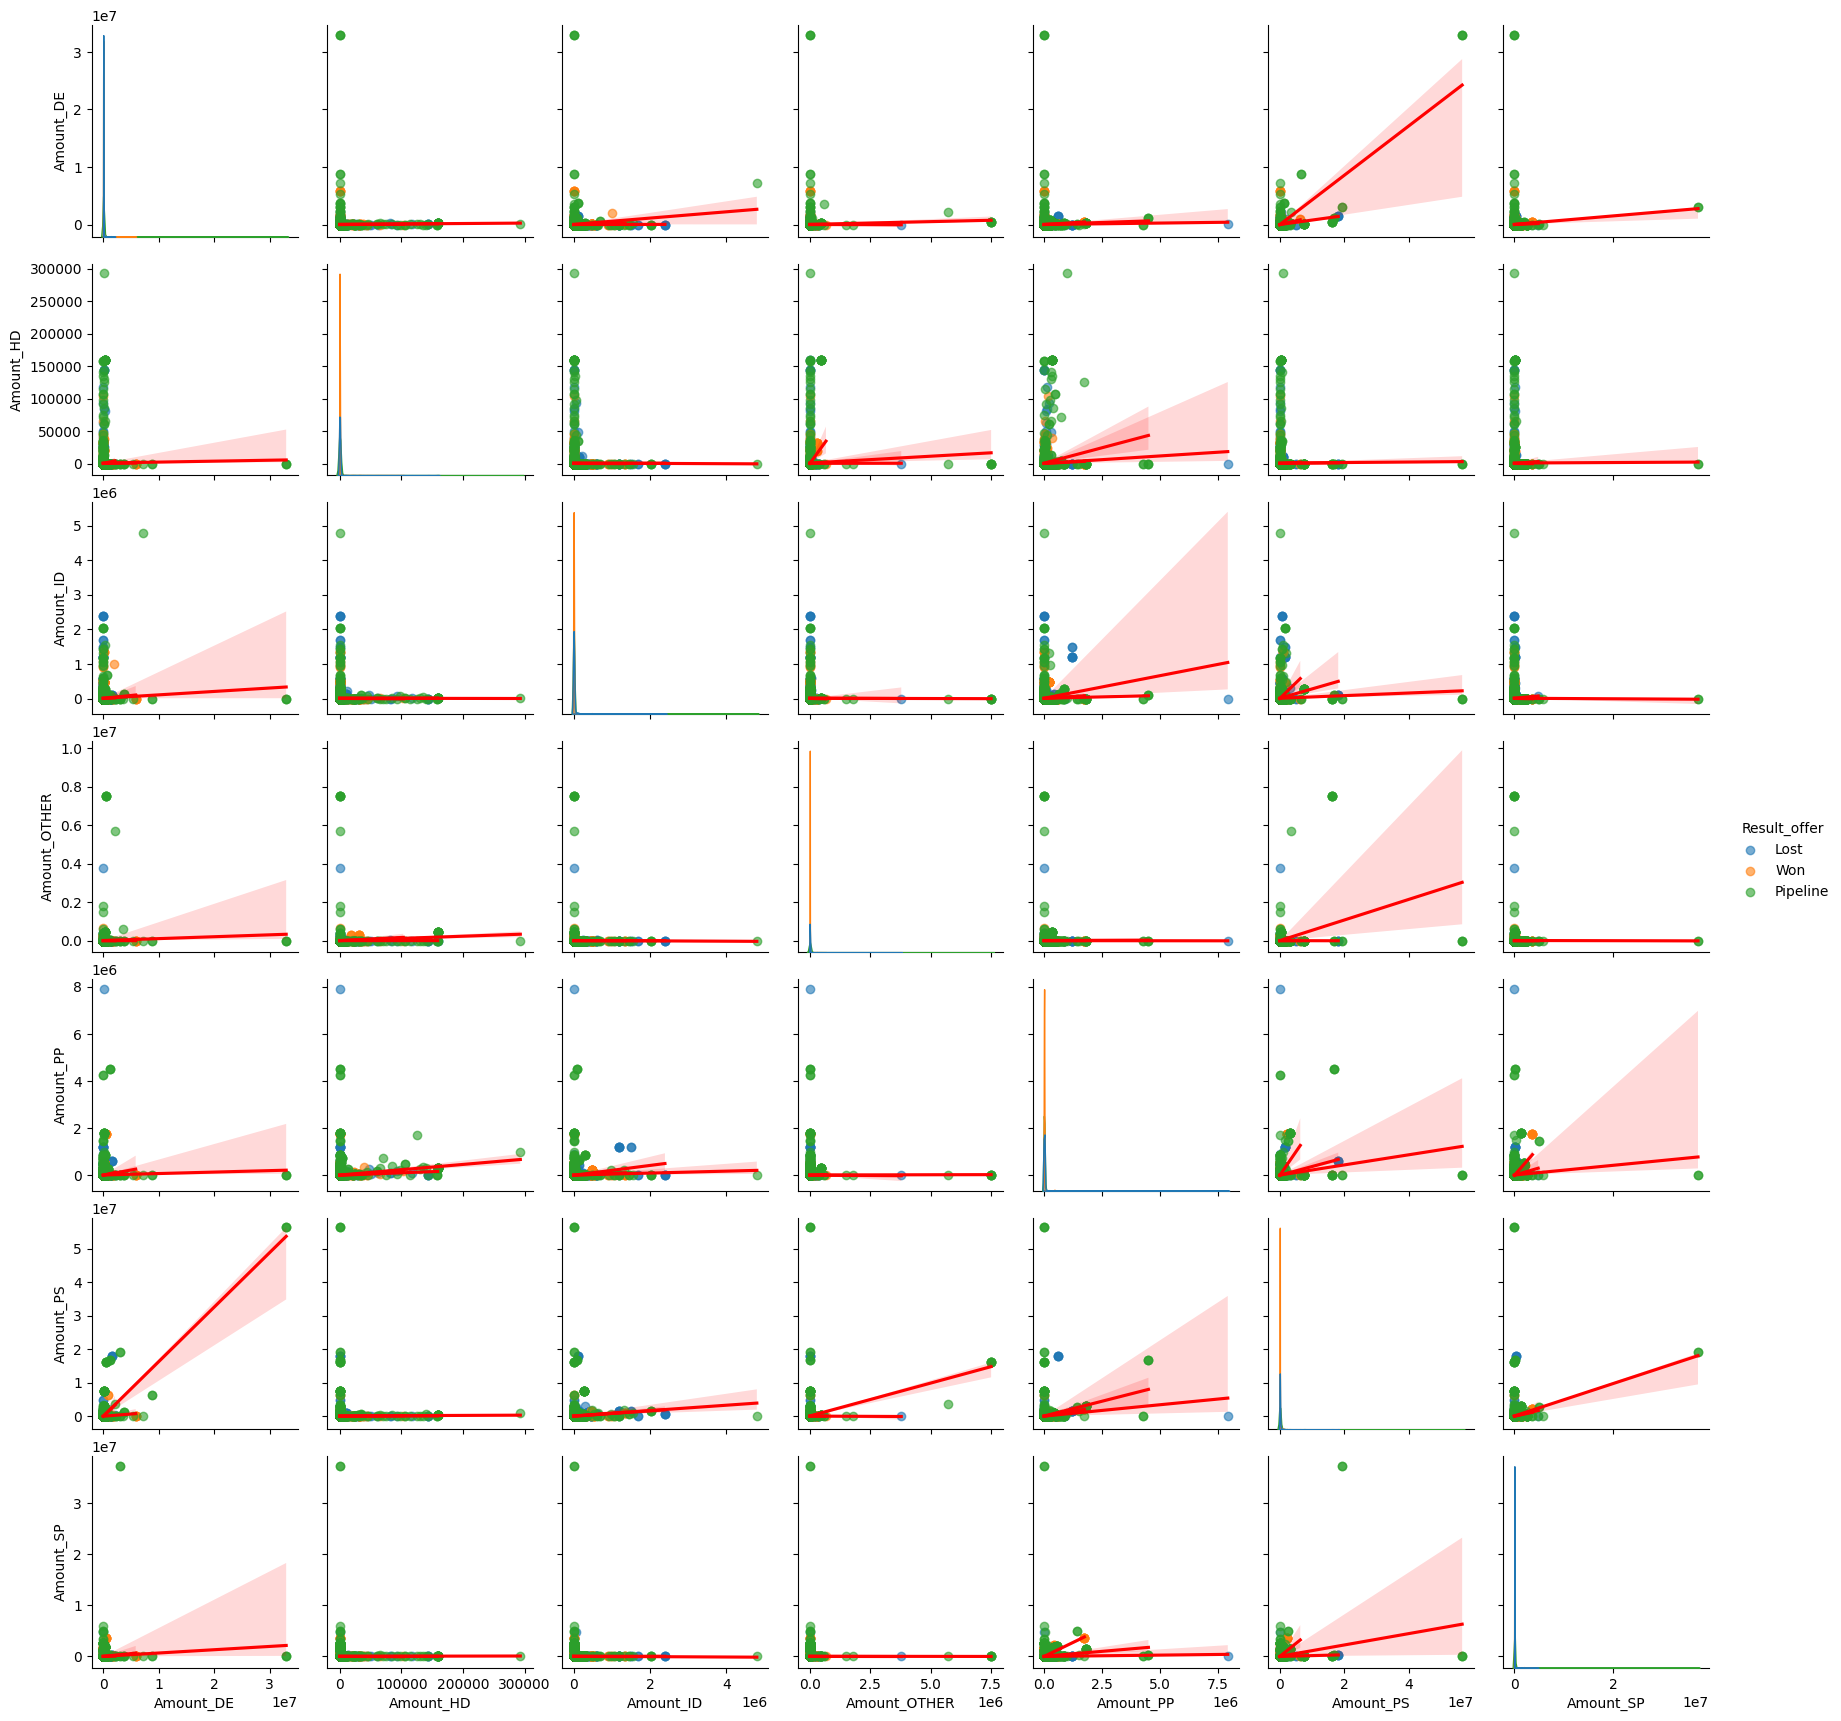

In [12]:
# Pairplots for Amount Columns and Result_offer with Regression Line
amount_cols = ['Amount_DE', 'Amount_HD', 'Amount_ID', 'Amount_OTHER', 'Amount_PP', 'Amount_PS', 'Amount_SP']

# Add regression line by setting kind="reg"
sns.pairplot(
    df_cleaned,
    vars=amount_cols,
    hue='Result_offer',
    diag_kind="kde",
    kind="reg",  # Add regression lines
    height=2.5,
    plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.6}}
)
plt.show()


**Pairplot analysis**

* Scatter Patterns:
    - In most pairwise plots, points cluster near the lower-left corner, showing that the majority of bids have relatively low amounts across all columns.
    - Outliers are present, often aligned along the regression lines, especially in the "Pipeline" category.

* Regression Lines:
    - Red regression lines show the trend between the two variables for each pairwise combination.
    - For most variable pairs, there is a positive correlation, especially for higher-value outliers.

* Differences by Result_offer:
    - "Pipeline" bids (green) tend to dominate at the higher-value ranges across most amount pairs.
    - "Lost" bids (orange) generally cluster in the lower ranges, with fewer extreme values.
    - "Won" bids (blue) also cluster lower but occasionally extend into higher-value ranges.

**Insights**
    - The strong clustering of points in the lower ranges suggests that many bids involve smaller amounts, but high-value outliers play a significant role in the "Pipeline" stage.
    - The correlations between certain columns (e.g., Amount_DE and Amount_SP) may indicate dependencies or shared trends across these metrics.

**Internal comment** 
- Given the significant outliers, it might be useful to explore their causes. Are these specific clients, markets, or industries? 
- The pairplots highlight correlations between certain amount columns. Exploring these relationships further could reveal dependencies or predictive indicators for bid outcomes.
    Strong correlations identified previously in correlation matrix:
        Strong Correlations:
                var1          var2  correlation
        0  Amount- DE    Amount- PS     0.778552 --> analyze independent variables
        1  Amount- DE  Total_Amount     0.799530 --> dependent
        2  Amount- PS  Total_Amount     0.950096 --> dependent

- Including categorical features (e.g., Client_importance or Market_segment) in the pairplot analysis could reveal patterns related to bid outcomes across different dimensions.
- Explore characteristics of bids in the "Pipeline" stage with high amounts, as these could represent key opportunities.

### Analyze Total_Amount and Amount_PS

In [112]:
correlation = df_cleaned['Total_Amount'].corr(df_cleaned['Amount_PS'])
print(correlation)

0.9500960143787174


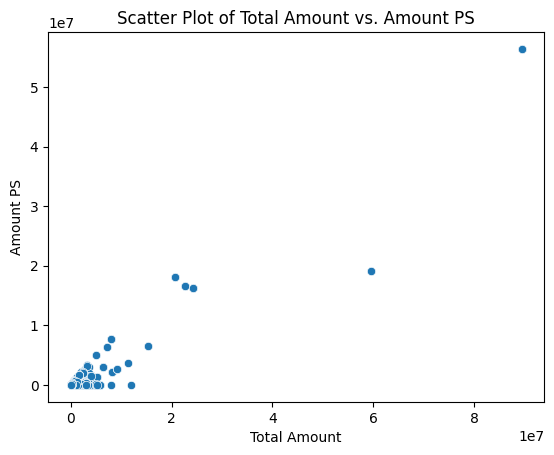

In [113]:
sns.scatterplot(x='Total_Amount', y='Amount_PS', data=df_cleaned)
plt.title('Scatter Plot of Total Amount vs. Amount PS')
plt.xlabel('Total Amount')
plt.ylabel('Amount PS')
plt.show()

### Analyze Amount_DE and Amount_PS correlation**

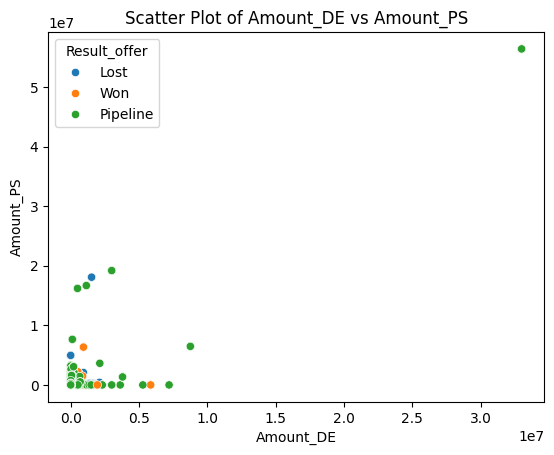

In [13]:
sns.scatterplot(data=df_cleaned, x='Amount_DE', y='Amount_PS', hue='Result_offer')
plt.title('Scatter Plot of Amount_DE vs Amount_PS')
plt.show()


**Analysis**

*Scatter Plot: Amount_DE vs. Amount_SP (Without Pipeline)*
* Distribution:
    - The scatter plot reveals a clearer distribution after excluding the "Pipeline" category.
    - Most data points remain tightly clustered near the origin, indicating that smaller values dominate both Amount_DE and Amount_SP.
    - There are fewer extreme outliers compared to the previous scatterplot, which improves clarity.

* Differences Between Lost and Won Bids:
    - The "Won" (orange) bids are spread slightly further along both axes compared to the "Lost" (blue) bids.
    - This suggests that "Won" bids may occasionally involve higher amounts, though the majority still fall in the low-value range. 
    --> Hypothesis

* No Clear Linear Pattern:
    - Similar to the earlier plot, there’s no strong linear trend between Amount_DE and Amount_SP. Most points cluster around small values.


In [14]:
# Perform regression of Amount_PS on Amount_DE
X = df_cleaned['Amount_DE']
y = df_cleaned['Amount_PS']
X = sm.add_constant(X)  # Add constant for intercept

model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              Amount_PS   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                 3.304e+04
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:58:20   Log-Likelihood:            -3.1367e+05
No. Observations:               21471   AIC:                         6.273e+05
Df Residuals:                   21469   BIC:                         6.274e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.121e+04   3657.361      8.535      0.0

**OLS Regression Results**
1. Model Fit Metrics
    R-squared = 0.606:
    This indicates that 60.6% of the variability in Amount_PS is explained by Amount_DE. While this is a relatively high R-squared, it suggests there is still 39.4% of the variance in Amount_PS left unexplained by the model.
    This single predictor (Amount_DE) provides a strong, but not perfect, relationship with the target variable (Amount_PS).

    Adjusted R-squared = 0.606:
    Since only one predictor is used, the adjusted R-squared is almost identical to R-squared.

2. Statistical Significance
    F-statistic (3.304e+04, p-value = 0.000):
    The F-statistic is extremely large, and its p-value is near zero, indicating the model as a whole is statistically significant.
    This means the predictor Amount_DE provides a meaningful contribution to predicting Amount_PS.

    P-value for Amount_DE (0.000):
    The predictor Amount_DE is statistically significant at any reasonable significance level (e.g., 0.05, 0.01).

3. Coefficients
    Intercept (const) = 31,210.00:
    This is the baseline value of Amount_PS when Amount_DE is zero. It's positive, indicating that even when Amount_DE is zero, there is still some baseline contribution to Amount_PS.
    
    Amount_DE coefficient = 1.5486:
    For every unit increase in Amount_DE, the Amount_PS increases by approximately 1.55 units on average, holding all else constant.
    The positive coefficient suggests a direct relationship between Amount_DE and Amount_PS.

4. Residual Analysis
    Durbin-Watson = 1.964:
    A value close to 2 indicates no significant autocorrelation in the residuals, which is desirable for OLS.
    
    Omnibus (42,883.628) and Prob(Omnibus = 0.000):
    These statistics, along with Jarque-Bera (JB), test for normality of residuals. The extremely large values and very small p-values indicate that the residuals deviate significantly from normality, suggesting potential issues with model assumptions (e.g., skewness or outliers).

    Condition Number = 4.3e+05:
    A high condition number suggests potential multicollinearity or numerical instability. However, since this is a univariate model (with only one predictor), the condition number likely reflects the scale of Amount_DE.

5. Log-Likelihood and AIC/BIC:
    Log-Likelihood = -313,670.00:
    This value is used internally for model comparison. Lower log-likelihood values indicate poorer model fit.
    
    AIC/BIC:
    Both metrics indicate model fit, but they are more useful for comparing multiple models.

**Conclusion**

* Strong Positive Relationship: There is a significant positive relationship between Amount_DE and Amount_PS, with an increase in Amount_DE resulting in an increase in Amount_PS.

In [15]:
# Analyze non-linear relationship between Amount_DE and Amount_SP
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df_cleaned[['Amount_DE']])
model = LinearRegression().fit(X_poly, df_cleaned['Amount_PS'])
print(model.coef_)


[0.00000000e+00 6.92330636e-01 3.03869810e-08]


**Analysis**

*Interpretation of Polynomial Regression Output* 

* Intercept (0.00000000e+00):
    The intercept term is 0, meaning the model assumes that Amount_PS is 0 when both Amount_DE and its squared value are 0.
    This could be due to the data being centered or normalized, or the specific behavior of the relationship between the features.

* Linear Coefficient (6.92330636e-01):
    For every unit increase in Amount_DE, Amount_PS increases by approximately 0.6923 units, holding the quadratic term constant.
    This suggests a strong direct (positive) relationship between Amount_DE and Amount_PS.

* Quadratic Coefficient (3.03869810e-08):
    The very small coefficient for the quadratic term indicates that the squared relationship between Amount_DE and Amount_PS is negligible.
    This suggests that adding the quadratic term does not significantly improve the model beyond the linear relationship.

## 2. Correlations without 0

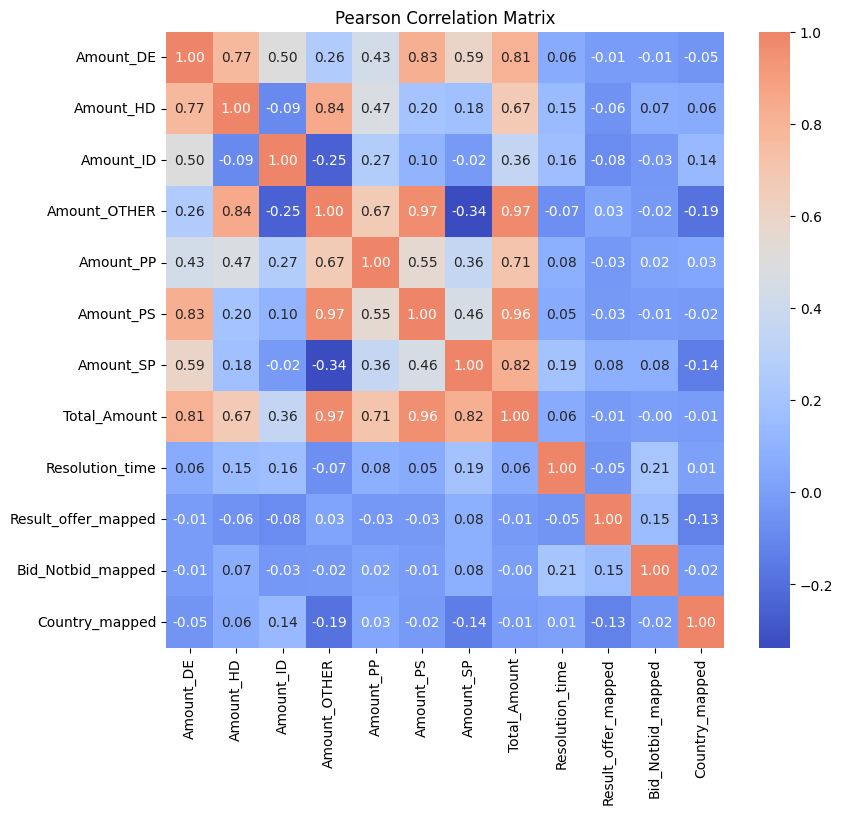


Strong Correlations:
            var1          var2  correlation
0     Amount_DE     Amount_PS     0.825607
1     Amount_DE  Total_Amount     0.807924
2     Amount_HD  Amount_OTHER     0.844880
3  Amount_OTHER     Amount_PS     0.968074
4  Amount_OTHER  Total_Amount     0.974034
5     Amount_PS  Total_Amount     0.957608
6     Amount_SP  Total_Amount     0.823965


In [16]:
# Correlation Matrix

numeric_cols_nullamounts = df_cleaned_nullamounts.select_dtypes(include=[np.number]).columns.tolist()

def analyze_correlations(df, method="pearson"):
    """Analyze and visualize correlations between variables"""
    # Calculate correlation matrix
    corr_matrix = df.corr(method=method)

    # Create heatmap
    plt.figure(figsize=(9, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", center=0.5)
    plt.title(f"{method.capitalize()} Correlation Matrix")
    plt.show()

    return corr_matrix

def identify_strong_correlations(corr_matrix, threshold):
    """Identify strong correlations above a threshold"""
    strong_corr = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                strong_corr.append(
                    {
                        "var1": corr_matrix.columns[i],
                        "var2": corr_matrix.columns[j],
                        "correlation": corr_matrix.iloc[i, j],
                    }
                )

    return pd.DataFrame(strong_corr)

# Analyze correlations
corr_matrix = analyze_correlations(df_cleaned_nullamounts[numeric_cols_nullamounts])
strong_correlations = identify_strong_correlations(corr_matrix, threshold=0.8)
print("\nStrong Correlations:\n", strong_correlations)

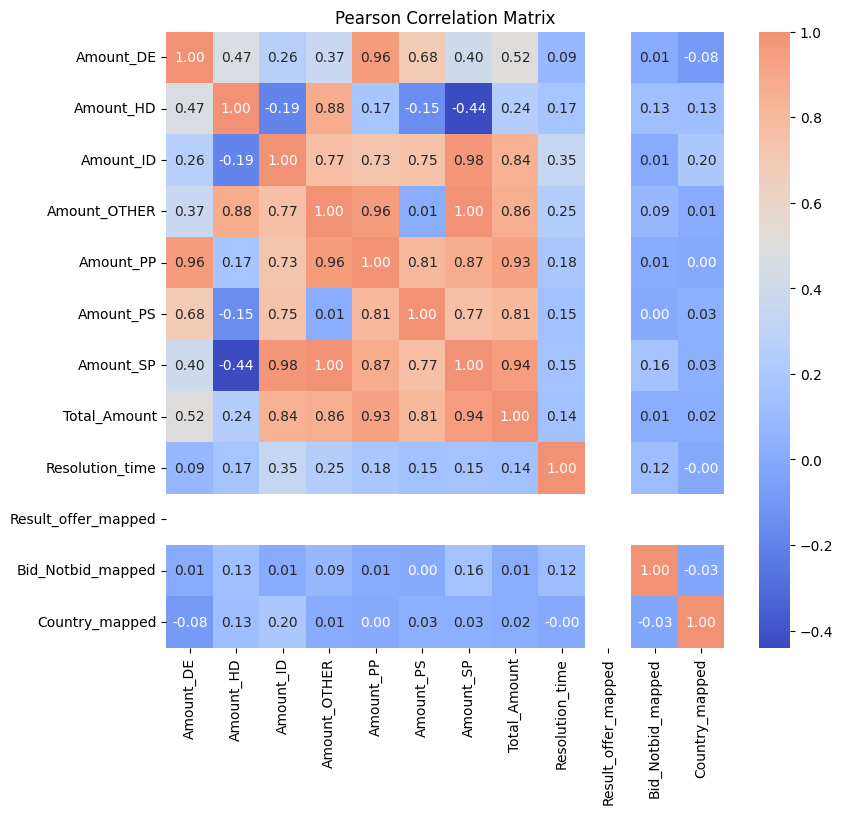


Strong Correlations:
             var1          var2  correlation
0      Amount_DE     Amount_PP     0.956243
1      Amount_HD  Amount_OTHER     0.881079
2      Amount_ID     Amount_SP     0.981595
3      Amount_ID  Total_Amount     0.843889
4   Amount_OTHER     Amount_PP     0.960637
5   Amount_OTHER     Amount_SP     1.000000
6   Amount_OTHER  Total_Amount     0.860060
7      Amount_PP     Amount_PS     0.806049
8      Amount_PP     Amount_SP     0.873635
9      Amount_PP  Total_Amount     0.930679
10     Amount_PS  Total_Amount     0.809919
11     Amount_SP  Total_Amount     0.944578


In [17]:
#Correlation when Result_offer = Won

df_cleaned_corr_won_nullamounts= df_cleaned_nullamounts[df_cleaned_nullamounts['Result_offer'] == 'Won']

# Analyze correlations
corr_matrix = analyze_correlations(df_cleaned_corr_won_nullamounts[numeric_cols_nullamounts])
strong_correlations = identify_strong_correlations(corr_matrix, threshold=0.8)
print("\nStrong Correlations:\n", strong_correlations)

# IV. Outliers - only for statistical analysis

In [18]:
# #Identify outliers in amount columns based on Total amounts using IQR:

# # Verify the Total_Amount column exists, if not, create it
# if 'Total_Amount' not in df_cleaned.columns:
#     df_cleaned['Total_Amount'] = df_cleaned[amount_columns].sum(axis=1)

# # Use IQR method to define outliers for 'Total_Amount'
# Q1 = df_cleaned['Total_Amount'].quantile(0.25)
# Q3 = df_cleaned['Total_Amount'].quantile(0.75)
# IQR = Q3 - Q1

# # Define lower and upper bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify rows where 'Total_Amount' exceeds bounds
# total_amount_outliers = df_cleaned[
#     (df_cleaned['Total_Amount'] < lower_bound) |
#     (df_cleaned['Total_Amount'] > upper_bound)
# ]

# print("Outliers based on Total_Amount:")
# print(total_amount_outliers)


In [19]:
# # Check for individual outliers in each amount column (using IQR)
# outliers_per_column = {}
# for col in amount_columns:
#     col_Q1 = df_cleaned[col].quantile(0.25)
#     col_Q3 = df_cleaned[col].quantile(0.75)
#     col_IQR = col_Q3 - col_Q1
#     col_lower_bound = col_Q1 - 1.5 * col_IQR
#     col_upper_bound = col_Q3 + 1.5 * col_IQR

#     # Identify outliers for this column
#     col_outliers = df_cleaned[
#         (df_cleaned[col] < col_lower_bound) | 
#         (df_cleaned[col] > col_upper_bound)
#     ]
#     outliers_per_column[col] = col_outliers

#     print(f"\nOutliers for {col}:")
#     print(col_outliers)

In [20]:
#Identify outliers in Amount columns based on Total amounts using P5-P95

amount_columns = ['Amount_DE', 'Amount_HD', 'Amount_ID', 'Amount_OTHER', 'Amount_PP', 'Amount_PS', 'Amount_SP', 'Total_Amount']

# Verify the Total_Amount column exists, if not, create it
if 'Total_Amount' not in df_cleaned.columns:
    df_cleaned['Total_Amount'] = df_cleaned[amount_columns].sum(axis=1)

# Use P5 and P95 as lower and upper bounds
P5 = df_cleaned['Total_Amount'].quantile(0.05)
P95 = df_cleaned['Total_Amount'].quantile(0.95)

# Identify rows where 'Total_Amount' is outside P5 and P95
total_amount_outliers = df_cleaned[
    (df_cleaned['Total_Amount'] < P5) |
    (df_cleaned['Total_Amount'] > P95)
]
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print("Outliers based on Total_Amount (P5 and P95):")
    print(total_amount_outliers.head())

Outliers based on Total_Amount (P5 and P95):
   Result_offer  Amount_DE  Amount_HD  Amount_ID  Amount_OTHER  Amount_PP  Amount_PS  Amount_SP  Total_Amount   SR_codigo Bid_Notbid  Resolution_time       Client_type Market_segment              Client_BU Country Client_importance Coverage_model  Result_offer_mapped  Bid_Notbid_mapped  Country_mapped
1           Won    67500.0        0.0   480000.0           0.0   222000.0  1155000.0        0.0     1924500.0  SR-2468507        Bid             57.7        Contractor            E34  INDUSTRIAL AUTOMATION      ES               MS3      Sales Rep                    1                  1               1
5           Won        0.0        0.0       45.0           0.0        0.0        0.0        0.0          45.0  SR-2468679        Bid              7.3  B2B Distribution            I9Z    Home & Distribution      PT               MS3      Sales Rep                    1                  1              -1
17         Lost        0.0        0.0        0

In [21]:
# Check for individual outliers in each Amount column using P5 and P95
amount_columns = ['Amount_DE', 'Amount_HD', 'Amount_ID', 'Amount_OTHER', 'Amount_PP', 'Amount_PS', 'Amount_SP', 'Total_Amount']

outliers_per_column = {}
for col in amount_columns:
    col_P5 = df_cleaned[col].quantile(0.05)
    col_P95 = df_cleaned[col].quantile(0.95)

    # Identify outliers for this column
    col_outliers = df_cleaned[
        (df_cleaned[col] < col_P5) | 
        (df_cleaned[col] > col_P95)
    ]
    outliers_per_column[col] = col_outliers
    with pd.option_context('display.max_columns', None, 'display.width', 1000):
        print(f"\nOutliers for {col} (P5 and P95):")
        print(col_outliers)



Outliers for Amount_DE (P5 and P95):
      Result_offer    Amount_DE  Amount_HD  Amount_ID  Amount_OTHER  Amount_PP   Amount_PS  Amount_SP  Total_Amount   SR_codigo       Bid_Notbid  Resolution_time   Client_type Market_segment              Client_BU       Country Client_importance Coverage_model  Result_offer_mapped  Bid_Notbid_mapped  Country_mapped
1              Won    67500.000        0.0   480000.0           0.0   222000.0   1155000.0        0.0  1.924500e+06  SR-2468507              Bid             57.7    Contractor            E34  INDUSTRIAL AUTOMATION            ES               MS3      Sales Rep                    1                  1               1
2             Lost   111600.000        0.0        0.0           0.0        0.0       300.0        0.0  1.119000e+05  SR-2468656              Bid              2.1    Contractor            I9Z         Power Products            ES               MS3      Sales Rep                   -1                  1               1
3          

In [22]:
#Outliers summary table using P5-P95

amount_columns = ['Amount_DE', 'Amount_HD', 'Amount_ID', 'Amount_OTHER', 'Amount_PP', 'Amount_PS', 'Amount_SP', 'Total_Amount']

# Ensure Total_Amount column exists
if 'Total_Amount' not in df_cleaned.columns:
    df_cleaned['Total_Amount'] = df_cleaned[amount_columns].sum(axis=1)

# Use P5 and P95 for Total_Amount
total_P5 = df_cleaned['Total_Amount'].quantile(0.05)
total_P95 = df_cleaned['Total_Amount'].quantile(0.95)

# Initialize a dictionary to store results
outliers_summary = {
    'Column': [],
    'Outliers Count': [],
    'Percentage of Column': [],
    'Percentage of Total_Amount (Count)': [],
    'Sum of Outliers': [],
    'Percentage of Column (Sum)': [],
    'Percentage of Total_Amount (Sum)': []
}

# Calculate outliers for each column
for col in amount_columns:
    # P5 and P95 for the current column
    col_P5 = df_cleaned[col].quantile(0.05)
    col_P95 = df_cleaned[col].quantile(0.95)

    # Identify outliers for the column
    col_outliers = df_cleaned[(df_cleaned[col] < col_P5) | (df_cleaned[col] > col_P95)]
    col_outliers_count = len(col_outliers)
    col_outliers_sum = col_outliers[col].sum()

    # Percentage of outliers within the column (Count-based)
    col_percentage_count = (col_outliers_count / len(df_cleaned)) * 100

    # Total outliers for 'Total_Amount'
    total_outliers = df_cleaned[
        (df_cleaned['Total_Amount'] < total_P5) |
        (df_cleaned['Total_Amount'] > total_P95)
    ]
    total_outliers_count = len(total_outliers)
    total_outliers_sum = total_outliers['Total_Amount'].sum()

    # Percentage of outliers against Total_Amount (Count-based)
    total_percentage_count = (col_outliers_count / total_outliers_count) * 100 if total_outliers_count > 0 else 0

    # Percentage based on sums
    col_percentage_sum = (col_outliers_sum / df_cleaned[col].sum()) * 100 if df_cleaned[col].sum() > 0 else 0
    total_percentage_sum = (col_outliers_sum / total_outliers_sum) * 100 if total_outliers_sum > 0 else 0

    # Append results
    outliers_summary['Column'].append(col)
    outliers_summary['Outliers Count'].append(col_outliers_count)
    outliers_summary['Percentage of Column'].append(col_percentage_count)
    outliers_summary['Percentage of Total_Amount (Count)'].append(total_percentage_count)
    outliers_summary['Sum of Outliers'].append(col_outliers_sum)
    outliers_summary['Percentage of Column (Sum)'].append(col_percentage_sum)
    outliers_summary['Percentage of Total_Amount (Sum)'].append(total_percentage_sum)

# Convert the summary to a DataFrame for display
outliers_table = pd.DataFrame(outliers_summary)

# Display the table
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print("Outliers Summary Table:")
    print(outliers_table)

# Optionally, export to CSV
# outliers_table.to_csv('outliers_summary.csv', index=False)


Outliers Summary Table:
         Column  Outliers Count  Percentage of Column  Percentage of Total_Amount (Count)  Sum of Outliers  Percentage of Column (Sum)  Percentage of Total_Amount (Sum)
0     Amount_DE            1073              4.997438                           50.000000     4.648251e+08                   86.700569                         19.485243
1     Amount_HD             393              1.830376                           18.313141     9.206748e+06                  100.000000                          0.385942
2     Amount_ID            1074              5.002096                           50.046598     1.776946e+08                   96.908554                          7.448871
3  Amount_OTHER             313              1.457780                           14.585275     8.079514e+07                  100.000000                          3.386893
4     Amount_PP            1065              4.960179                           49.627213     2.382569e+08                   93.684

## Without outliers
### Feature correlation

In [23]:
#Remove outliers based on Total_Amount using P5-P95 - Only for statistical analysis

# Ensure Total_Amount column exists
if 'Total_Amount' not in df_cleaned.columns:
    df_cleaned['Total_Amount'] = df_cleaned[amount_columns].sum(axis=1)

# Calculate P5 and P95 for Total_Amount
total_P5 = df_cleaned['Total_Amount'].quantile(0.05)
total_P95 = df_cleaned['Total_Amount'].quantile(0.95)

# Filter out rows where Total_Amount is outside P5 and P95
df_without_outliers = df_cleaned[(df_cleaned['Total_Amount'] >= total_P5) & (df_cleaned['Total_Amount'] <= total_P95)]

# Display the shape of the new DataFrame
print(f"Original DataFrame shape: {df_cleaned.shape}")
print(f"DataFrame without outliers (P5-P95) shape: {df_without_outliers.shape}")

Original DataFrame shape: (21471, 21)
DataFrame without outliers (P5-P95) shape: (19325, 21)


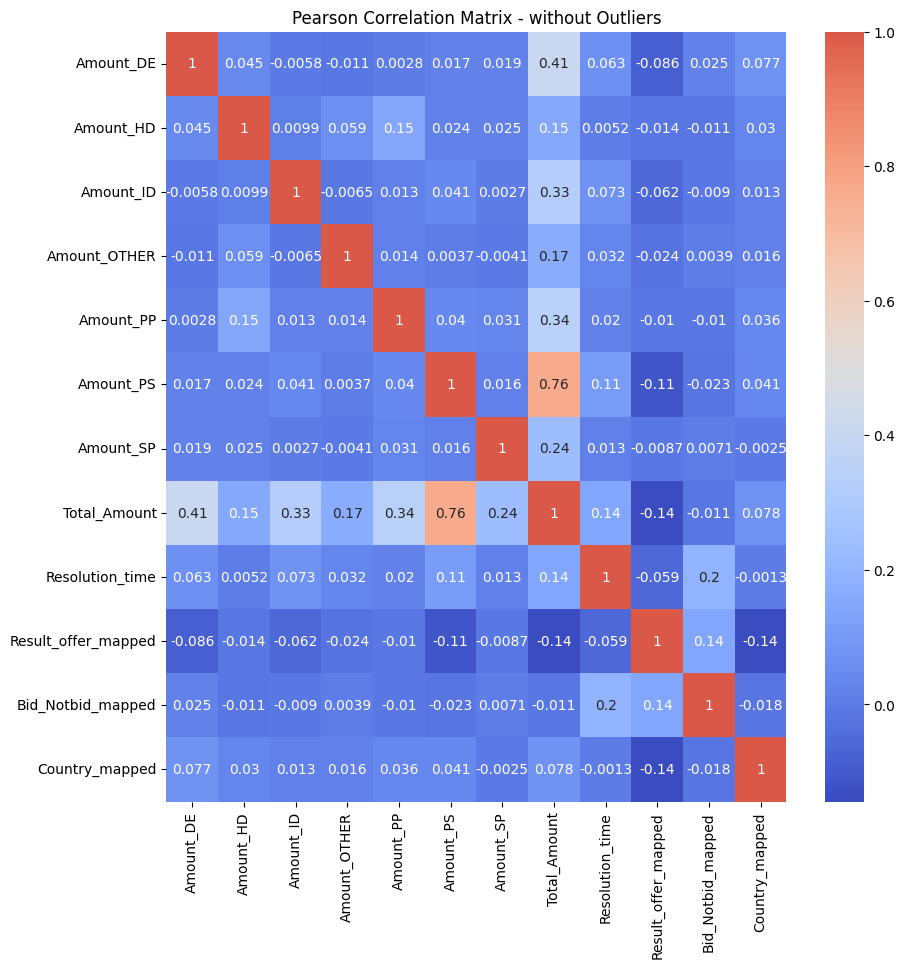


Strong Correlations:
         var1          var2  correlation
0  Amount_PS  Total_Amount     0.764603


In [24]:
# Analyze correlations (without Outliers)

numeric_cols_without_outliers = df_without_outliers.select_dtypes(include=[np.number]).columns.tolist()

def analyze_correlations_2(df, method="pearson"):
    """Analyze and visualize correlations between variables"""
    # Calculate correlation matrix
    corr_matrix = df.corr(method=method)

    # Create heatmap
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0.5)
    plt.title(f"{method.capitalize()} Correlation Matrix - without Outliers")
    plt.show()

    return corr_matrix


def identify_strong_correlations_2(corr_matrix, threshold):
    """Identify strong correlations above a threshold"""
    strong_corr = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                strong_corr.append(
                    {
                        "var1": corr_matrix.columns[i],
                        "var2": corr_matrix.columns[j],
                        "correlation": corr_matrix.iloc[i, j],
                    }
                )

    return pd.DataFrame(strong_corr)


# Analyze correlations
corr_matrix_without_outliers = analyze_correlations_2(df_without_outliers[numeric_cols_without_outliers])
strong_correlations_without_outliers = identify_strong_correlations_2(corr_matrix_without_outliers, threshold=0.5)
print("\nStrong Correlations:\n", strong_correlations_without_outliers)

### Numerical analysis

In [25]:
#Descriptive statistics (without Outliers)

def generate_descriptive_stats(df: pd.DataFrame, columns: list[str]) -> pd.DataFrame:
    """Generate descriptive statistics"""
    stats_df = pd.DataFrame()

    for col in columns:
        stats = {
            "Mean": df[col].mean(),
            "Std": df[col].std(),
            # "Mode": df[col].mode(),
            "Min": df[col].min(),
            "25% (Q1)": df[col].quantile(0.25),
            "50% (Median)": df[col].quantile(0.50),
            "75% (Q3)": df[col].quantile(0.75),
            "Max": df[col].max(),
            "Skewness": df[col].skew(),
            "Kurtosis": df[col].kurtosis(),
            "IQR": df[col].quantile(0.75) - df[col].quantile(0.25),
        }
        stats_df[col] = pd.Series(stats)

    return stats_df


# Calculate statistics for numeric columns

stats_summary = generate_descriptive_stats(df_without_outliers, numeric_cols)
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print("\nDescriptive Statistics (numeric columns) - without Outliers:\n", stats_summary)


Descriptive Statistics (numeric columns) - without Outliers:
                   Amount_DE      Amount_HD      Amount_ID   Amount_OTHER      Amount_PP      Amount_PS      Amount_SP   Total_Amount  Resolution_time  Result_offer_mapped  Bid_Notbid_mapped  Country_mapped
Mean            7481.249164     255.473338    3088.792315     729.888252    3815.307190   18061.352962    1081.282869   34513.346090        10.770546             0.125071           0.866442        0.564709
Std            28333.915124    4170.380234   21310.810317   11885.139117   20851.550402   52529.641721   15051.684675   72072.996568        14.733244             0.813704           0.490454        0.814836
Min                0.000000       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000      60.000000        -6.700000            -1.000000          -1.000000       -1.000000
25% (Q1)           0.000000       0.000000       0.000000       0.000000       0.000000       0.000000       0.00

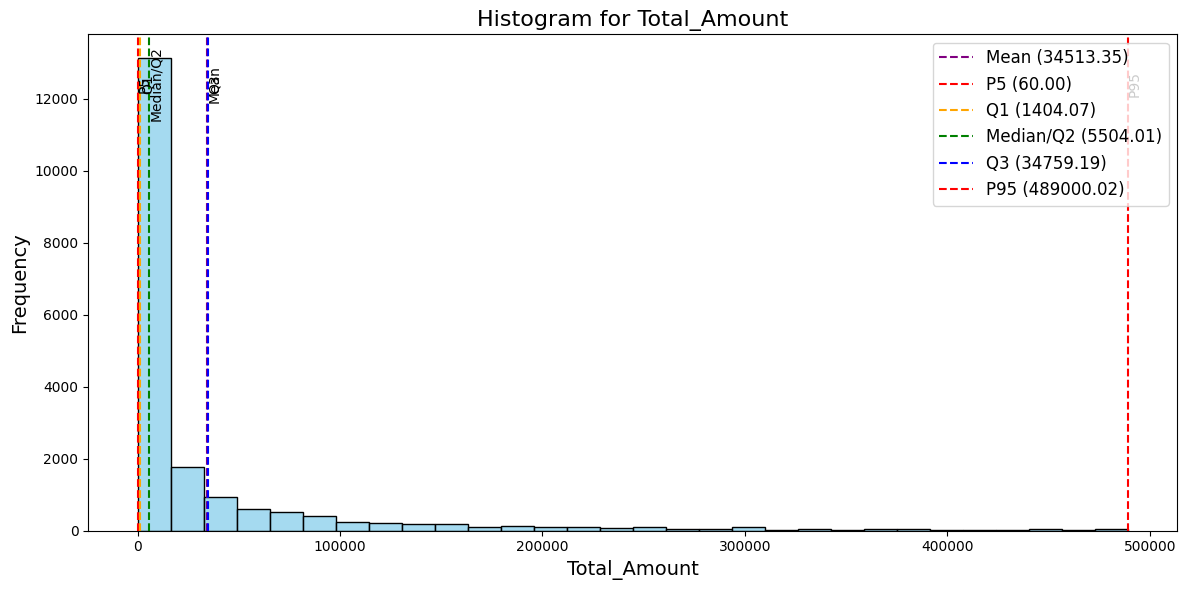

In [26]:
#Histogram of Total_Amount

amount_columns = ['Amount_DE', 'Amount_HD', 'Amount_ID', 'Amount_OTHER', 'Amount_PP', 'Amount_PS', 'Amount_SP', 'Total_Amount']

# Calculate key statistics
mean_value = df_without_outliers['Total_Amount'].mean()
P5 = df_cleaned['Total_Amount'].quantile(0.05)
Q1 = df_cleaned['Total_Amount'].quantile(0.25)
Q2 = df_cleaned['Total_Amount'].quantile(0.50)  # Median
Q3 = df_cleaned['Total_Amount'].quantile(0.75)
P95 = df_cleaned['Total_Amount'].quantile(0.95)

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_without_outliers['Total_Amount'], bins=30, kde=False, color="skyblue", edgecolor="black")
plt.title("Histogram for Total_Amount", fontsize=16)
plt.xlabel("Total_Amount", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Add vertical lines for statistics
plt.axvline(mean_value, color='purple', linestyle='--', linewidth=1.5, label=f'Mean ({mean_value:.2f})')
plt.axvline(P5, color='red', linestyle='--', linewidth=1.5, label=f'P5 ({P5:.2f})')
plt.axvline(Q1, color='orange', linestyle='--', linewidth=1.5, label=f'Q1 ({Q1:.2f})')
plt.axvline(Q2, color='green', linestyle='--', linewidth=1.5, label=f'Median/Q2 ({Q2:.2f})')
plt.axvline(Q3, color='blue', linestyle='--', linewidth=1.5, label=f'Q3 ({Q3:.2f})')
plt.axvline(P95, color='red', linestyle='--', linewidth=1.5, label=f'P95 ({P95:.2f})')

# Annotate the vertical lines
for x, label in zip([mean_value, P5, Q1, Q2, Q3, P95], 
                    ['Mean', 'P5', 'Q1', 'Median/Q2', 'Q3', 'P95']):
    plt.text(x, plt.ylim()[1] * 0.9, label, rotation=90, verticalalignment='center', fontsize=10, color="black")

# Add legend and show plot
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


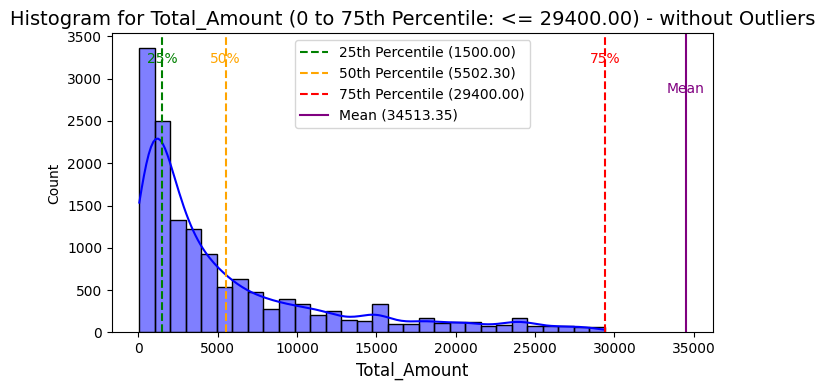

In [27]:
# Without Outliers - Histogram divided on percentiles (0 - 75th percentile) & (75th and above), including Mean line

# Calculate percentiles
percentile_25 = df_without_outliers['Total_Amount'].quantile(0.25)
percentile_50 = df_without_outliers['Total_Amount'].quantile(0.50)  # Median
percentile_75 = df_without_outliers['Total_Amount'].quantile(0.75)

# Calculate mean
mean_value = df_without_outliers['Total_Amount'].mean()

# Filter data for each range
subset1 = df_without_outliers[df_without_outliers['Total_Amount'] <= percentile_75]  # 0th to 75th percentile
subset2 = df_without_outliers[df_without_outliers['Total_Amount'] > percentile_75]   # Above 75th percentile

# Plot the first range (0 to 75th percentile)
plt.figure(figsize=(7, 4))
sns.histplot(
    data=subset1,
    x='Total_Amount',
    bins=30,
    kde=True,
    color='blue'
)

# Add vertical lines and annotations for percentiles
plt.axvline(percentile_25, color='green', linestyle='--', label=f'25th Percentile ({percentile_25:.2f})')
plt.axvline(percentile_50, color='orange', linestyle='--', label=f'50th Percentile ({percentile_50:.2f})')
plt.axvline(percentile_75, color='red', linestyle='--', label=f'75th Percentile ({percentile_75:.2f})')

# Add vertical lines and annotation for mean
plt.axvline(mean_value, color='purple', linestyle='-', linewidth=1.5, label=f'Mean ({mean_value:.2f})')

# Add text for percentiles
plt.text(percentile_25, plt.gca().get_ylim()[1] * 0.9, '25%', color='green', ha='center')
plt.text(percentile_50, plt.gca().get_ylim()[1] * 0.9, '50%', color='orange', ha='center')
plt.text(percentile_75, plt.gca().get_ylim()[1] * 0.9, '75%', color='red', ha='center')
plt.text(mean_value, plt.gca().get_ylim()[1] * 0.8, 'Mean', color='purple', ha='center')

# Customize the plot
plt.title(f'Histogram for Total_Amount (0 to 75th Percentile: <= {percentile_75:.2f}) - without Outliers', fontsize=14)
plt.xlabel('Total_Amount', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


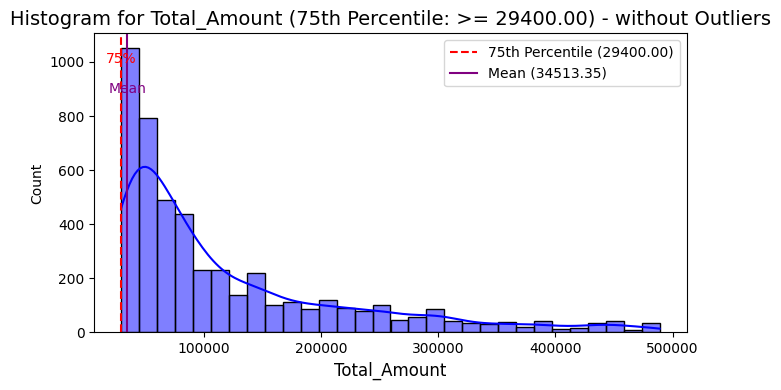

In [28]:
# Without Outliers - Histogram divided on percentiles (75th and above), including Mean line

# Calculate percentiles
percentile_25 = df_without_outliers['Total_Amount'].quantile(0.25)
percentile_50 = df_without_outliers['Total_Amount'].quantile(0.50)  # Median
percentile_75 = df_without_outliers['Total_Amount'].quantile(0.75)

# Calculate mean
mean_value = df_without_outliers['Total_Amount'].mean()

# Filter data for each range
subset1 = df_without_outliers[df_without_outliers['Total_Amount'] <= percentile_75]  # 0th to 75th percentile
subset2 = df_without_outliers[df_without_outliers['Total_Amount'] > percentile_75]   # Above 75th percentile

# Plot the first range (0 to 75th percentile)
plt.figure(figsize=(7, 4))
sns.histplot(
    data=subset2,
    x='Total_Amount',
    bins=30,
    kde=True,
    color='blue'
)

# Add vertical lines and annotations for percentiles
plt.axvline(percentile_75, color='red', linestyle='--', label=f'75th Percentile ({percentile_75:.2f})')

# Add vertical lines and annotation for mean
plt.axvline(mean_value, color='purple', linestyle='-', linewidth=1.5, label=f'Mean ({mean_value:.2f})')

# Add text for percentiles
plt.text(percentile_75, plt.gca().get_ylim()[1] * 0.9, '75%', color='red', ha='center')
plt.text(mean_value, plt.gca().get_ylim()[1] * 0.8, 'Mean', color='purple', ha='center')

# Customize the plot
plt.title(f'Histogram for Total_Amount (75th Percentile: >= {percentile_75:.2f}) - without Outliers', fontsize=14)
plt.xlabel('Total_Amount', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


In [29]:
# Histogram Table for Total_Amount

# Assuming 'Total_Amount' is the column for the histogram
column_name = 'Total_Amount'

# Ensure your dataset contains valid numerical data for this column
data = df_without_outliers[column_name].dropna()

# Define custom bin edges based on percentiles
P5 = np.percentile(data, 5)
Q1 = np.percentile(data, 25)
Q2 = np.percentile(data, 50)
Q3 = np.percentile(data, 75)
P95 = np.percentile(data, 95)

# Custom bins: Start from 0, include P5, Q1, Q2, Q3, P95, and max value
custom_bins = [0, P5, Q1, Q2, Q3, P95, data.max()]

# Calculate histogram counts and edges with custom bins
counts, edges = np.histogram(data, bins=custom_bins)

# Calculate total count for percentage calculation
total_count = counts.sum()

# Create a histogram table
histogram_table = pd.DataFrame({
    'Bin Start': edges[:-1],
    'Bin End': edges[1:],
    'Count': counts,
    'Percentage (%)': (counts / total_count * 100).round(2)
})

# Function for assigning percentiles
def assign_percentile(bin_start, bin_end, P5, Q1, Q2, Q3, P95):
    if bin_end <= P5:
        return 'Below 5th Percentile'
    elif bin_start >= P5 and bin_end <= Q1:
        return 'Q1 (5-25%)'
    elif bin_start >= Q1 and bin_end <= Q2:
        return 'Q2 (25-50%)'
    elif bin_start >= Q2 and bin_end <= Q3:
        return 'Q3 (50-75%)'
    elif bin_start >= Q3 and bin_end <= P95:
        return 'Q4 (75-95%)'
    elif bin_start >= P95:
        return 'Above 95th Percentile'
    else:
        return 'Uncategorized'

# Apply the function to assign percentiles
histogram_table['Percentile'] = [
    assign_percentile(edges[i], edges[i + 1], P5, Q1, Q2, Q3, P95) for i in range(len(edges) - 1)
]

# Display the histogram table
print("\nHistogram Table for Total_Amount:")
print(histogram_table)

print('-------------------------------------------------------------------------------------')
print(f"P5: {P5}, Q1: {Q1}, Q2: {Q2}, Q3: {Q3}, P95: {P95}")
print(f"Custom Bins: {custom_bins}")



Histogram Table for Total_Amount:
     Bin Start      Bin End  Count  Percentage (%)             Percentile
0       0.0000     385.2558    967            5.00   Below 5th Percentile
1     385.2558    1500.0000   3508           18.15             Q1 (5-25%)
2    1500.0000    5502.3000   5186           26.84            Q2 (25-50%)
3    5502.3000   29400.0000   4832           25.00            Q3 (50-75%)
4   29400.0000  188423.8710   3855           19.95            Q4 (75-95%)
5  188423.8710  489000.0000    977            5.06  Above 95th Percentile
-------------------------------------------------------------------------------------
P5: 385.2558, Q1: 1500.0, Q2: 5502.3, Q3: 29400.0, P95: 188423.871
Custom Bins: [0, 385.2558, 1500.0, 5502.3, 29400.0, 188423.871, 489000.0]


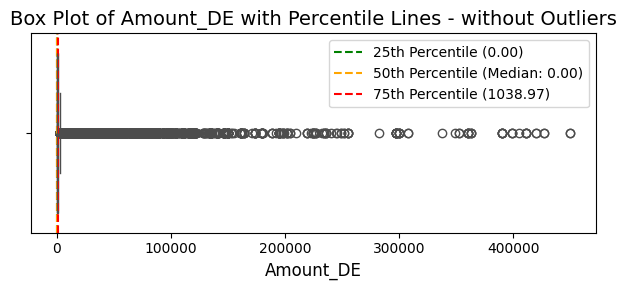

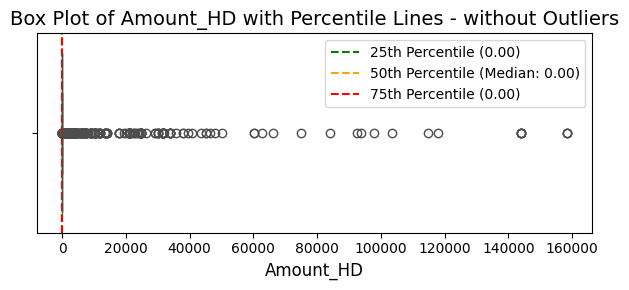

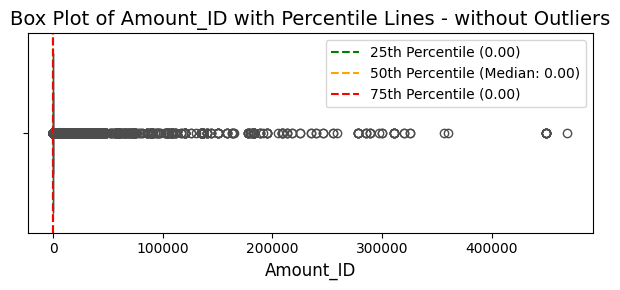

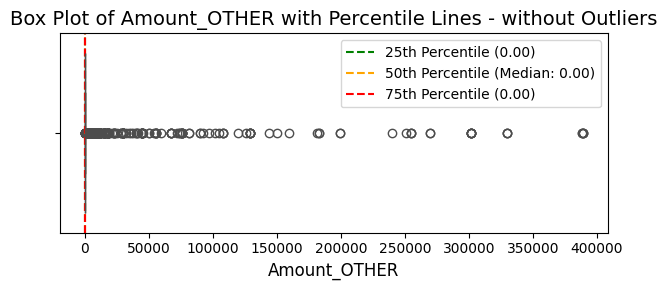

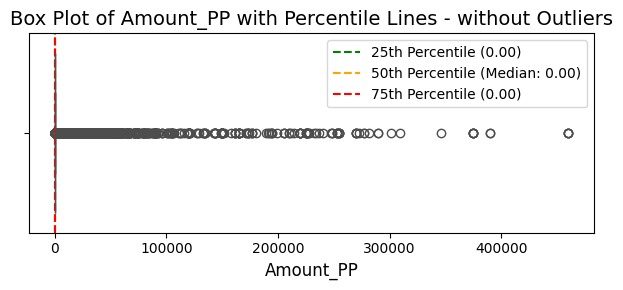

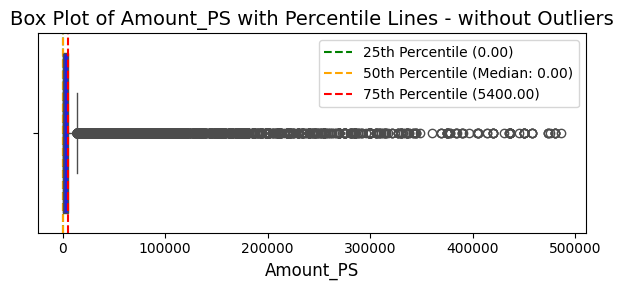

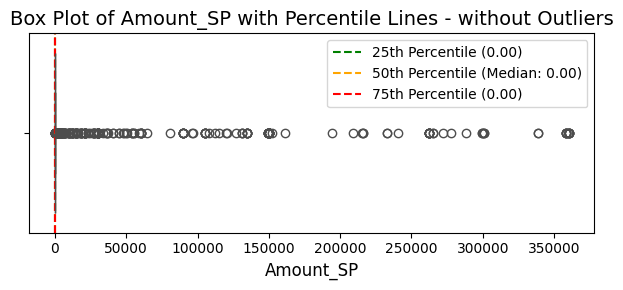

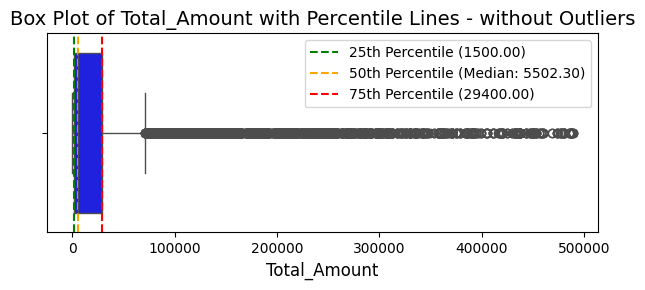

In [30]:
# Without outliers - Box plots for each amount column (per business)

# List of columns for which to create box plots
amount_columns = ['Amount_DE', 'Amount_HD', 'Amount_ID', 'Amount_OTHER', 'Amount_PP', 'Amount_PS', 'Amount_SP', 'Total_Amount']

# Loop through each column and create a box plot
for col in amount_columns:
    # Calculate percentiles
    percentile_25 = df_without_outliers[col].quantile(0.25)
    percentile_50 = df_without_outliers[col].quantile(0.50)  # Median
    percentile_75 = df_without_outliers[col].quantile(0.75)

    # Create the box plot
    plt.figure(figsize=(6, 3))
    sns.boxplot(
        data=df_without_outliers,
        x=col,
        color='blue'
    )

    # Add vertical lines for percentiles
    plt.axvline(percentile_25, color='green', linestyle='--', label=f'25th Percentile ({percentile_25:.2f})')
    plt.axvline(percentile_50, color='orange', linestyle='--', label=f'50th Percentile (Median: {percentile_50:.2f})')
    plt.axvline(percentile_75, color='red', linestyle='--', label=f'75th Percentile ({percentile_75:.2f})')

    # Add a legend
    plt.legend()

    # Add titles and labels
    plt.title(f'Box Plot of {col} with Percentile Lines - without Outliers', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()


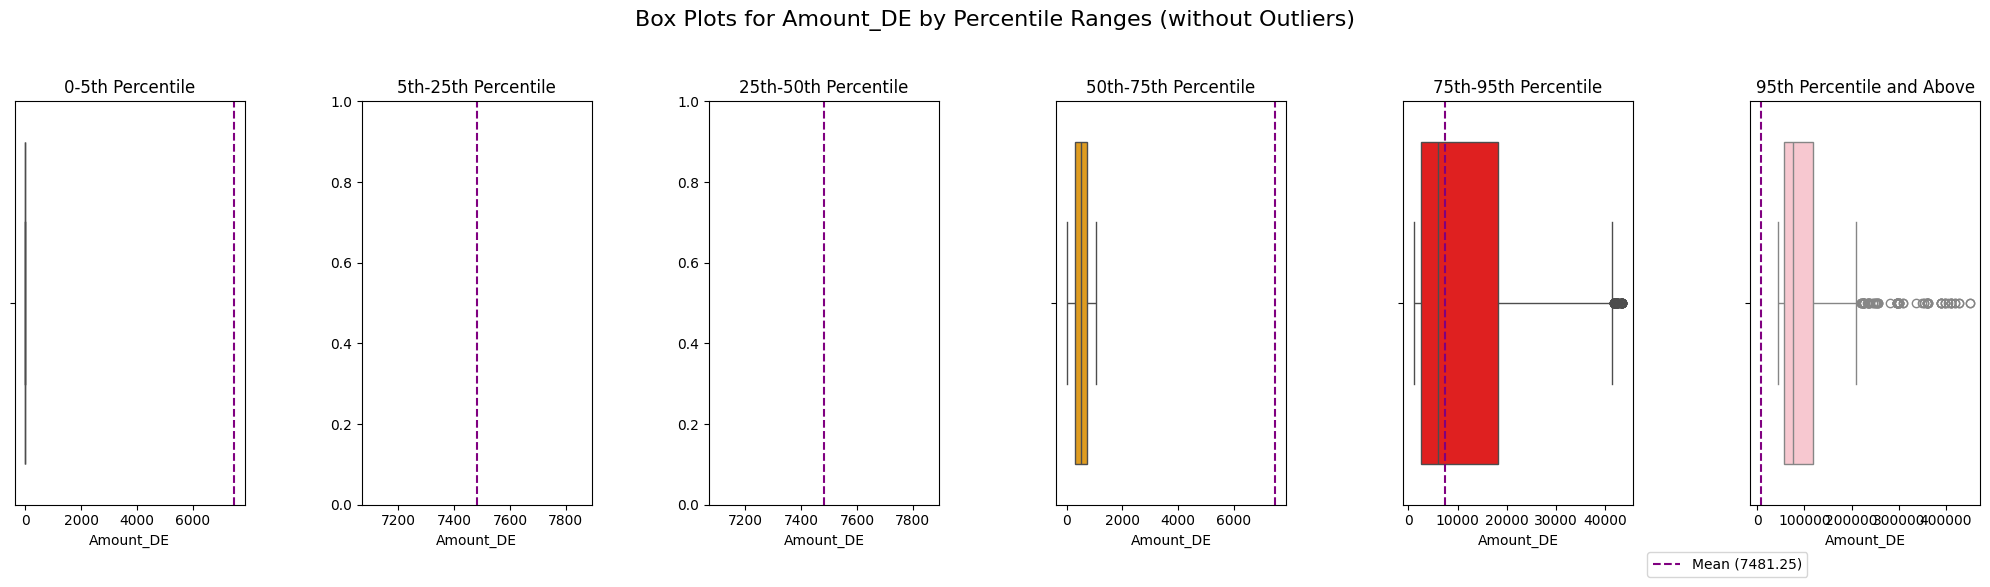

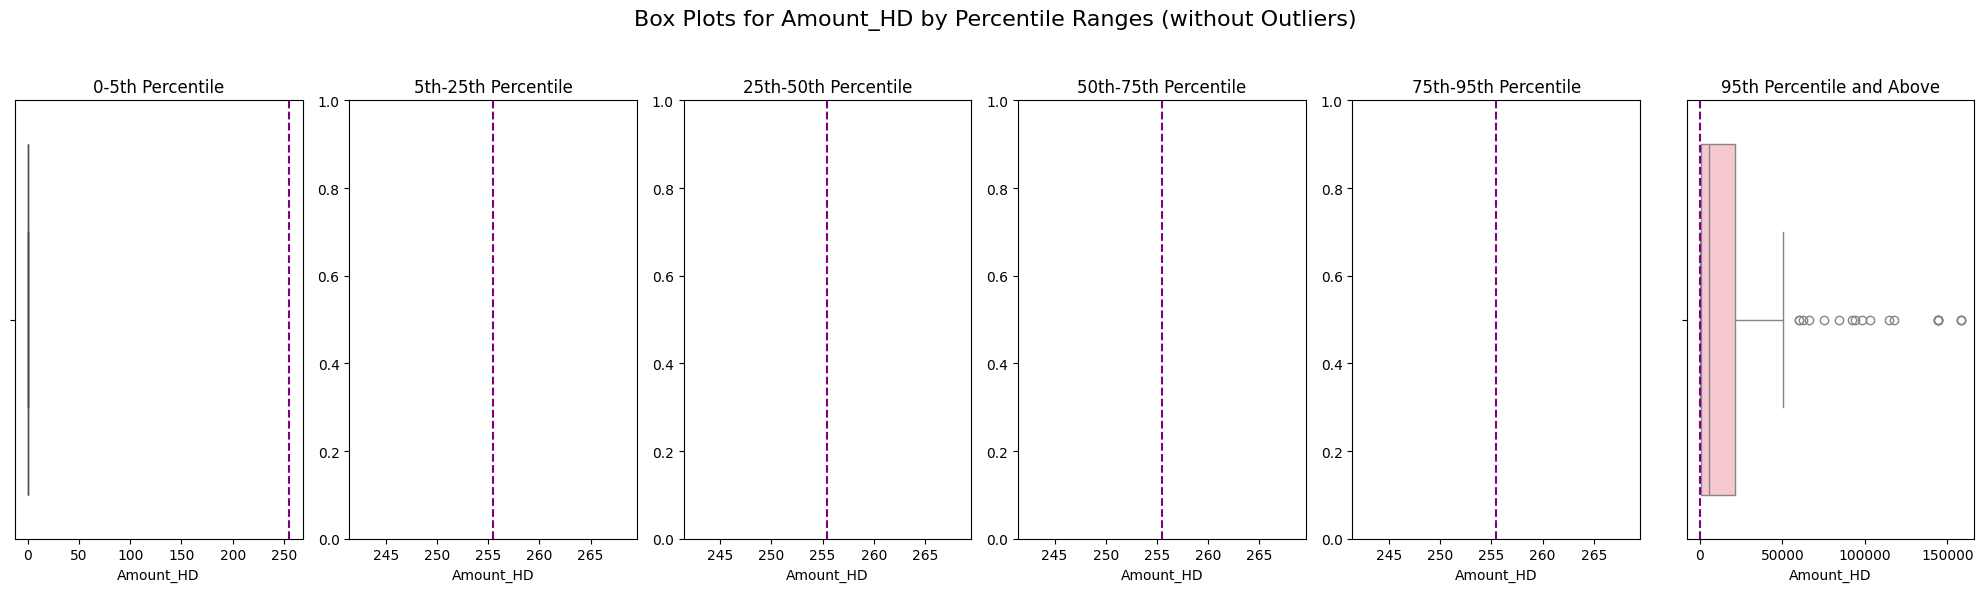

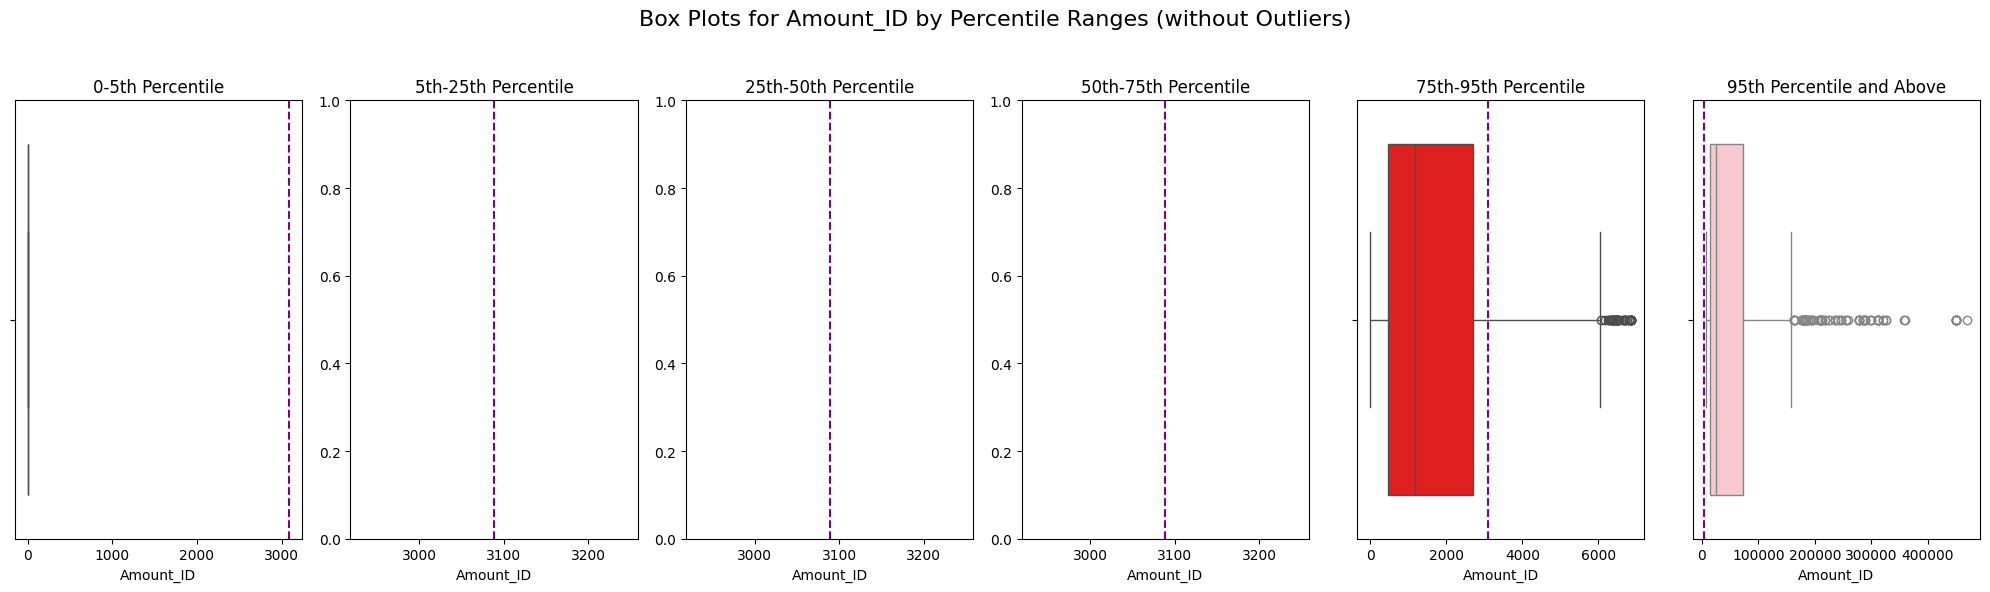

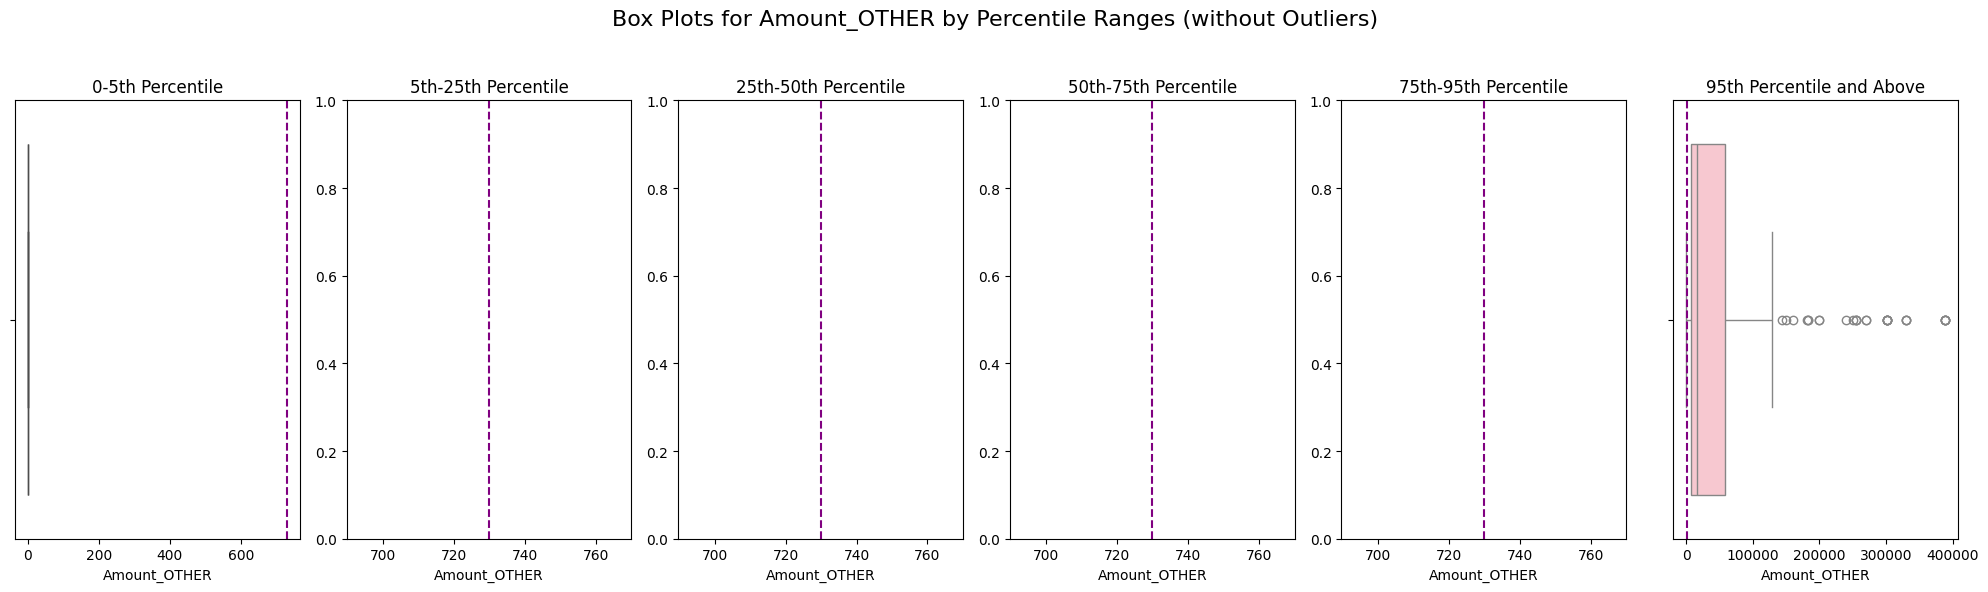

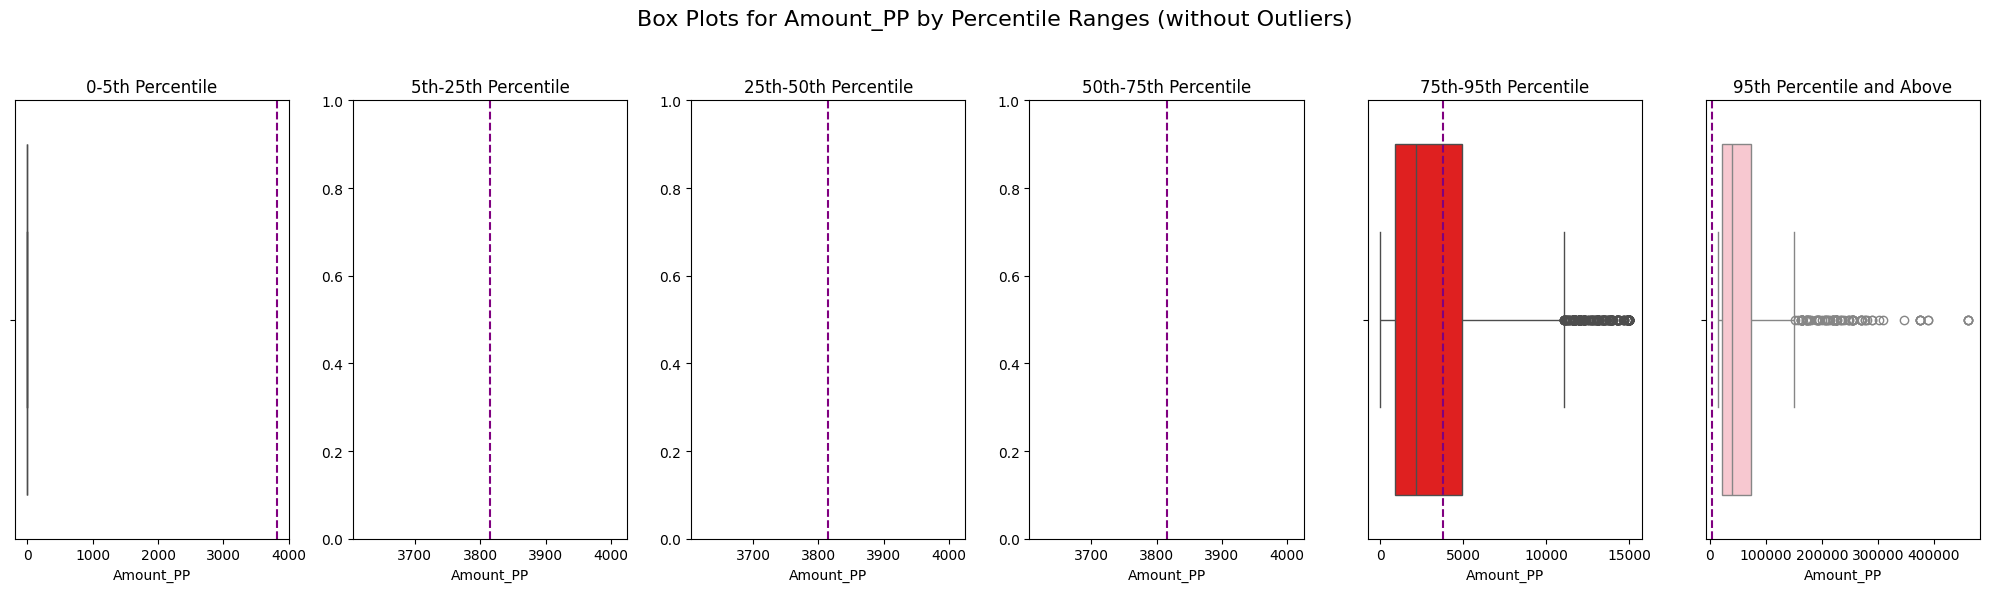

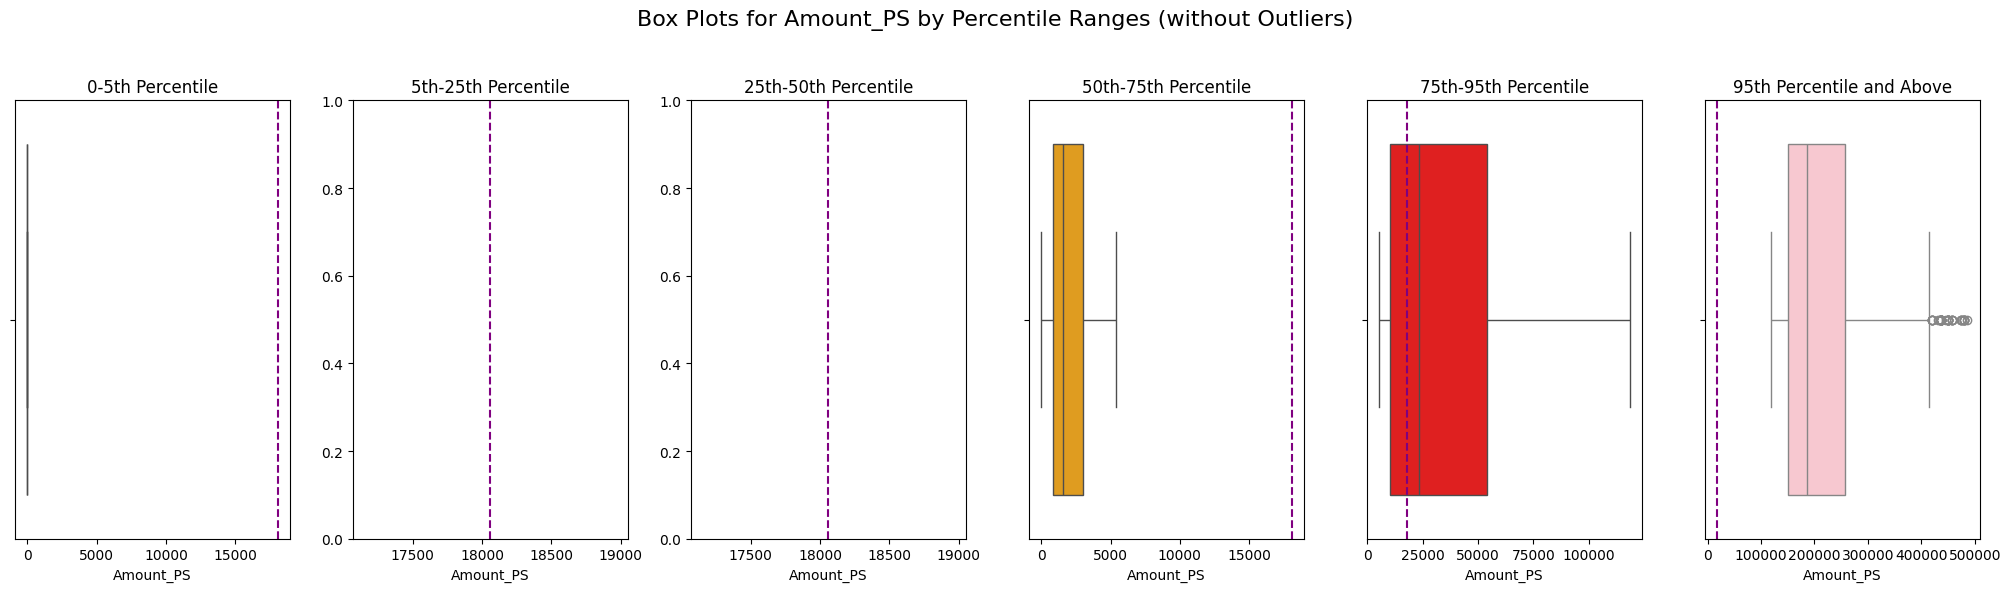

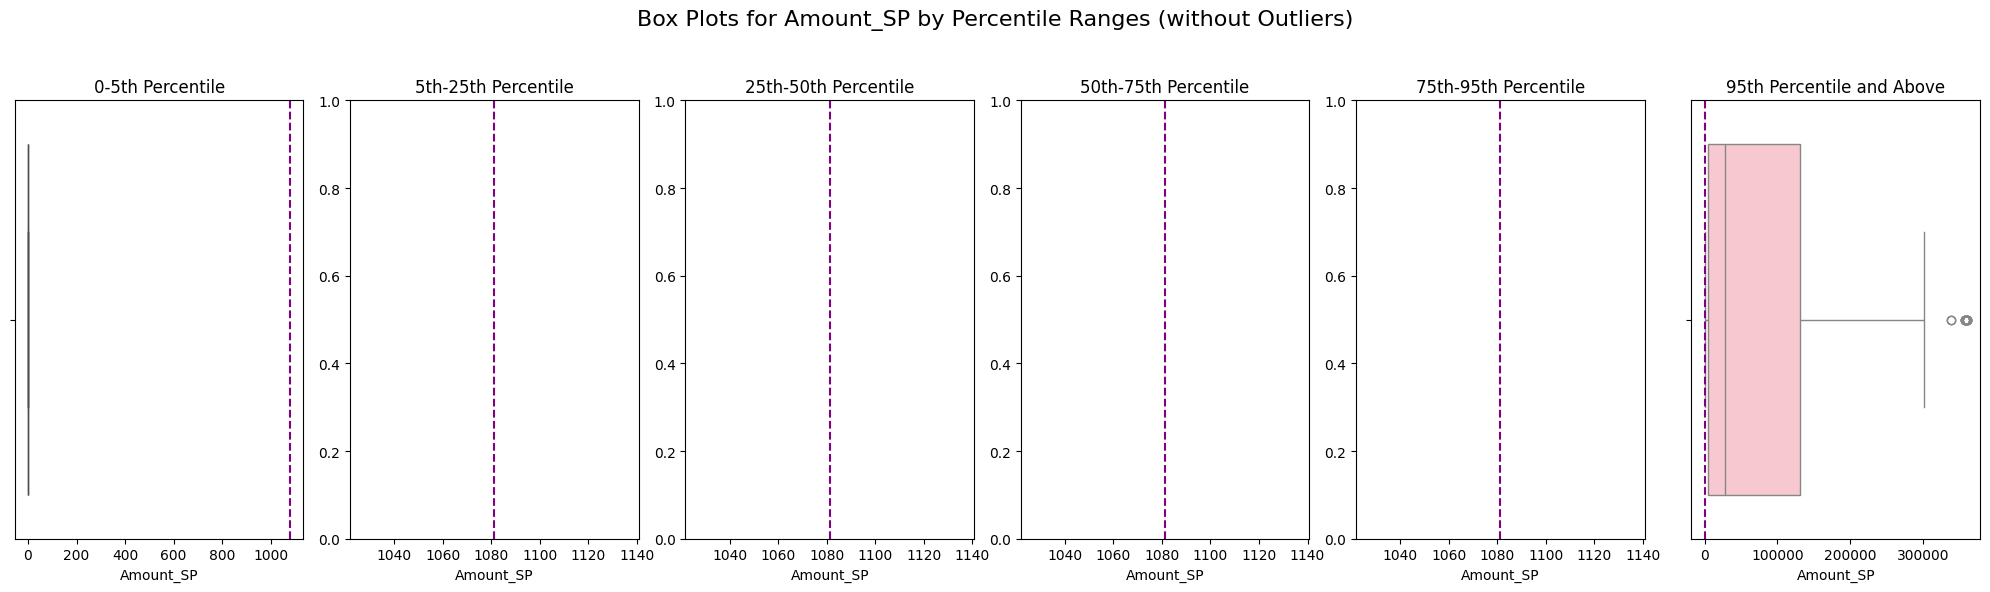

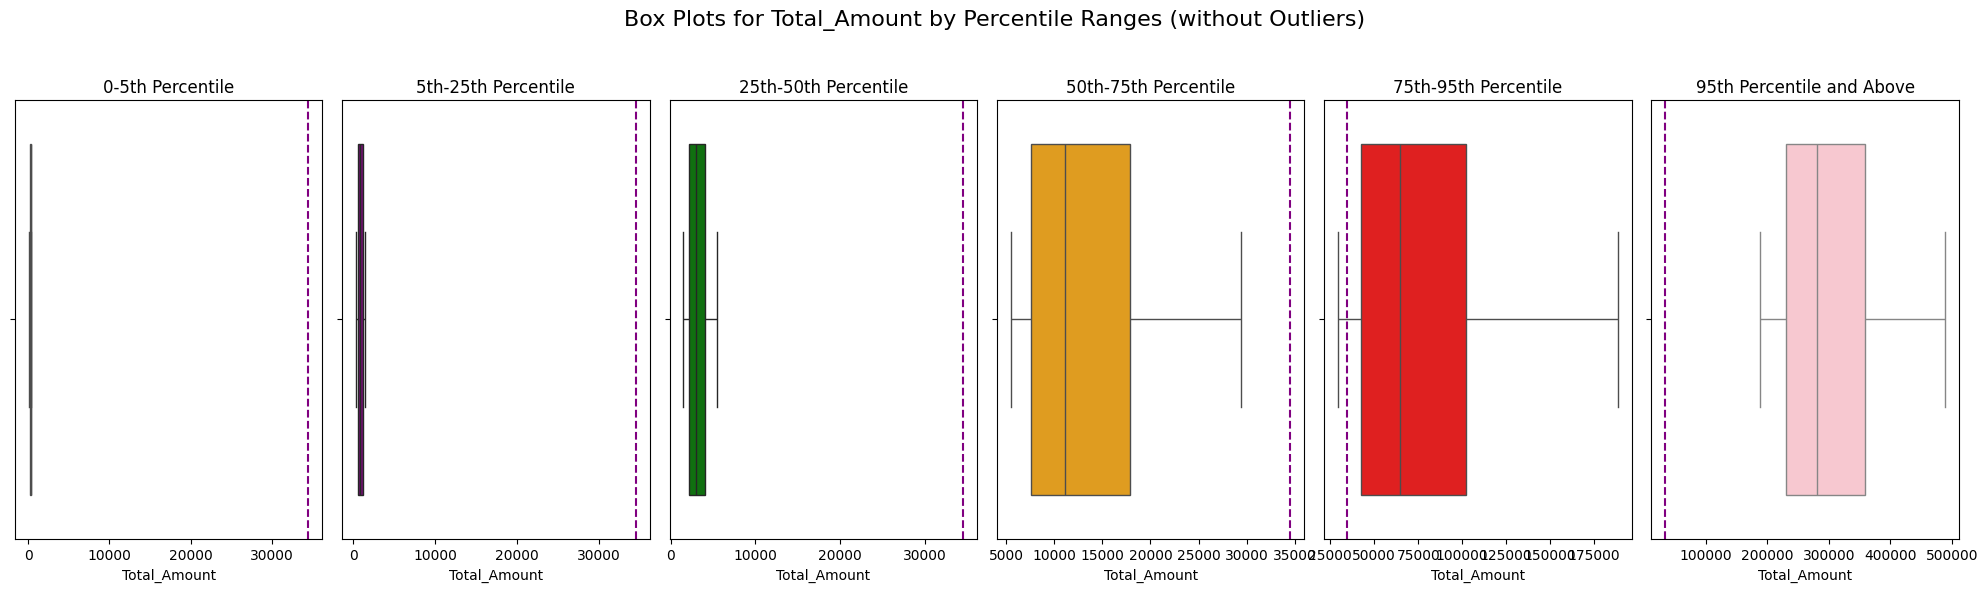

In [31]:
# Box plots - by percentile ranges (without outliers)

# Loop through each column and create box plots for percentile ranges
for col in amount_columns:
    # Calculate percentiles for the column
    percentile_5 = df_without_outliers[col].quantile(0.05)
    percentile_25 = df_without_outliers[col].quantile(0.25)
    percentile_50 = df_without_outliers[col].quantile(0.50)
    percentile_75 = df_without_outliers[col].quantile(0.75)
    percentile_95 = df_without_outliers[col].quantile(0.95)

    # Calculate the mean for the column
    mean_value = df_without_outliers[col].mean()

    # Define subsets for each percentile range
    range_0_5 = df_without_outliers[df_without_outliers[col] <= percentile_5]
    range_5_25 = df_without_outliers[(df_without_outliers[col] > percentile_5) & (df_without_outliers[col] <= percentile_25)]
    range_25_50 = df_without_outliers[(df_without_outliers[col] > percentile_25) & (df_without_outliers[col] <= percentile_50)]
    range_50_75 = df_without_outliers[(df_without_outliers[col] > percentile_50) & (df_without_outliers[col] <= percentile_75)]
    range_75_95 = df_without_outliers[(df_without_outliers[col] > percentile_75) & (df_without_outliers[col] <= percentile_95)]
    range_95_above = df_without_outliers[df_without_outliers[col] > percentile_95]

    # Create a figure with subplots for each range
    plt.figure(figsize=(20, 6))
    plt.suptitle(f'Box Plots for {col} by Percentile Ranges (without Outliers)', fontsize=16)

    # Add mean line to all subplots
    def add_mean_line():
        plt.axvline(mean_value, color='purple', linestyle='--', linewidth=1.5, label=f'Mean ({mean_value:.2f})')

    # 0-5th percentile
    plt.subplot(1, 6, 1)
    sns.boxplot(x=range_0_5[col], color='blue')
    add_mean_line()
    plt.title('0-5th Percentile', fontsize=12)
    plt.xlabel(col, fontsize=10)

    # 5th-25th percentile
    plt.subplot(1, 6, 2)
    sns.boxplot(x=range_5_25[col], color='purple')
    add_mean_line()
    plt.title('5th-25th Percentile', fontsize=12)
    plt.xlabel(col, fontsize=10)

    # 25th-50th percentile
    plt.subplot(1, 6, 3)
    sns.boxplot(x=range_25_50[col], color='green')
    add_mean_line()
    plt.title('25th-50th Percentile', fontsize=12)
    plt.xlabel(col, fontsize=10)

    # 50th-75th percentile
    plt.subplot(1, 6, 4)
    sns.boxplot(x=range_50_75[col], color='orange')
    add_mean_line()
    plt.title('50th-75th Percentile', fontsize=12)
    plt.xlabel(col, fontsize=10)

    # 75th-95th percentile
    plt.subplot(1, 6, 5)
    sns.boxplot(x=range_75_95[col], color='red')
    add_mean_line()
    plt.title('75th-95th Percentile', fontsize=12)
    plt.xlabel(col, fontsize=10)

    # 95th percentile and above
    plt.subplot(1, 6, 6)
    sns.boxplot(x=range_95_above[col], color='pink')
    add_mean_line()
    plt.title('95th Percentile and Above', fontsize=12)
    plt.xlabel(col, fontsize=10)

    # Add a legend (only once)
    if col == amount_columns[0]:
        plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.1), ncol=2)

    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# V. Univariate analysis

In [32]:
# Filter the DataFrame where Bid_Notbid is 'Bid' or 'Not_bid'
df_cleaned_bidnotbid = df_cleaned[df_cleaned['Bid_Notbid'].isin(['Bid', 'Not_bid'])]

# Filter the DataFrame where Result_offer is 'Won' or 'Lost'
df_cleaned_bidwonlost = df_cleaned[
    (df_cleaned['Result_offer'].isin(['Won', 'Lost'])) & 
    (df_cleaned['Bid_Notbid'].isin(['Bid']))]

# Filter the DataFrame where Result_offer is 'Won' 
df_cleaned_bidwon = df_cleaned[
    (df_cleaned['Result_offer'].isin(['Won'])) & 
    (df_cleaned['Bid_Notbid'].isin(['Bid']))]

# Filter the DataFrame where Result_offer is 'Lost'
df_cleaned_bidlost = df_cleaned[
    (df_cleaned['Result_offer'].isin(['Lost'])) & 
    (df_cleaned['Bid_Notbid'].isin(['Bid']))]

In [33]:
# Classify columns into types
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numeric_cols)


Categorical Columns: ['Result_offer', 'SR_codigo', 'Bid_Notbid', 'Client_type', 'Market_segment', 'Client_BU', 'Country', 'Client_importance', 'Coverage_model']
Numerical Columns: ['Amount_DE', 'Amount_HD', 'Amount_ID', 'Amount_OTHER', 'Amount_PP', 'Amount_PS', 'Amount_SP', 'Total_Amount', 'Resolution_time', 'Result_offer_mapped', 'Bid_Notbid_mapped', 'Country_mapped']


## 1. Numerical columns

In [34]:
#Descriptive statistics 

def generate_descriptive_stats(df: pd.DataFrame, columns: list[str]) -> pd.DataFrame:
    """Generate descriptive statistics"""
    stats_df = pd.DataFrame()

    for col in columns:
        stats = {
            "Mean": df[col].mean(),
            "Std": df[col].std(),
            # "Mode": df[col].mode(),
            "Min": df[col].min(),
            "25% (Q1)": df[col].quantile(0.25),
            "50% (Median)": df[col].quantile(0.50),
            "75% (Q3)": df[col].quantile(0.75),
            "Max": df[col].max(),
            "Skewness": df[col].skew(),
            "Kurtosis": df[col].kurtosis(),
            "IQR": df[col].quantile(0.75) - df[col].quantile(0.25),
        }
        stats_df[col] = pd.Series(stats)

    return stats_df


# Calculate statistics for numeric columns

stats_summary = generate_descriptive_stats(df_cleaned, numeric_cols)

with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print("\nDescriptive Statistics (numeric columns):\n", stats_summary)


Descriptive Statistics (numeric columns):
                  Amount_DE      Amount_HD     Amount_ID  Amount_OTHER     Amount_PP     Amount_PS     Amount_SP  Total_Amount  Resolution_time  Result_offer_mapped  Bid_Notbid_mapped  Country_mapped
Mean          2.496982e+04     428.799218  8.540039e+03  3.762989e+03  1.184473e+04  6.988189e+04  2.273997e+04  1.421682e+05        11.051842             0.088026           0.849611        0.562014
Std           4.285851e+05    6645.765854  8.075898e+04  1.358243e+05  1.158684e+05  8.524697e+05  4.089325e+05  1.417390e+06        15.234392             0.810436           0.517572        0.812145
Min           0.000000e+00       0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00        -6.700000            -1.000000          -1.000000       -1.000000
25% (Q1)      0.000000e+00       0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.404071e+03         0.900000            -1.000

**Analysis**

Amount Columns (Amount_DE, Amount_HD, etc.):
    Means and Medians (50%):
    All amount columns (e.g., Amount_DE, Amount_HD, etc.) have a median of 0, indicating that the majority of entries in these columns are zero, as confirmed by the high percentage of zero values previously discussed.
    However, the mean for most columns is significantly higher than the median, which suggests the presence of some very large outliers (i.e., extreme values).

    Skewness and Kurtosis:
    All amount columns have extremely high skewness (e.g., Amount_DE: 65.6, Amount_HD: 22.2). This indicates that these columns have a long tail to the right, meaning a few very large values dominate the distribution.
    High kurtosis (e.g., Amount_DE: 4925, Amount_HD: 570) suggests a very sharp peak and heavy tails, again confirming the presence of outliers.

    Standard Deviation and IQR:
    The standard deviation is extremely high (e.g., Amount_DE: 428,585), indicating substantial variability.
    The interquartile range (IQR) is 0 for most amount columns, showing that the majority of the data is concentrated at zero.

    Conclusion for Amount Columns:
    These columns are dominated by zeros, with a small number of extremely large outliers. This may require special preprocessing, such as handling zeros as missing values (NaN) to avoid skewing statistical measures or distorting correlations.

Total_Amount:
    Mean and Median:
    The mean (142,168) is much higher than the median (5,504), indicating a right-skewed distribution.
    This column also contains extreme outliers, as shown by the maximum value (89,403,000).

    Skewness and Kurtosis:
    The skewness (44.7) and kurtosis (2524.7) confirm a heavily skewed distribution with extreme values.

    IQR and Quartiles:
    The IQR (33,355) indicates the range within which most data lies, but the large gap between Q3 (34,759) and the max (89,403,000) confirms the presence of substantial outliers.

    Conclusion for Total_Amount:
    This column is highly influenced by outliers, which could bias analyses like correlation or regression. 
    
Resolution_time:
    Mean: 11.05, Median: 6.2
    Minimum: -6.7 (potential data entry error), Maximum: 266.8
    High skewness (3.49) indicates some extremely long resolution times.
    IQR (14) suggests that most resolution times are under 14 days, but a few cases take considerably longer.
    
    Conclusion:
    Resolution times are generally short, with a few significantly delayed cases. 

Result_offer_mapped and Bid_Notbid_mapped:
    Result_offer_mapped: Values are approximately balanced between -1 (Lost), 0 (Pipeline), and 1 (Won), as indicated by the mean (0.088).
    Bid_Notbid_mapped: Highly skewed towards 1, indicating that most offers were bid.

    Conclusion:
    Bid_Notbid_mapped shows imbalance, which could impact classification models and may require oversampling or other balancing techniques.

Overall Insights:
    - The dataset contains a significant number of zeros in the amount columns, which represent no transactions. These zeros may need to be treated as missing values for certain analyses like correlation.
    - Outliers dominate most numerical columns (Amount_DE, Total_Amount, etc.), significantly skewing their distributions. 
    - Resolution_time has negative values that should be checked for errors.
    - The categorical columns (e.g. Bid_Notbid_mapped) appear well-structured but may require balancing for predictive modeling.

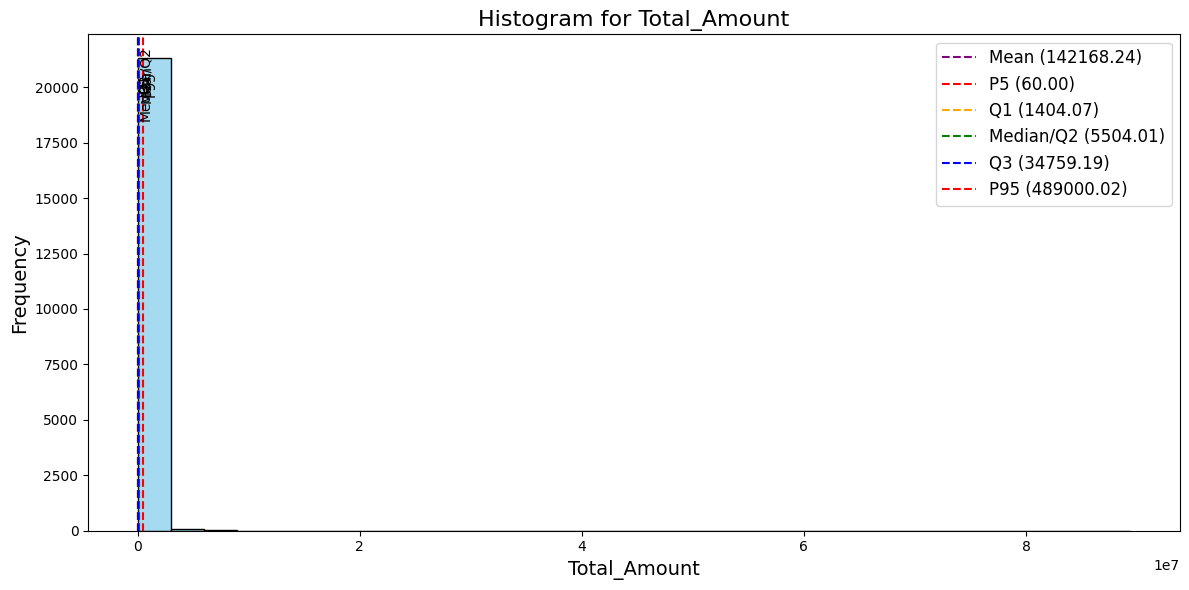

In [35]:
#Histogram of Total_Amount

amount_columns = ['Amount_DE', 'Amount_HD', 'Amount_ID', 'Amount_OTHER', 'Amount_PP', 'Amount_PS', 'Amount_SP', 'Total_Amount']

# Calculate key statistics
mean_value = df_cleaned['Total_Amount'].mean()
P5 = df_cleaned['Total_Amount'].quantile(0.05)
Q1 = df_cleaned['Total_Amount'].quantile(0.25)
Q2 = df_cleaned['Total_Amount'].quantile(0.50)  # Median
Q3 = df_cleaned['Total_Amount'].quantile(0.75)
P95 = df_cleaned['Total_Amount'].quantile(0.95)

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Total_Amount'], bins=30, kde=False, color="skyblue", edgecolor="black")
plt.title("Histogram for Total_Amount", fontsize=16)
plt.xlabel("Total_Amount", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Add vertical lines for statistics
plt.axvline(mean_value, color='purple', linestyle='--', linewidth=1.5, label=f'Mean ({mean_value:.2f})')
plt.axvline(P5, color='red', linestyle='--', linewidth=1.5, label=f'P5 ({P5:.2f})')
plt.axvline(Q1, color='orange', linestyle='--', linewidth=1.5, label=f'Q1 ({Q1:.2f})')
plt.axvline(Q2, color='green', linestyle='--', linewidth=1.5, label=f'Median/Q2 ({Q2:.2f})')
plt.axvline(Q3, color='blue', linestyle='--', linewidth=1.5, label=f'Q3 ({Q3:.2f})')
plt.axvline(P95, color='red', linestyle='--', linewidth=1.5, label=f'P95 ({P95:.2f})')

# Annotate the vertical lines
for x, label in zip([mean_value, P5, Q1, Q2, Q3, P95], 
                    ['Mean', 'P5', 'Q1', 'Median/Q2', 'Q3', 'P95']):
    plt.text(x, plt.ylim()[1] * 0.9, label, rotation=90, verticalalignment='center', fontsize=10, color="black")

# Add legend and show plot
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


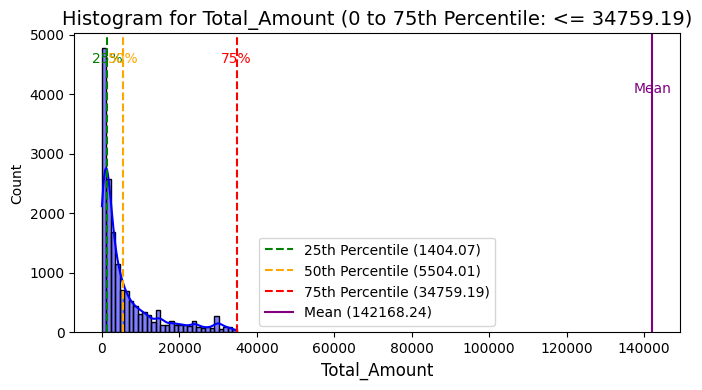

In [36]:
# Histogram divided on percentiles (0 - 75th percentile) & (75th and above), including Mean line

# Calculate percentiles
percentile_25 = df_cleaned['Total_Amount'].quantile(0.25)
percentile_50 = df_cleaned['Total_Amount'].quantile(0.50)  # Median
percentile_75 = df_cleaned['Total_Amount'].quantile(0.75)

# Calculate mean
mean_value = df_cleaned['Total_Amount'].mean()

# Filter data for each range
subset1 = df_cleaned[df_cleaned['Total_Amount'] <= percentile_75]  # 0th to 75th percentile
subset2 = df_cleaned[df_cleaned['Total_Amount'] > percentile_75]   # Above 75th percentile

# Plot the first range (0 to 75th percentile)
plt.figure(figsize=(7, 4))
sns.histplot(
    data=subset1,
    x='Total_Amount',
    bins=30,
    kde=True,
    color='blue'
)

# Add vertical lines and annotations for percentiles
plt.axvline(percentile_25, color='green', linestyle='--', label=f'25th Percentile ({percentile_25:.2f})')
plt.axvline(percentile_50, color='orange', linestyle='--', label=f'50th Percentile ({percentile_50:.2f})')
plt.axvline(percentile_75, color='red', linestyle='--', label=f'75th Percentile ({percentile_75:.2f})')

# Add vertical lines and annotation for mean
plt.axvline(mean_value, color='purple', linestyle='-', linewidth=1.5, label=f'Mean ({mean_value:.2f})')

# Add text for percentiles
plt.text(percentile_25, plt.gca().get_ylim()[1] * 0.9, '25%', color='green', ha='center')
plt.text(percentile_50, plt.gca().get_ylim()[1] * 0.9, '50%', color='orange', ha='center')
plt.text(percentile_75, plt.gca().get_ylim()[1] * 0.9, '75%', color='red', ha='center')
plt.text(mean_value, plt.gca().get_ylim()[1] * 0.8, 'Mean', color='purple', ha='center')

# Customize the plot
plt.title(f'Histogram for Total_Amount (0 to 75th Percentile: <= {percentile_75:.2f})', fontsize=14)
plt.xlabel('Total_Amount', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


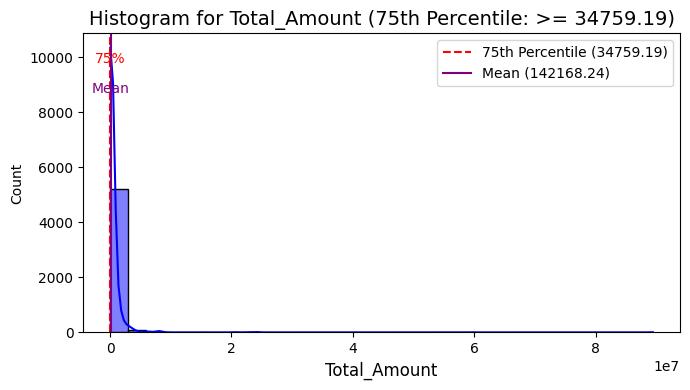

In [37]:
# Histogram divided on percentiles (75th and above), including Mean line

# Calculate percentiles
percentile_25 = df_cleaned['Total_Amount'].quantile(0.25)
percentile_50 = df_cleaned['Total_Amount'].quantile(0.50)  # Median
percentile_75 = df_cleaned['Total_Amount'].quantile(0.75)

# Calculate mean
mean_value = df_cleaned['Total_Amount'].mean()

# Filter data for each range
subset1 = df_cleaned[df_cleaned['Total_Amount'] <= percentile_75]  # 0th to 75th percentile
subset2 = df_cleaned[df_cleaned['Total_Amount'] > percentile_75]   # Above 75th percentile

# Plot the first range (0 to 75th percentile)
plt.figure(figsize=(7, 4))
sns.histplot(
    data=subset2,
    x='Total_Amount',
    bins=30,
    kde=True,
    color='blue'
)

# Add vertical lines and annotations for percentiles
plt.axvline(percentile_75, color='red', linestyle='--', label=f'75th Percentile ({percentile_75:.2f})')

# Add vertical lines and annotation for mean
plt.axvline(mean_value, color='purple', linestyle='-', linewidth=1.5, label=f'Mean ({mean_value:.2f})')

# Add text for percentiles
plt.text(percentile_75, plt.gca().get_ylim()[1] * 0.9, '75%', color='red', ha='center')
plt.text(mean_value, plt.gca().get_ylim()[1] * 0.8, 'Mean', color='purple', ha='center')

# Customize the plot
plt.title(f'Histogram for Total_Amount (75th Percentile: >= {percentile_75:.2f})', fontsize=14)
plt.xlabel('Total_Amount', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


In [38]:
# Histogram Table for Total_Amount

# Assuming 'Total_Amount' is the column for the histogram
column_name = 'Total_Amount'

# Ensure your dataset contains valid numerical data for this column
data = df_cleaned[column_name].dropna()

# Define custom bin edges based on percentiles
P5 = np.percentile(data, 5)
Q1 = np.percentile(data, 25)
Q2 = np.percentile(data, 50)
Q3 = np.percentile(data, 75)
P95 = np.percentile(data, 95)

# Custom bins: Start from 0, include P5, Q1, Q2, Q3, P95, and max value
custom_bins = [0, P5, Q1, Q2, Q3, P95, data.max()]

# Calculate histogram counts and edges with custom bins
counts, edges = np.histogram(data, bins=custom_bins)

# Calculate total count for percentage calculation
total_count = counts.sum()

# Create a histogram table
histogram_table = pd.DataFrame({
    'Bin Start': edges[:-1],
    'Bin End': edges[1:],
    'Count': counts,
    'Percentage (%)': (counts / total_count * 100).round(2)
})

# Function for assigning percentiles
def assign_percentile(bin_start, bin_end, P5, Q1, Q2, Q3, P95):
    if bin_end <= P5:
        return 'Below 5th Percentile'
    elif bin_start >= P5 and bin_end <= Q1:
        return 'Q1 (5-25%)'
    elif bin_start >= Q1 and bin_end <= Q2:
        return 'Q2 (25-50%)'
    elif bin_start >= Q2 and bin_end <= Q3:
        return 'Q3 (50-75%)'
    elif bin_start >= Q3 and bin_end <= P95:
        return 'Q4 (75-95%)'
    elif bin_start >= P95:
        return 'Above 95th Percentile'
    else:
        return 'Uncategorized'

# Apply the function to assign percentiles
histogram_table['Percentile'] = [
    assign_percentile(edges[i], edges[i + 1], P5, Q1, Q2, Q3, P95) for i in range(len(edges) - 1)
]

# Display the histogram table
print("\nHistogram Table for Total_Amount:")
print(histogram_table)

print('-------------------------------------------------------------------------------------')
print(f"P5: {P5}, Q1: {Q1}, Q2: {Q2}, Q3: {Q3}, P95: {P95}")
print(f"Custom Bins: {custom_bins}")



Histogram Table for Total_Amount:
     Bin Start       Bin End  Count  Percentage (%)             Percentile
0       0.0000  6.000000e+01   1072            4.99   Below 5th Percentile
1      60.0000  1.404071e+03   4296           20.01             Q1 (5-25%)
2    1404.0705  5.504010e+03   5367           25.00            Q2 (25-50%)
3    5504.0100  3.475919e+04   5367           25.00            Q3 (50-75%)
4   34759.1880  4.890000e+05   4295           20.00            Q4 (75-95%)
5  489000.0180  8.940300e+07   1074            5.00  Above 95th Percentile
-------------------------------------------------------------------------------------
P5: 60.0, Q1: 1404.0705, Q2: 5504.01, Q3: 34759.188, P95: 489000.01800000004
Custom Bins: [0, 60.0, 1404.0705, 5504.01, 34759.188, 489000.01800000004, 89403000.3]


#### Amounts.
- The distribution of the data is highly skewed, most values are near zero and only a few large outliers.
- We need to split data into groups

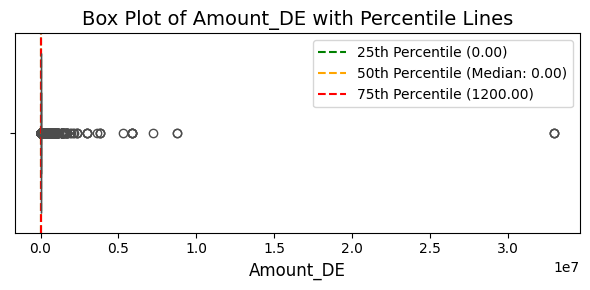

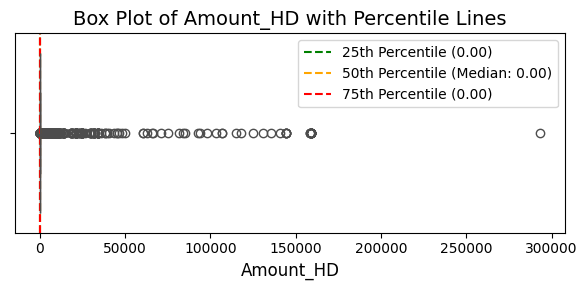

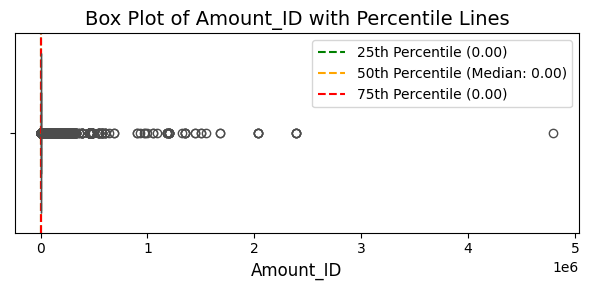

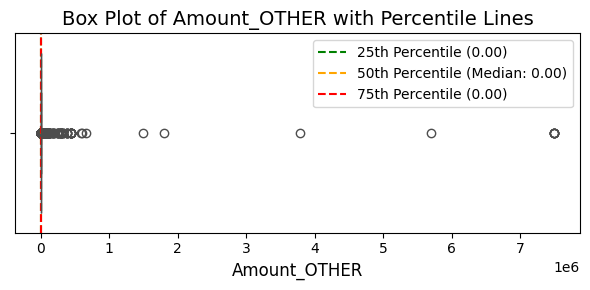

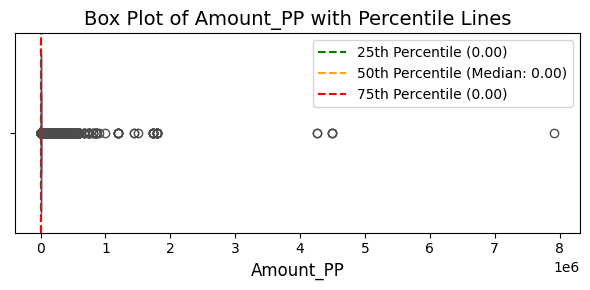

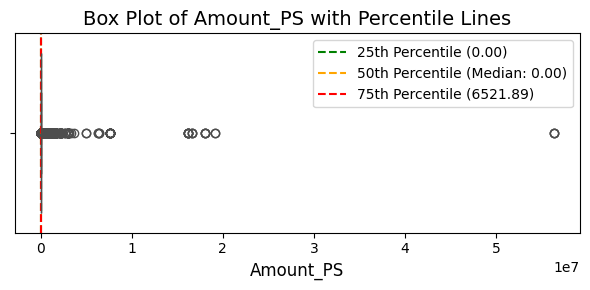

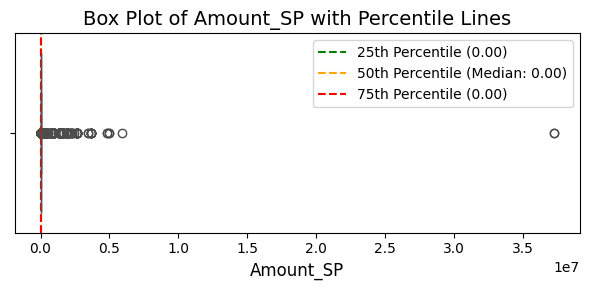

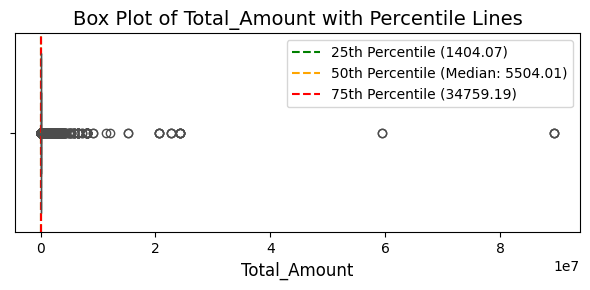

In [39]:
# Box plots for each amount column (per business)

# List of columns for which to create box plots
amount_columns = ['Amount_DE', 'Amount_HD', 'Amount_ID', 'Amount_OTHER', 'Amount_PP', 'Amount_PS', 'Amount_SP', 'Total_Amount']

# Loop through each column and create a box plot
for col in amount_columns:
    # Calculate percentiles
    percentile_25 = df_cleaned[col].quantile(0.25)
    percentile_50 = df_cleaned[col].quantile(0.50)  # Median
    percentile_75 = df_cleaned[col].quantile(0.75)

    # Create the box plot
    plt.figure(figsize=(6, 3))
    sns.boxplot(
        data=df_cleaned,
        x=col,
        color='blue'
    )

    # Add vertical lines for percentiles
    plt.axvline(percentile_25, color='green', linestyle='--', label=f'25th Percentile ({percentile_25:.2f})')
    plt.axvline(percentile_50, color='orange', linestyle='--', label=f'50th Percentile (Median: {percentile_50:.2f})')
    plt.axvline(percentile_75, color='red', linestyle='--', label=f'75th Percentile ({percentile_75:.2f})')

    # Add a legend
    plt.legend()

    # Add titles and labels
    plt.title(f'Box Plot of {col} with Percentile Lines', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()


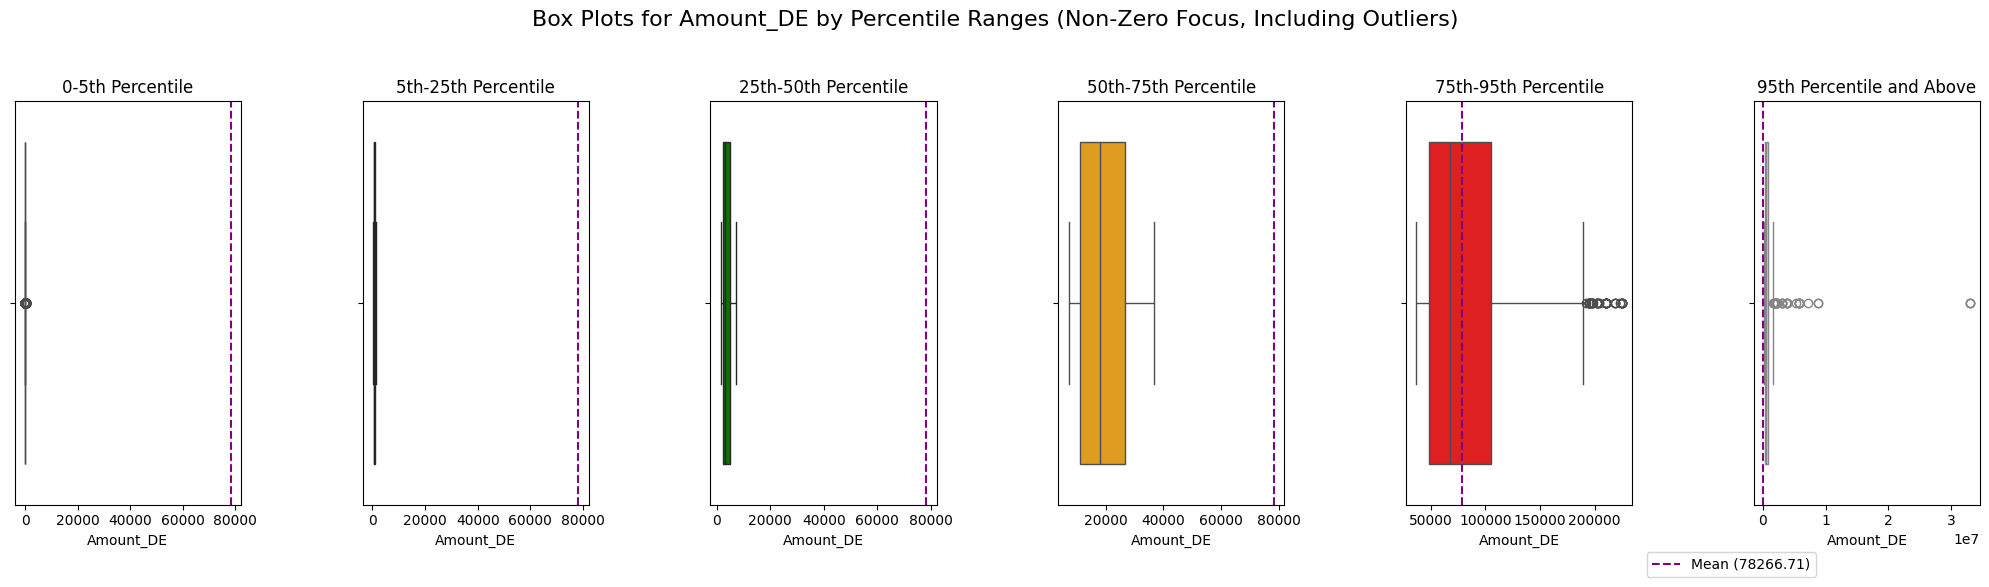

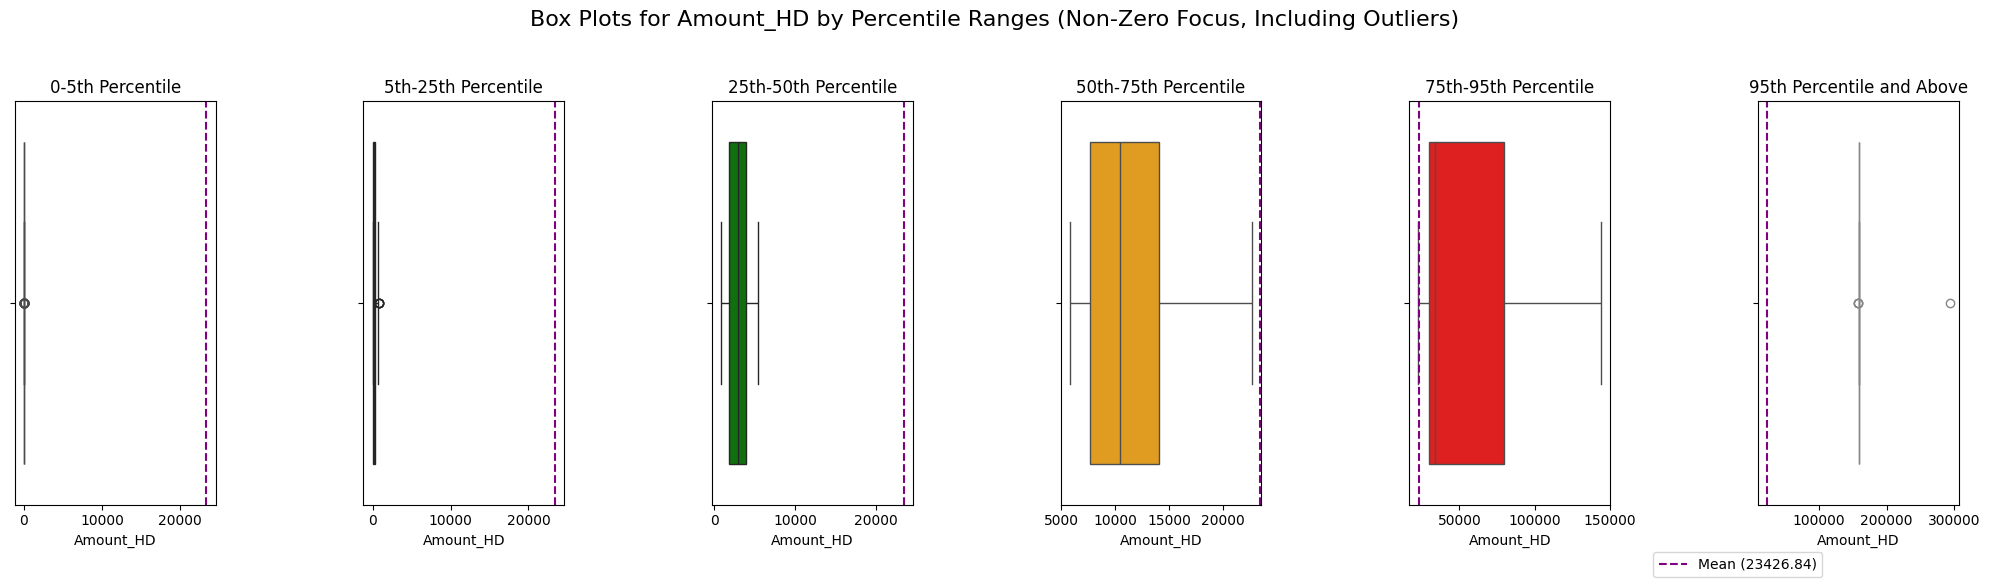

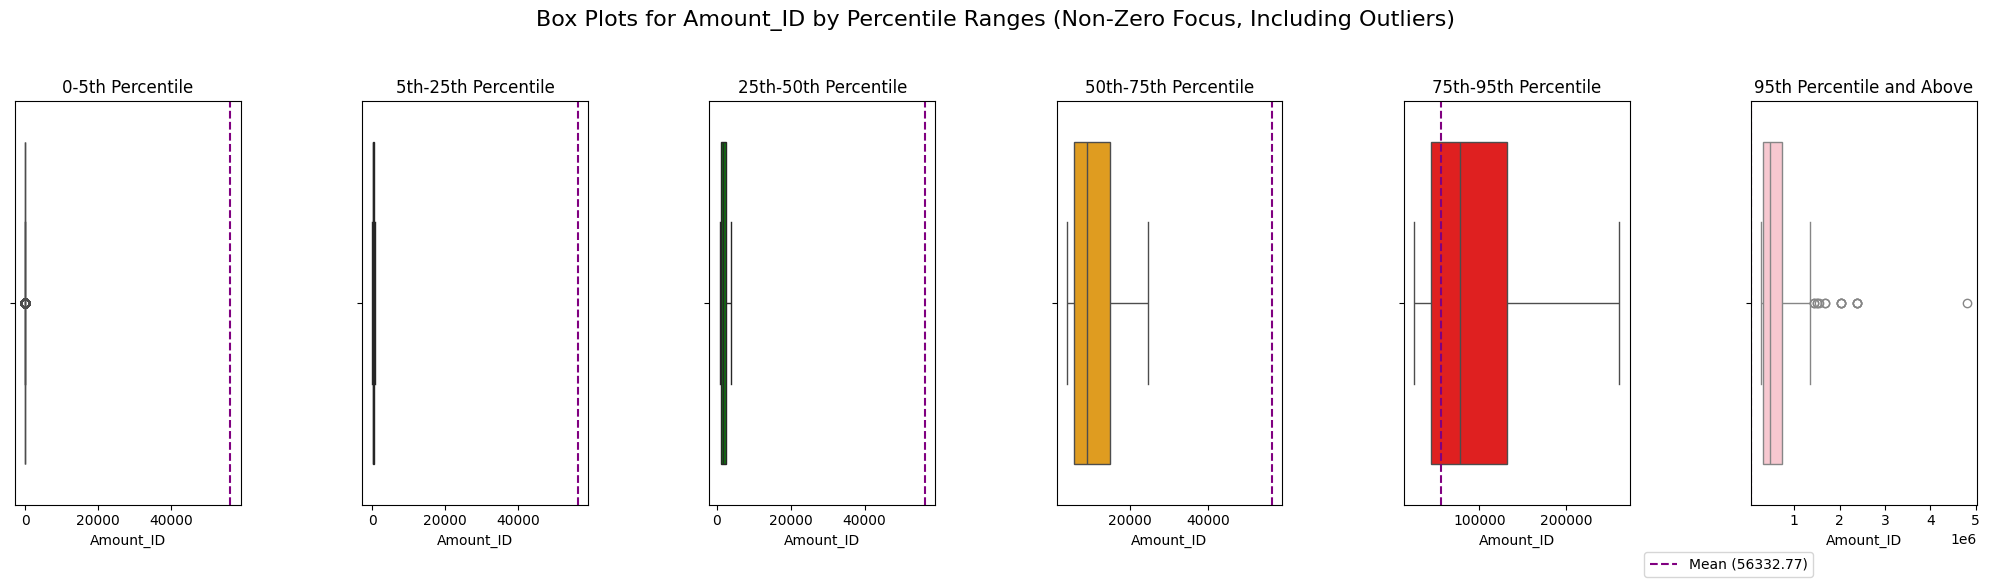

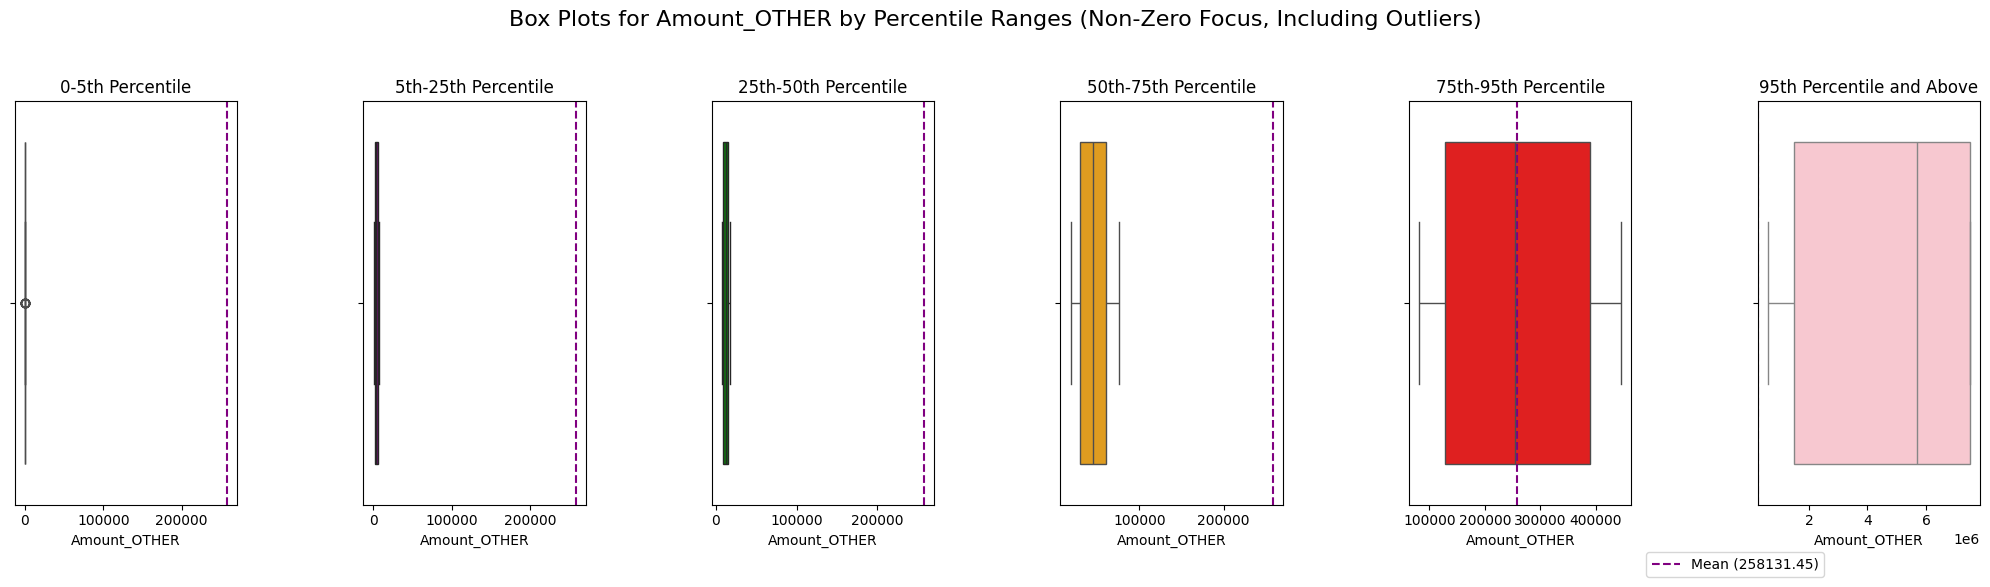

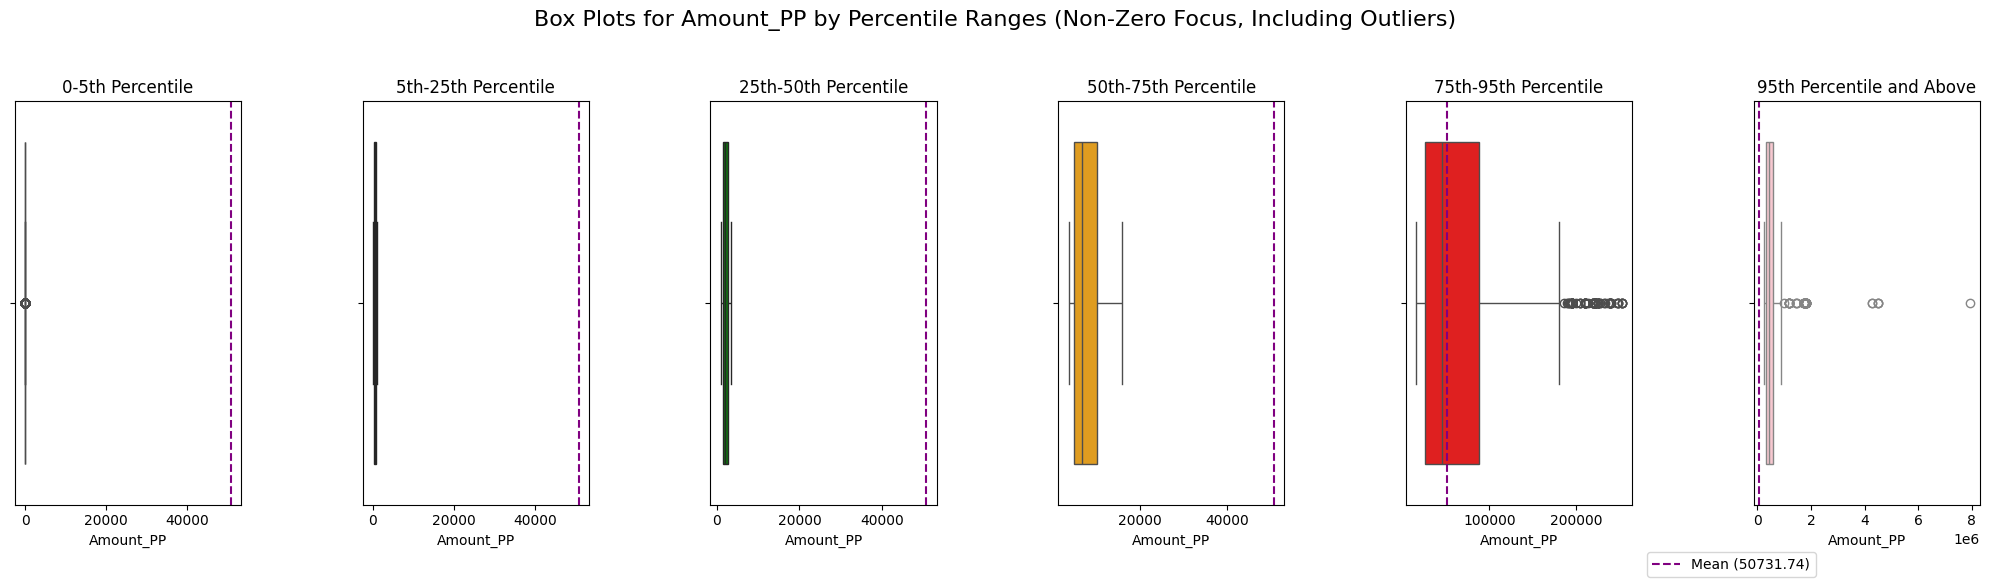

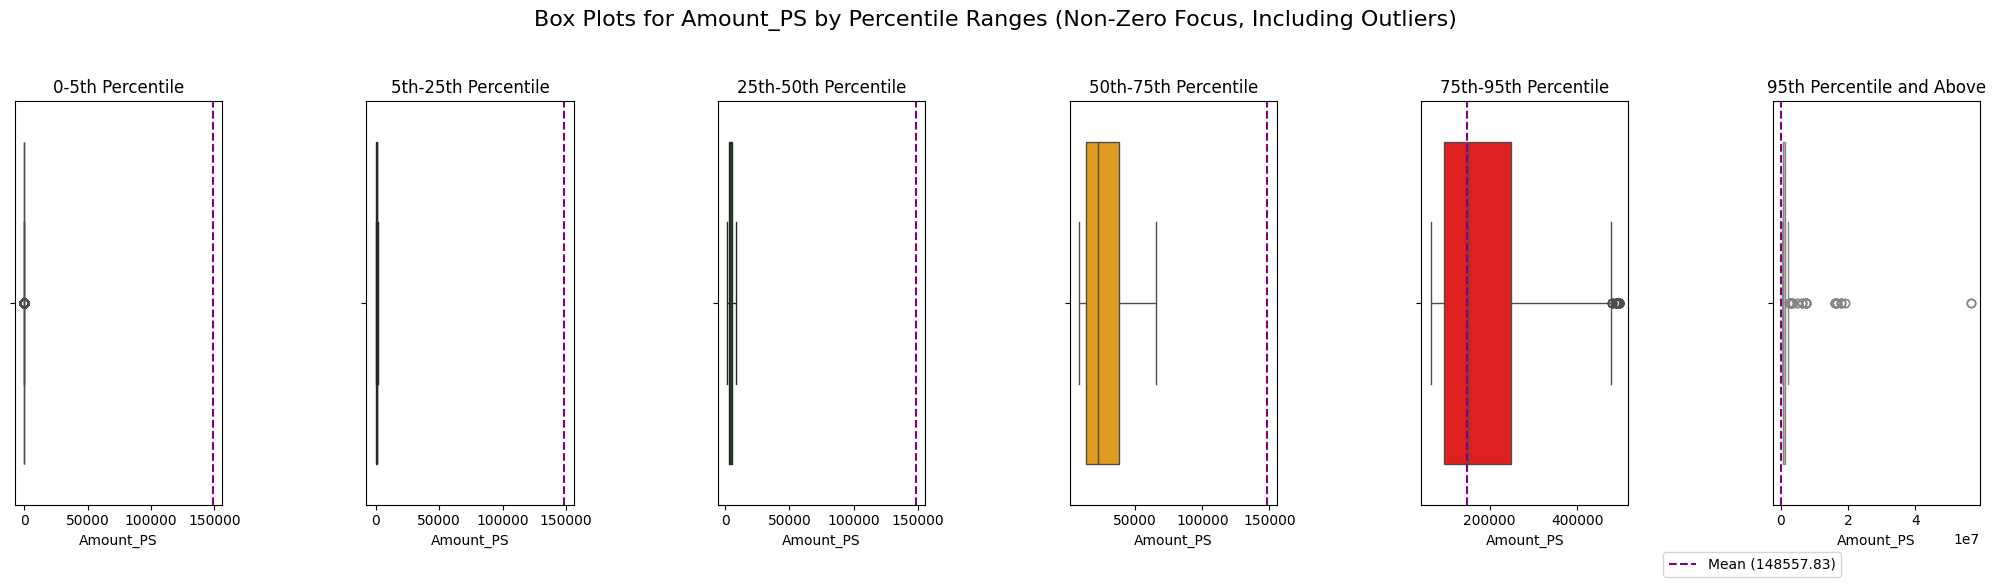

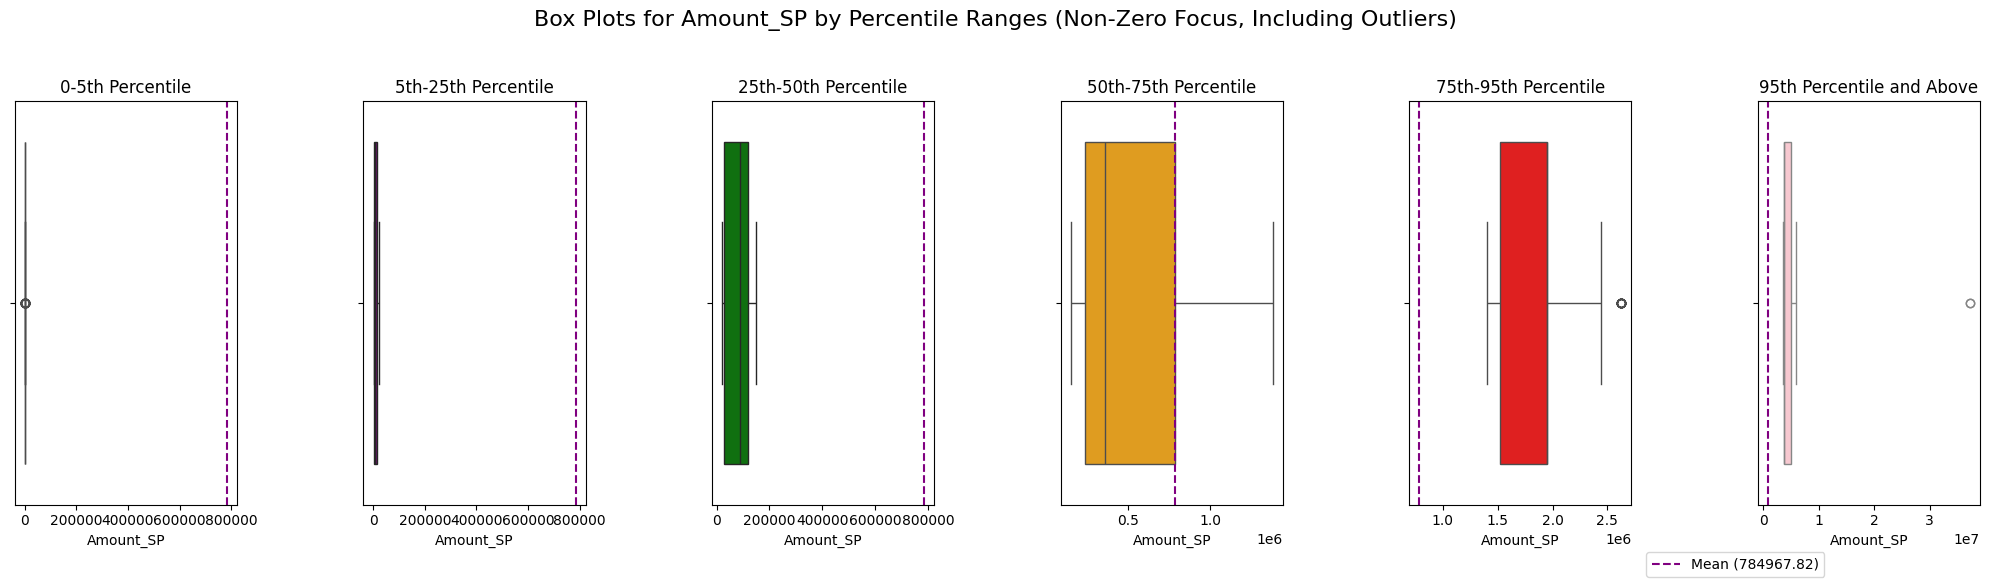

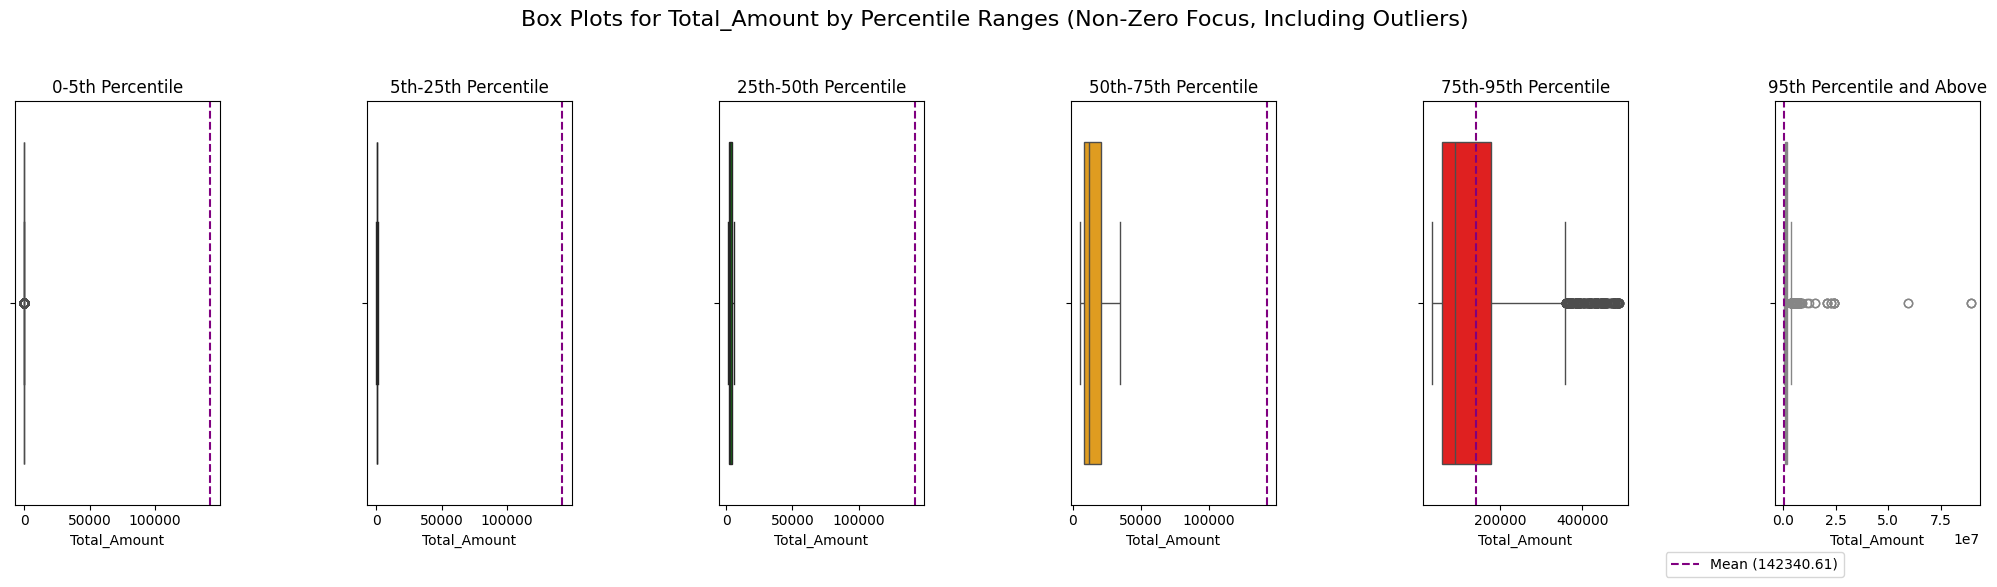

In [40]:
# Box plots - by percentile ranges with non-zero focus
for col in amount_columns:
    # Exclude zeros for percentile calculation
    non_zero_values = df_cleaned[col][df_cleaned[col] > 0]
    
    # Skip processing if no non-zero values
    if non_zero_values.empty:
        print(f"No non-zero values for {col}, skipping...")
        continue
    
    # Calculate percentiles for non-zero values
    percentile_5 = non_zero_values.quantile(0.05)
    percentile_25 = non_zero_values.quantile(0.25)
    percentile_50 = non_zero_values.quantile(0.50)
    percentile_75 = non_zero_values.quantile(0.75)
    percentile_95 = non_zero_values.quantile(0.95)

    # Calculate the mean for non-zero values
    mean_value = non_zero_values.mean()

    # Define subsets for each percentile range
    range_0_5 = df_cleaned[df_cleaned[col] <= percentile_5]
    range_5_25 = df_cleaned[(df_cleaned[col] > percentile_5) & (df_cleaned[col] <= percentile_25)]
    range_25_50 = df_cleaned[(df_cleaned[col] > percentile_25) & (df_cleaned[col] <= percentile_50)]
    range_50_75 = df_cleaned[(df_cleaned[col] > percentile_50) & (df_cleaned[col] <= percentile_75)]
    range_75_95 = df_cleaned[(df_cleaned[col] > percentile_75) & (df_cleaned[col] <= percentile_95)]
    range_95_above = df_cleaned[df_cleaned[col] > percentile_95]

    # Create a figure with subplots for each range
    plt.figure(figsize=(20, 6))
    plt.suptitle(f'Box Plots for {col} by Percentile Ranges (Non-Zero Focus, Including Outliers)', fontsize=16)

    # Add mean line to all subplots
    def add_mean_line():
        plt.axvline(mean_value, color='purple', linestyle='--', linewidth=1.5, label=f'Mean ({mean_value:.2f})')

    # 0-5th percentile
    plt.subplot(1, 6, 1)
    sns.boxplot(x=range_0_5[col], color='blue')
    add_mean_line()
    plt.title('0-5th Percentile', fontsize=12)
    plt.xlabel(col, fontsize=10)

    # 5th-25th percentile
    plt.subplot(1, 6, 2)
    sns.boxplot(x=range_5_25[col], color='purple')
    add_mean_line()
    plt.title('5th-25th Percentile', fontsize=12)
    plt.xlabel(col, fontsize=10)

    # 25th-50th percentile
    plt.subplot(1, 6, 3)
    sns.boxplot(x=range_25_50[col], color='green')
    add_mean_line()
    plt.title('25th-50th Percentile', fontsize=12)
    plt.xlabel(col, fontsize=10)

    # 50th-75th percentile
    plt.subplot(1, 6, 4)
    sns.boxplot(x=range_50_75[col], color='orange')
    add_mean_line()
    plt.title('50th-75th Percentile', fontsize=12)
    plt.xlabel(col, fontsize=10)

    # 75th-95th percentile
    plt.subplot(1, 6, 5)
    sns.boxplot(x=range_75_95[col], color='red')
    add_mean_line()
    plt.title('75th-95th Percentile', fontsize=12)
    plt.xlabel(col, fontsize=10)

    # 95th percentile and above
    plt.subplot(1, 6, 6)
    sns.boxplot(x=range_95_above[col], color='pink')
    add_mean_line()
    plt.title('95th Percentile and Above', fontsize=12)
    plt.xlabel(col, fontsize=10)

    # Add a legend for the mean line
    plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.1), ncol=2)

    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [41]:
# Histogram table for amount_columns

# Initialize histogram_tables as an empty dictionary
histogram_tables = {}

# Updated histogram table for amount_columns
for col in amount_columns:
    # Filter out zeros for quantile calculation
    non_zero_values = df_cleaned[col][df_cleaned[col] > 0]
    
    # Skip processing if no non-zero values
    if non_zero_values.empty:
        print(f"No non-zero values for {col}, skipping...")
        continue
    
    # Calculate quartiles and percentiles for non-zero values
    P5 = non_zero_values.quantile(0.05)
    Q1 = non_zero_values.quantile(0.25)
    Q2 = non_zero_values.quantile(0.50)
    Q3 = non_zero_values.quantile(0.75)
    P95 = non_zero_values.quantile(0.95)
    
    # Define bins explicitly for non-zero values
    bins = [0, P5, Q1, Q2, Q3, P95, non_zero_values.max()]

    # Handle case where all values are identical (cannot create bins)
    if non_zero_values.nunique() == 1:
        print(f"All values in {col} are identical, skipping...")
        continue

    # Calculate histogram frequencies and edges
    hist, edges = np.histogram(non_zero_values, bins=bins)

    # Create a DataFrame to display results
    histogram_table = pd.DataFrame({
        'Bin Range': [f"[{edges[i]:.2f}, {edges[i + 1]:.2f})" for i in range(len(edges) - 1)],
        'Frequency': hist,
        'Percentage': (hist / hist.sum()) * 100
    })

    # Apply corrected percentile assignment
    histogram_table['Percentile'] = [
        assign_percentile(edges[i], edges[i + 1], P5, Q1, Q2, Q3, P95) for i in range(len(edges) - 1)
    ]

    # Store the table in the dictionary
    histogram_tables[col] = histogram_table
    print(f"\nHistogram Table for {col}:")
    print(histogram_table)



Histogram Table for Amount_DE:
                  Bin Range  Frequency  Percentage             Percentile
0            [0.00, 179.04)        343    5.007299   Below 5th Percentile
1         [179.04, 1500.00)       1309   19.109489             Q1 (5-25%)
2        [1500.00, 7176.32)       1772   25.868613            Q2 (25-50%)
3       [7176.32, 36890.55)       1713   25.007299            Q3 (50-75%)
4     [36890.55, 225000.00)       1367   19.956204            Q4 (75-95%)
5  [225000.00, 33000000.30)        346    5.051095  Above 95th Percentile

Histogram Table for Amount_HD:
                Bin Range  Frequency  Percentage             Percentile
0            [0.00, 0.30)          0    0.000000   Below 5th Percentile
1          [0.30, 840.39)         97   24.681934             Q1 (5-25%)
2       [840.39, 5400.00)         98   24.936387            Q2 (25-50%)
3     [5400.00, 22679.73)         99   25.190840            Q3 (50-75%)
4   [22679.73, 149754.20)         79   20.101781          

/var/folders/7p/yc1lsycx5vx8zxzbhm_81gy40000gn/T/ipykernel_84539/3892431709.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(sum_data.keys()), x=list(sum_data.values()), palette='viridis', orient='h')


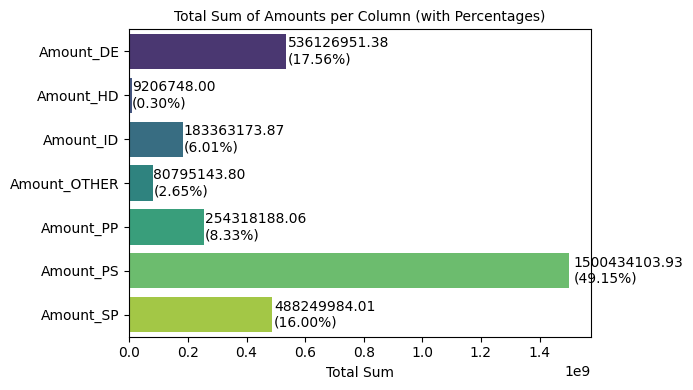

In [42]:
#Bar plot of amounts per business

# Define the amount columns
amount_columns = ['Amount_DE', 'Amount_HD', 'Amount_ID', 'Amount_OTHER', 'Amount_PP', 'Amount_PS', 'Amount_SP']

# Calculate the total sum for each column
sum_data = {col: df_cleaned[col].sum() for col in amount_columns}

# Calculate total sum for percentages
total_sum = sum(sum_data.values())

# Create the bar plot with switched axes
plt.figure(figsize=(7, 4))
sns.barplot(y=list(sum_data.keys()), x=list(sum_data.values()), palette='viridis', orient='h')

# Add annotations beside the bars
for i, (col, value) in enumerate(sum_data.items()):
    percentage = (value / total_sum) * 100
    plt.text(value + value * 0.01, i, f'{value:.2f}\n({percentage:.2f}%)', va='center', ha='left', fontsize=10)

# Customize the plot
plt.title('Total Sum of Amounts per Column (with Percentages)', fontsize=10)
# plt.ylabel('Amount Columns', fontsize=12)
plt.xlabel('Total Sum', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


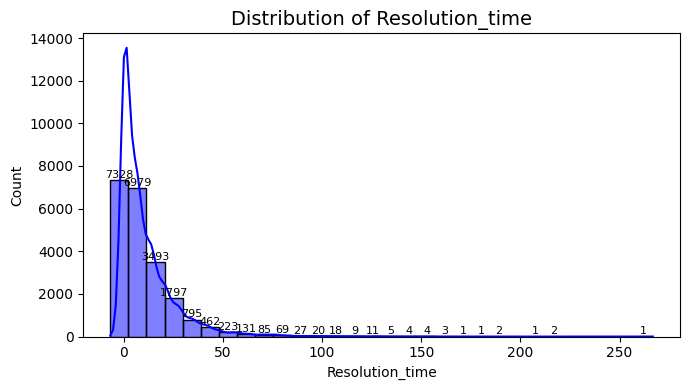

In [43]:
# Histograms for Resolution_time

# Columns to visualize
time_columns = ['Resolution_time']

# Loop through each column and create a histogram
for col in time_columns:
    plt.figure(figsize=(7, 4))  # Set figure size
    histplot = sns.histplot(
        data=df_cleaned,
        x=col,
        bins=30,  # Adjust the number of bins for clarity
        kde=True,  # Overlay Kernel Density Estimate
        color='blue'
    )
    
    # Add numbers above each bar
    for patch in histplot.patches:
        height = patch.get_height()
        if height > 0:  # Display numbers only if the bar height is greater than 0
            plt.text(
                patch.get_x() + patch.get_width() / 2,  # x-coordinate: center of the bar
                height + 100,  # y-coordinate: just above the bar
                f'{int(height)}',  # Display count as integer
                ha='center',  # Center alignment
                fontsize=8,  # Font size for numbers
                color='black'  # Text color
            )

    # Add titles and labels
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=10)
    # plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()


In [44]:
#Histogram table for 'Resolution_time'

# Columns to analyze
time_columns = ['Resolution_time']

# Loop through each column to calculate and display histogram data in a table
for col in time_columns:
    # Define the bins
    bins = np.histogram_bin_edges(df_cleaned[col].dropna(), bins=30)  # Use 30 bins for consistency
    hist, edges = np.histogram(df_cleaned[col].dropna(), bins=bins)  # Get frequencies and bin edges

    # Create a DataFrame to display results
    histogram_table = pd.DataFrame({
        'Bin Range': [f"[{edges[i]:.2f}, {edges[i + 1]:.2f})" for i in range(len(edges) - 1)],
        'Frequency': hist
    })

    # Add percentage column
    histogram_table['Percentage'] = (hist / hist.sum()) * 100

    # Display the table
    print(f"Histogram Data for {col}:")
    display(histogram_table)


Histogram Data for Resolution_time:


Bin Range  Frequency  Percentage
0      [-6.70, 2.42)       7328   34.129756
1      [2.42, 11.53)       6979   32.504308
2     [11.53, 20.65)       3493   16.268455
3     [20.65, 29.77)       1797    8.369429
4     [29.77, 38.88)        795    3.702669
5     [38.88, 48.00)        462    2.151740
6     [48.00, 57.12)        223    1.038610
7     [57.12, 66.23)        131    0.610125
8     [66.23, 75.35)         85    0.395883
9     [75.35, 84.47)         69    0.321364
10    [84.47, 93.58)         27    0.125751
11   [93.58, 102.70)         20    0.093149
12  [102.70, 111.82)         18    0.083834
13  [111.82, 120.93)          9    0.041917
14  [120.93, 130.05)         11    0.051232
15  [130.05, 139.17)          5    0.023287
16  [139.17, 148.28)          4    0.018630
17  [148.28, 157.40)          4    0.018630
18  [157.40, 166.52)          3    0.013972
19  [166.52, 175.63)          1    0.004657
20  [175.63, 184.75)          1    0.004657
21  [184.75, 193.87)          2    0.009315
22  [193.87, 202.98)          0    0.000000
23  [202.98, 212.10)          1    0.004657
24  [212.10, 221.22)          2    0.009315
25  [221.22, 230.33)          0    0.000000
26  [230.33, 239.45)          0    0.000000
27  [239.45, 248.57)          0    0.000000
28  [248.57, 257.68)          0    0.000000
29  [257.68, 266.80)          1    0.004657

## 2. Categorical columns

In [45]:
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Frequency table for each categorical column
for col in categorical_columns:
    print(f"Frequency Table for {col}:")
    freq_table = df_cleaned[col].value_counts()
    freq_table_percentage = df_cleaned[col].value_counts(normalize=True) * 100
    freq_table_combined = pd.DataFrame({
        'Count': freq_table,
        'Percentage': freq_table_percentage
    })
    print(freq_table_combined)
    print("------")

Frequency Table for Result_offer:
              Count  Percentage
Result_offer                   
Won            8079   37.627498
Pipeline       7203   33.547576
Lost           6189   28.824927
------
Frequency Table for SR_codigo:
            Count  Percentage
SR_codigo                    
SR-2468496      1    0.004657
SR-3232922      1    0.004657
SR-3232886      1    0.004657
SR-3232877      1    0.004657
SR-3232856      1    0.004657
...           ...         ...
SR-2859785      1    0.004657
SR-2859672      1    0.004657
SR-2859602      1    0.004657
SR-2859560      1    0.004657
SR-3603452      1    0.004657

[21471 rows x 2 columns]
------
Frequency Table for Bid_Notbid:
                 Count  Percentage
Bid_Notbid                        
Bid              19746   91.965908
Not_bid           1504    7.004797
Not_decided_yet    221    1.029295
------
Frequency Table for Client_type:
                                 Count  Percentage
Client_type                                    

/var/folders/7p/yc1lsycx5vx8zxzbhm_81gy40000gn/T/ipykernel_84539/2330739803.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


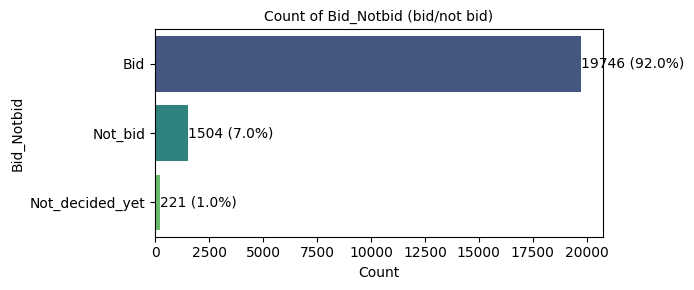

In [46]:
# Plot frequency of Bid_Notbid

# Calculate the total number of rows for percentage calculation
total = len(df_cleaned)

# Create the bar plot
plt.figure(figsize=(7, 3))
sns.countplot(
    y='Bid_Notbid',
    data=df_cleaned,
    order=df_cleaned['Bid_Notbid'].value_counts().index,
    palette="viridis"
)

# Add annotations for count and percentage
for i, (value, category) in enumerate(zip(df_cleaned['Bid_Notbid'].value_counts(), df_cleaned['Bid_Notbid'].value_counts().index)):
    percentage = (value / total) * 100
    plt.text(
        value,  # Position slightly to the left of the end of the bar
        i,      # Vertical position of the bar
        f'{value} ({percentage:.1f}%)',
        va='center', fontsize=10, color='black'
    )

# Customize title and labels
plt.title('Count of Bid_Notbid (bid/not bid)', fontsize=10)
plt.xlabel('Count', fontsize=10)
# plt.ylabel('Bid_Notbid', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/7p/yc1lsycx5vx8zxzbhm_81gy40000gn/T/ipykernel_84539/2203463260.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


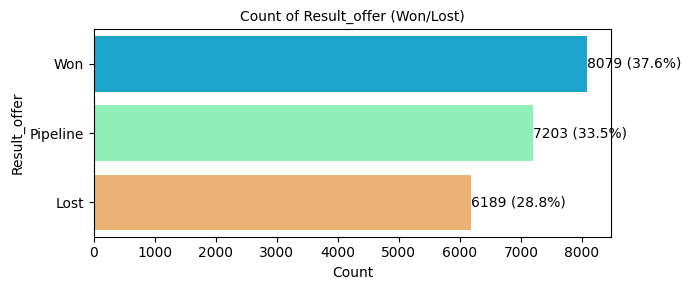

In [47]:
# Plot frequency of Result_offer (Won/Lost)

# Calculate the total number of rows for percentage calculation
total = len(df_cleaned)

# Create the bar plot
plt.figure(figsize=(7, 3))
sns.countplot(
    y='Result_offer',
    data=df_cleaned,
    order=df_cleaned['Result_offer'].value_counts().index,
    palette="rainbow"
)

# Add annotations for count and percentage
for i, (value, category) in enumerate(zip(df_cleaned['Result_offer'].value_counts(), df_cleaned['Result_offer'].value_counts().index)):
    percentage = (value / total) * 100
    plt.text(
        value,  # Position slightly to the left of the end of the bar
        i,      # Vertical position of the bar
        f'{value} ({percentage:.1f}%)',
        va='center', fontsize=10, color='black'
    )

# Customize title and labels
plt.title('Count of Result_offer (Won/Lost)', fontsize=10)
plt.xlabel('Count', fontsize=10)
# plt.ylabel('Bid_Notbid', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/7p/yc1lsycx5vx8zxzbhm_81gy40000gn/T/ipykernel_84539/290034442.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


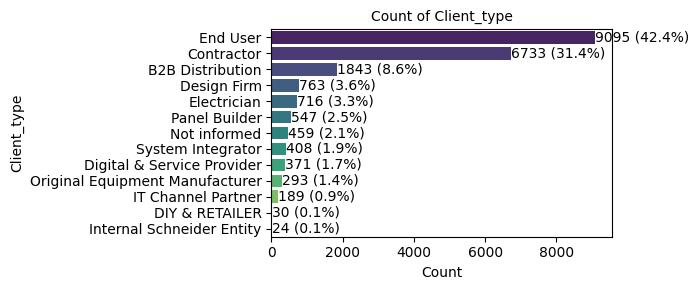

In [48]:
# Plot frequency of Client_type (Client type)

# Calculate the total number of rows for percentage calculation
total = len(df_cleaned)

# Create the bar plot
plt.figure(figsize=(7, 3))
sns.countplot(
    y='Client_type',
    data=df_cleaned,
    order=df_cleaned['Client_type'].value_counts().index,
    palette="viridis"
)

# Add annotations for count and percentage
for i, (value, category) in enumerate(zip(df_cleaned['Client_type'].value_counts(), df_cleaned['Client_type'].value_counts().index)):
    percentage = (value / total) * 100
    plt.text(
        value,  # Position slightly to the left of the end of the bar
        i,      # Vertical position of the bar
        f'{value} ({percentage:.1f}%)',
        va='center', fontsize=10, color='black'
    )

# Customize title and labels
plt.title('Count of Client_type', fontsize=10)
plt.xlabel('Count', fontsize=10)
# plt.ylabel('Bid_Notbid', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


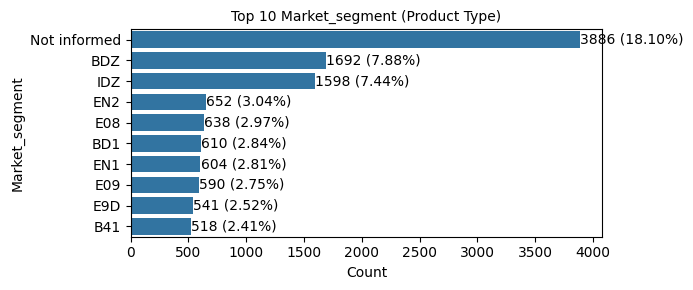

In [49]:
# Plot frequency of Market_segment (Type of products) - TOP 10

# Calculate the total number of rows for percentage calculation
total = len(df_cleaned)

# Get the top 10 categories in 'Market_segment'
top_10_segments = df_cleaned['Market_segment'].value_counts().head(10)

# Create the bar plot
plt.figure(figsize=(7, 3))
sns.barplot(
    y=top_10_segments.index,
    x=top_10_segments.values,
    # palette="viridis"
)

# Add annotations for count and percentage
for i, (value, category) in enumerate(zip(top_10_segments.values, top_10_segments.index)):
    percentage = (value / total) * 100
    plt.text(
        value + 0.5,  # Position slightly to the right of the bar
        i,            # Vertical position of the bar
        f'{value} ({percentage:.2f}%)',  # Use 2 decimal places for percentage
        va='center', fontsize=10, color='black'
    )

# Customize title and labels
plt.title('Top 10 Market_segment (Product Type)', fontsize=10)
plt.xlabel('Count', fontsize=10)
# plt.ylabel('Market Segment', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/7p/yc1lsycx5vx8zxzbhm_81gy40000gn/T/ipykernel_84539/1045486451.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


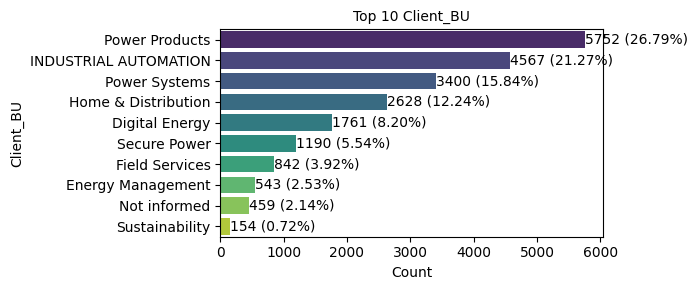

Frequency Table:
                       Count  Percentage
Client_BU                               
Power Products          5752   26.789623
INDUSTRIAL AUTOMATION   4567   21.270551
Power Systems           3400   15.835313
Home & Distribution     2628   12.239765
Digital Energy          1761    8.201761
Secure Power            1190    5.542359
Field Services           842    3.921569
Energy Management        543    2.528993
Not informed             459    2.137767
Sustainability           154    0.717247
IND AUT  Ops              60    0.279447
SP Field Services         47    0.218900
Power Systems FS          27    0.125751
Digital Power FS          17    0.079177
Process Automation        12    0.055889
Solar                     10    0.046574
IA Operations FS           2    0.009315


In [50]:
# Plot frequency of Client_BU (Client BU) - TOP 10

# Calculate the total number of rows for percentage calculation
total = len(df_cleaned)

# Get the top 10 categories in 'Market_segment'
top_10_acc_bu = df_cleaned['Client_BU'].value_counts().head(10)

# Create the bar plot
plt.figure(figsize=(7, 3))
sns.barplot(
    y=top_10_acc_bu.index,
    x=top_10_acc_bu.values,
    palette="viridis"
)

# Add annotations for count and percentage
for i, (value, category) in enumerate(zip(top_10_acc_bu, top_10_acc_bu.index)):
    percentage = (value / total) * 100
    plt.text(
        value + 0.5,  # Position slightly to the right of the bar
        i,            # Vertical position of the bar
        f'{value} ({percentage:.2f}%)',  # Use 2 decimal places for percentage
        va='center', fontsize=10, color='black'
    )

# Customize title and labels
plt.title('Top 10 Client_BU', fontsize=10)
plt.xlabel('Count', fontsize=10)
# plt.ylabel('Market Segment', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


print(f"Frequency Table:")
# Combine counts and percentages into a DataFrame
freq_table_acc_bu = df_cleaned['Client_BU'].value_counts()
freq_table_acc_bu_percentage = df_cleaned['Client_BU'].value_counts(normalize=True) * 100

# Create a combined frequency table
freq_table_acc_bu_combined = pd.DataFrame({
    'Count': freq_table_acc_bu,
    'Percentage': freq_table_acc_bu_percentage
})

# Display the frequency table
print(freq_table_acc_bu_combined)

/var/folders/7p/yc1lsycx5vx8zxzbhm_81gy40000gn/T/ipykernel_84539/2110427508.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


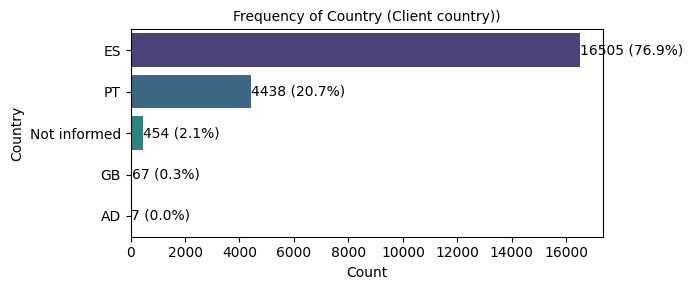

In [51]:
# Plot frequency of Country (Client country)

# Calculate the total number of rows for percentage calculation
total = len(df_cleaned)

# Create the bar plot
plt.figure(figsize=(7, 3))
sns.countplot(
    y='Country',
    data=df_cleaned,
    order=df_cleaned['Country'].value_counts().index,
    palette="viridis"
)

# Add annotations for count and percentage
for i, (value, category) in enumerate(zip(df_cleaned['Country'].value_counts(), df_cleaned['Country'].value_counts().index)):
    percentage = (value / total) * 100
    plt.text(
        value,  # Position slightly to the left of the end of the bar
        i,      # Vertical position of the bar
        f'{value} ({percentage:.1f}%)',
        va='center', fontsize=10, color='black'
    )

# Customize title and labels
plt.title('Frequency of Country (Client country))', fontsize=10)
plt.xlabel('Count', fontsize=10)
# plt.ylabel('Bid_Notbid', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/7p/yc1lsycx5vx8zxzbhm_81gy40000gn/T/ipykernel_84539/1055460685.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


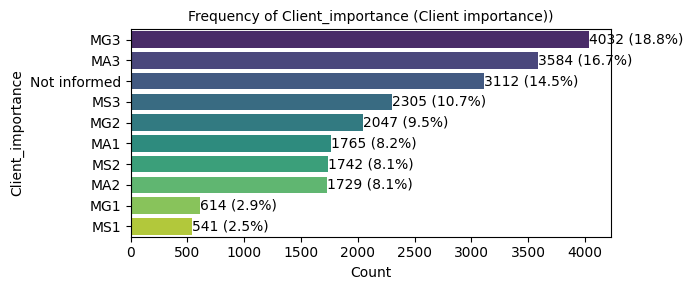

In [52]:
# Plot frequency of Client_importance (Client profile importance)

# Calculate the total number of rows for percentage calculation
total = len(df_cleaned)

# Create the bar plot
plt.figure(figsize=(7, 3))
sns.countplot(
    y='Client_importance',
    data=df_cleaned,
    order=df_cleaned['Client_importance'].value_counts().index,
    palette="viridis"
)

# Add annotations for count and percentage
for i, (value, category) in enumerate(zip(df_cleaned['Client_importance'].value_counts(), df_cleaned['Client_importance'].value_counts().index)):
    percentage = (value / total) * 100
    plt.text(
        value,  # Position slightly to the left of the end of the bar
        i,      # Vertical position of the bar
        f'{value} ({percentage:.1f}%)',
        va='center', fontsize=10, color='black'
    )

# Customize title and labels
plt.title('Frequency of Client_importance (Client importance))', fontsize=10)
plt.xlabel('Count', fontsize=10)
# plt.ylabel('Bid_Notbid', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/7p/yc1lsycx5vx8zxzbhm_81gy40000gn/T/ipykernel_84539/2102391375.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


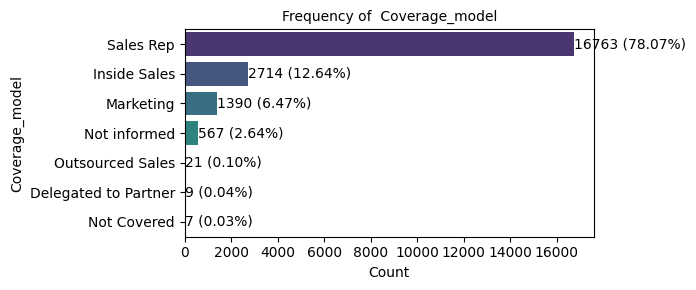

In [53]:
# Plot frequency of  Coverage_model

# Calculate the total number of rows for percentage calculation
total = len(df_cleaned)

# Create the bar plot
plt.figure(figsize=(7, 3))
sns.countplot(
    y='Coverage_model',
    data=df_cleaned,
    order=df_cleaned['Coverage_model'].value_counts().index,
    palette="viridis"
)

# Add annotations for count and percentage
for i, (value, category) in enumerate(zip(df_cleaned['Coverage_model'].value_counts(), df_cleaned['Coverage_model'].value_counts().index)):
    percentage = (value / total) * 100
    plt.text(
        value,  # Position slightly to the left of the end of the bar
        i,      # Vertical position of the bar
        f'{value} ({percentage:.2f}%)',
        va='center', fontsize=10, color='black'
    )

# Customize title and labels
plt.title('Frequency of  Coverage_model', fontsize=10)
plt.xlabel('Count', fontsize=10)
# plt.ylabel('Bid_Notbid', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


# VI. Multivariate analysis
●	Multivariate analysis (tables, plots) extraction of simple conclusions.
●	Consider target variables for the multivariate but also other variables
    - Target variable: Bid/Not bid
    - Target variable: Won/Lost

## General dataset

### 1. Bid_Notbid vs Result_offer

Crosstab of Bid_Notbid and Result_offer (%):
Result_offer          Lost   Pipeline        Won
Bid_Notbid                                      
Bid              27.418211  32.811709  39.770080
Not_bid          51.396277  33.643617  14.960106
Not_decided_yet   0.904977  98.642534   0.452489


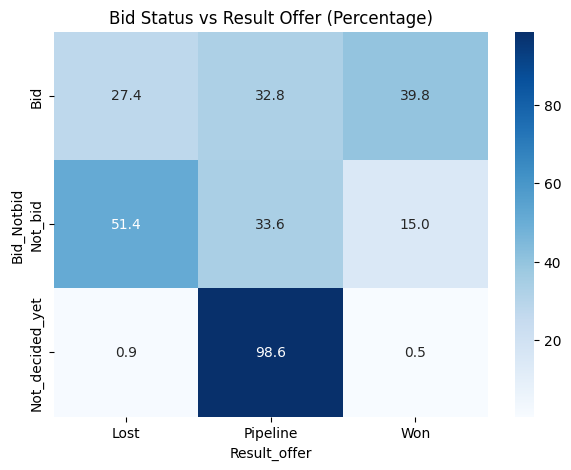

In [54]:
# Crosstab of Bid_Notbid and Result_offer
bid_offer_crosstab = pd.crosstab(df_cleaned['Bid_Notbid'], df_cleaned['Result_offer'], normalize='index') * 100
print("Crosstab of Bid_Notbid and Result_offer (%):")
print(bid_offer_crosstab)

# Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(bid_offer_crosstab, annot=True, fmt=".1f", cmap="Blues")
plt.title('Bid Status vs Result Offer (Percentage)')
plt.ylabel('Bid_Notbid')
plt.xlabel('Result_offer')
plt.show()


**Analysis** 

* "Not decided yet" bids:
    98.3% of the bids are in the "Pipeline" stage. This indicates that bids in this status overwhelmingly remain undecided or in progress, with minimal movement to other outcomes like "Lost" or "Won."

* "Completed" bids:
    39.7% "Won" -  success rate of completed bids.
    33.0% - still in "Pipeline"
    27.4% "Lost" - more than a 1/4 of completed bids fail

* "Rejected" bids:
    51.3% "Lost" - which is expected since rejected bids are likely unsuccessful.
    33.7% "Pipeline" - which may represent bids that are not entirely ruled out but are less likely to succeed.
    15.0% "Won" -  This suggests that even rejected bids can occasionally convert to wins. Bidding process could be improved to ensure similar cases are bid in the future.


**Insights**
* Improve bidding process:
    - Despite being "Rejected," 15% of these bids eventually result in a "Won" outcome.
    - This suggests an opportunity to revisit rejected bids to identify potential salvageable opportunities, or minimize losing similar opportunities (not bid)

**Internal comment**
    - Analyze factors that lead to "Won" or "Lost" stages can help improve the strategy for prioritizing the bids,  improve success rates and reduce lost opportunities.

### 2. Amount Summary by Result_offer Result_offer per BU Amount

Amount Summary by Result_offer (Null Amounts):
                  Amount_DE                Amount_HD               Amount_ID             Amount_OTHER                 Amount_PP                Amount_PS               Amount_SP             Total_Amount          
                       mean     median          mean    median          mean    median           mean      median          mean    median           mean    median          mean    median           mean    median
Result_offer                                                                                                                                                                                                       
Lost           61938.602435  15000.000  18575.392872  3826.596  75895.533026  6477.000   80086.546341  15075.0000  44363.760180  2998.584  135033.945455  13990.05  3.103585e+05  105000.0  115899.143363  7500.000
Pipeline      125722.352728   8132.676  34010.228930  7643.283  61495.417541  6203.304  668303.422021  45

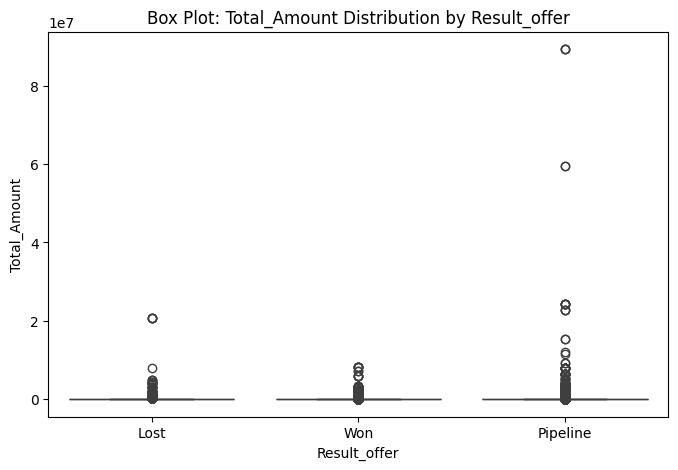

In [55]:
# Aggregate mean and median values for each amount column, differentiated by Result_offer (Null Amounts)
amount_summary = df_cleaned_nullamounts.groupby('Result_offer')[['Amount_DE', 'Amount_HD', 'Amount_ID', 
                                                     'Amount_OTHER', 'Amount_PP', 'Amount_PS', 'Amount_SP', 'Total_Amount']].agg(['mean', 'median'])

with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print("Amount Summary by Result_offer (Null Amounts):")
    print(amount_summary)

# Boxplot to visualize

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x='Result_offer', y='Total_Amount')
plt.title('Box Plot: Total_Amount Distribution by Result_offer')
plt.show()


*Analysis*
**Box-plot analysis**
* Outliers: 
   - All categories have significant outliers, with the "Pipeline" category showing the most extreme values (up to 10^7). This indicates that some bids in the "Pipeline" stage involve extraordinarily high amounts.

* Spread of Data:
   - The dense box near the bottom of the plot shows that the majority of values for all three categories are clustered near the lower range.

* Median Values:
   - The median (line within the box) is relatively close to the lower quartile for all categories, indicating skewness in the distributions.
   Median values are lowest for the "Lost" category, followed by "Won" and then "Pipeline.

**Mean-median analysis**
* Outliers:
   - Across all Result_offer categories, the mean is consistently higher than the median for every column. This strongly suggests that the data contains significant outliers or skewed distributions.
   - The Pipeline category has the largest discrepancies -> it contains the most extreme values.
   - Outliers were also analyzed in prior Histograms and Box Plots per Amount columns, where we confirmed the presence of outliers. The outliers will be kept in the dataset because they provide relevant information for our future ML classification model.

* Differences Between Categories:
   - "Pipeline" consistently has the highest mean and median values, especially for Amount_SP, suggesting that this category has a higher concentration of large amounts.
   - "Won" has lower means and medians compared to Pipeline, but it still contains some large values.
   - "Lost" has the lowest means and medians overall, indicating this category typically involves smaller amounts.

* Amount_SP Dominates:
   - Amount_SP shows the largest values (both mean and median) across all Result_offer categories, particularly in the Pipeline category. It is likely the most influential column when assessing total amounts.

*Insights*

- The "Pipeline" stage seems to represent bids with high variability and potentially larger financial impact.
- The "Lost" stage generally has lower Total_Amount, possibly indicating a trend where lower-value bids are less likely to succeed.
- Strategies could focus on managing the high variability in the "Pipeline" stage to predict outcomes better.

Summary of Total_Amount by Result_offer:
              Standard Deviation           Mean  Coefficient of Variation (CV)
Result_offer                                                                  
Lost                6.155086e+05  115786.783554                       5.315879
Pipeline            2.335405e+06  238055.900607                       9.810322
Won                 4.167924e+05   76887.391704                       5.420815


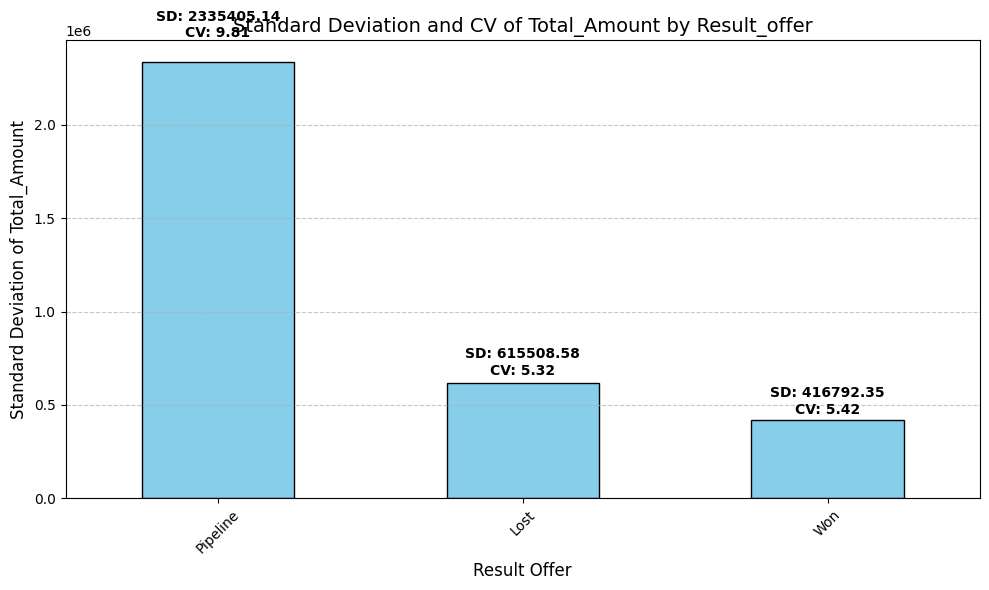

In [56]:
#Standard deviation, Coefficient of Variation and Mean of Total_Amount by Result offer

# Group by Result_offer to compute standard deviation and mean
grouped_data = df_cleaned.groupby('Result_offer')['Total_Amount']
std_deviation = grouped_data.std()
mean_values = grouped_data.mean()

# Compute coefficient of variation (CV)
cv_values = std_deviation / mean_values

# Combine metrics into a DataFrame for display
summary_df = pd.DataFrame({
    'Standard Deviation': std_deviation,
    'Mean': mean_values,
    'Coefficient of Variation (CV)': cv_values
})

# Display the summary table
print("Summary of Total_Amount by Result_offer:")
print(summary_df)

# Plotting standard deviation with CV annotations
plt.figure(figsize=(10, 6))
ax = std_deviation.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Add annotations for standard deviation and CV
# Create a mapping of bar positions to category labels
categories = std_deviation.sort_values(ascending=False).index  # Sorted categories
positions = range(len(categories))  # Positions of the bars
category_map = dict(zip(positions, categories))  # Map position to category

for bar, position in zip(ax.patches, positions):
    height = bar.get_height()  # Standard deviation value
    category = category_map[position]  # Map the position to the category
    cv = cv_values.loc[category]  # Retrieve CV value for the category

    # Annotate standard deviation and CV
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 0.05 * height, 
        f'SD: {height:.2f}\nCV: {cv:.2f}',  # Standard deviation and CV
        ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
    )

# Add plot labels and title
plt.title('Standard Deviation and CV of Total_Amount by Result_offer', fontsize=14)
plt.xlabel('Result Offer', fontsize=12)
plt.ylabel('Standard Deviation of Total_Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()



**Analysis**

1. Standard Deviation. Standard deviation (SD) measures the spread or dispersion of data around the mean.
    - Pipeline: Has the largest standard deviation (2,335,405.14), indicating extremely high variability in the Total_Amount for bids in the "Pipeline" stage. This suggests that some bids in this stage have extremely high or low Total_Amount values.
    - Lost: The SD is 615,508.58, smaller than "Pipeline" but still substantial, showing moderate variability in the amounts for "Lost" bids.
    - Won: The SD is the smallest at 416,792.35, indicating that the Total_Amount for "Won" bids is the least variable compared to the other categories

2. Mean.
    - Pipeline: The mean (238,055.90) is the highest among the categories, suggesting that "Pipeline" bids typically involve larger amounts.
    - Lost: The mean (115,786.78) is much lower than "Pipeline", indicating smaller bid amounts for "Lost" bids.
    - Won: The mean (76,887.39) is the lowest, showing that successful bids ("Won") tend to involve the smallest amounts on average.

3. Coefficient of Variation (CV). CV measures the relative spread (standard deviation divided by the mean). It’s useful for comparing variability across groups with different scales of means.
    - Pipeline: Has the highest CV (9.81), indicating that the relative variability is very high in this category. This suggests that Total_Amount values for "Pipeline" are highly inconsistent, with both extremely high and low values relative to the mean.
    - Lost: CV (5.32) is moderately high, showing that variability is significant, but less so than for "Pipeline".
    - Won: CV (5.42) is slightly higher than "Lost", indicating that while the "Won" category has lower SD, its relative variability compared to the mean is still considerable.

- "Pipeline" stands out with the highest SD and CV, indicating a very wide spread of bid amounts.
- Both "Lost" and "Won" have significantly smaller SD values, suggesting more consistent bid amounts in these categories.


**Insights**
* Pipeline Variability: 
    - The "Pipeline" stage shows the greatest variability in Total_Amount (both absolute and relative). This could indicate inconsistent or unpredictable bid amounts at this stage.
* Lost vs. Won Bids: 
    - While the "Lost" and "Won" categories have similar relative variability (CV), the "Lost" category involves higher bid amounts (mean) than "Won".
* Consistency in Successful Bids:
    - The "Won" category has the smallest standard deviation and the lowest mean, indicating that successful bids tend to be smaller and more consistent in size.


### 3. Result offer distribution by Client importance 

Proportions of Total_Amount by Client_importance:
Result_offer            Lost   Pipeline        Won
Client_importance                                 
MA1                36.985206  48.918856  14.095939
MA2                46.684194  24.806885  28.508921
MA3                30.845439  58.044073  11.110487
MG1                35.325362  46.756121  17.918517
MG2                61.237958  30.047975   8.714067
MG3                35.690084  43.828732  20.481185
MS1                34.731465  28.817794  36.450741
MS2                12.331374  58.010047  29.658579
MS3                14.032771  45.653104  40.314125
Not informed        7.724670  81.503302  10.772027


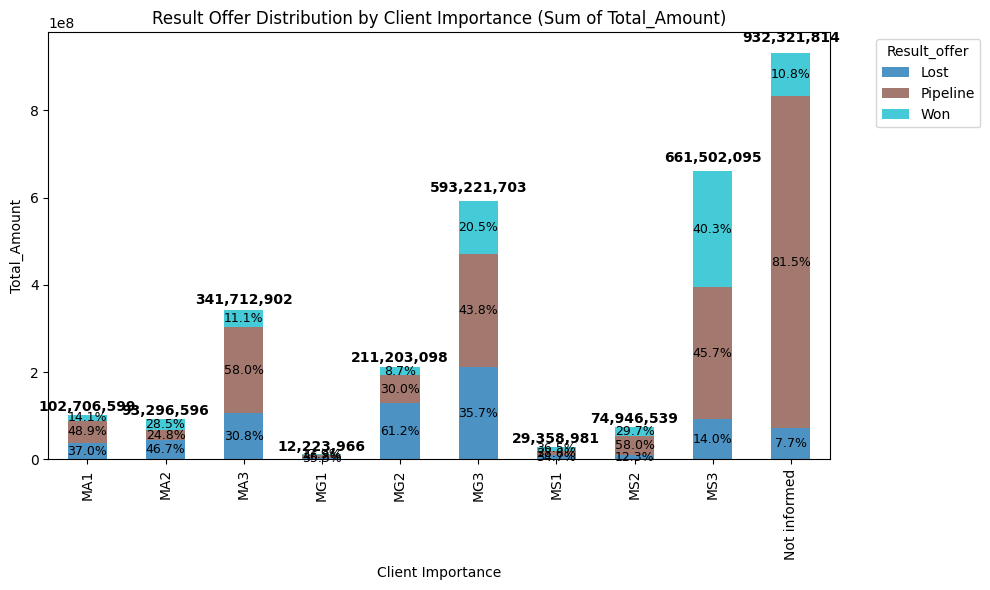

In [57]:
# Group data and calculate sum of Total_Amount
importance_offer = df_cleaned.groupby(['Client_importance', 'Result_offer'])['Total_Amount'].sum().unstack().fillna(0)

# Calculate proportions of Total_Amount by Client_importance
importance_offer_percent = (importance_offer.T / importance_offer.sum(axis=1)).T * 100

print("Proportions of Total_Amount by Client_importance:")
print(importance_offer_percent)

# Stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bars
bars = importance_offer.plot(kind='bar', stacked=True, figsize=(10, 6), ax=ax, alpha=0.8, cmap="tab10")

# Add annotations for each segment in the bars
for i, client_importance in enumerate(importance_offer.index):
    cumulative = 0  # Track cumulative height of stacked bars
    total_amount = importance_offer.loc[client_importance].sum()  # Total_Amount for this bar
    for result_offer in importance_offer.columns:
        percent = importance_offer_percent.loc[client_importance, result_offer]
        height = importance_offer.loc[client_importance, result_offer]
        if height > 0:
            # Annotate percentage inside the bar segment
            y_pos = cumulative + (height / 2)
            ax.text(
                i, y_pos, f"{percent:.1f}%", 
                ha='center', va='center', fontsize=9, color='black'
            )
        cumulative += height
    # Annotate Total_Amount on top of the bar
    ax.text(
        i, cumulative + 0.02 * cumulative, f"{total_amount:,.0f}",
        ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
    )

# Set plot labels and title
plt.title('Result Offer Distribution by Client Importance (Sum of Total_Amount)')
plt.ylabel('Total_Amount')
plt.xlabel('Client Importance')
plt.legend(title='Result_offer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Analysis**

1. Pipeline Dominance
    The "Pipeline" category makes up a significant portion of the Total_Amount in many client importance levels:
        Not informed: 81.5%
        MS3: 45.7%
        MG3: 43.8% 
    This suggests these categories represent ongoing opportunities that could significantly influence future results.
2. "Won" and "Lost" Proportions
    Categories with higher proportions of "Won":
        MS2: 58.0% - the highest success rate among all categories.
        MS3: 40.3%
    Categories with higher proportions of "Lost":
        MG2: 61.2% - the least successful category
        MA3: 58.0% 
3. Total Value by Category
    MS3 and MG3 are high-value categories, but the proportions of "Won" "Lost" and "Pipeline" differ significantly.
4. Small Contribution Categories
    MS1, MG1, and MA1` contribute relatively small total amounts compared to others. These categories are less significant in terms of overall impact.

### 6. Resolution time vs Total amount by Result Offer

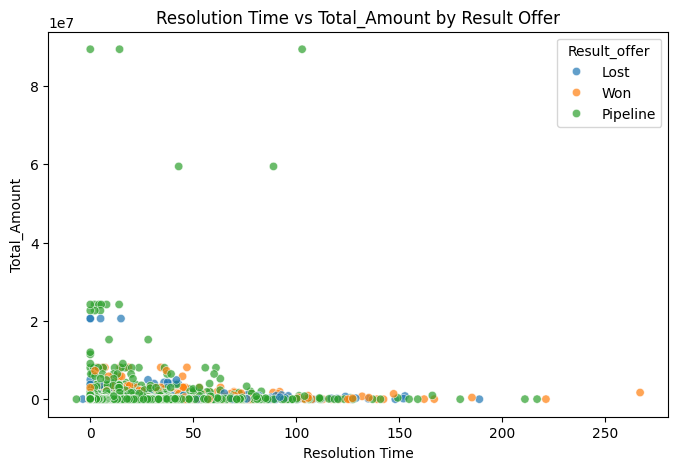

In [58]:
# Scatter plot of Resolution_time vs Total_Amount colored by Result_offer
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x='Resolution_time', y='Total_Amount', hue='Result_offer', alpha=0.7)
plt.title('Resolution Time vs Total_Amount by Result Offer')
plt.xlabel('Resolution Time')
plt.ylabel('Total_Amount')
plt.legend(title='Result_offer')
plt.show()


**Analysis**

- The Pipeline category (green points) shows a wider spread in both Resolution_time and Total_Amount compared to Won and Lost: High-value and long-resolution-time deals are more likely to remain in the Pipeline state. This suggests that high-value deals often take longer to resolve, potentially remaining undecided.

- "Won" (orange): More concentrated near the origin, suggesting that smaller deals resolved quickly are more likely to be successful.

- "Lost" (blue): Scattered more broadly in both Resolution_time and Total_Amount, indicating greater variability and a higher likelihood of losing larger or longer-duration deals.

### 7. Heatmap - Client type and Client importance

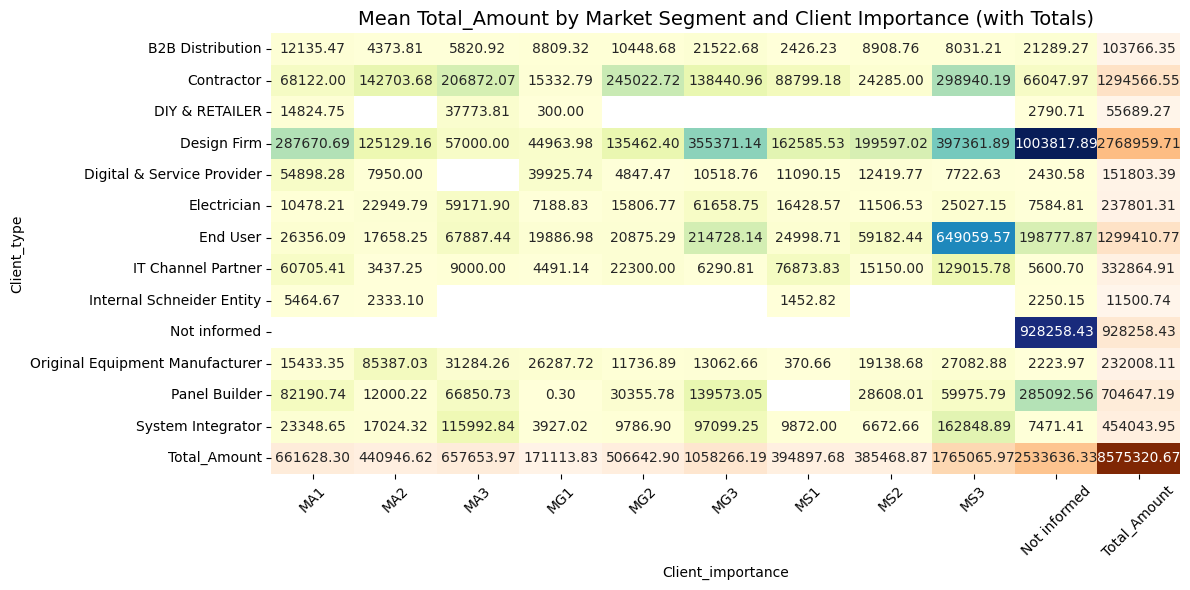

In [59]:
# Heatmap - Group by Client type and Client Importance

# Group by Client_type and Client_importance to compute mean Total_Amount
grouped_summary = df_cleaned.groupby(['Client_type', 'Client_importance'])['Total_Amount'].mean().unstack()

# Add a total column (sum across Client_importance for each Client_type)
grouped_summary['Total_Amount'] = grouped_summary.sum(axis=1)

# Add a total row (sum across Client_type for each Client_importance, including the total column)
grouped_summary.loc['Total_Amount'] = grouped_summary.sum(axis=0)

# Print the updated DataFrame
# print("Grouped Mean Total_Amount by Client Type and Client Importance (with Totals):")
# print(grouped_summary)

# Separate masks for main data and totals
main_mask = np.zeros_like(grouped_summary, dtype=bool)
main_mask[grouped_summary.index == 'Total_Amount', :] = True  # Mask total row
main_mask[:, grouped_summary.columns == 'Total_Amount'] = True  # Mask total column

total_mask = ~main_mask  # Inverse of the main mask to color only totals

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 6))

# Main data heatmap
sns.heatmap(
    grouped_summary,
    mask=main_mask,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar=False,
    ax=ax
)

# Overlay heatmap for totals
sns.heatmap(
    grouped_summary,
    mask=total_mask,
    annot=True,
    fmt=".2f",
    cmap="Oranges",  # Different colormap for totals
    cbar=False,
    ax=ax
)

# Titles and labels
plt.title('Mean Total_Amount by Market Segment and Client Importance (with Totals)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Analysis**
This heatmap provides a visual representation of the Mean Total_Amount across Client Importance and Client Type. 

* High-value Clients and Categories:
    - Design Firm: 
        - This client type shows significantly high mean amounts, especially under:
        - MA1 (287,670.69), MG3 (355,371.14), MS3 (397.361) and Not Completed (1,003,818.78).
    - End User: 
        - High values under MS3 (649,059.57) and Not Completed (198,777.87).
    - Contractor: 
        - High values under MA3, MG2, MS3

* Low-value Client Categories:
    - DIY & RETAILER and Digital & Service Provider generally contribute low mean amounts across all importance levels.
    - Internal Schneider Entity also contributes low values in most categories.

* Differences Across Client Importance Levels:
    - For high-value client types (e.g., Design Firm, Contractor): Higher client importance (e.g., MG3, MS3) correlates with higher mean total amounts.
    - Lower client importance (e.g., MA1, MA2) tends to yield lower mean amounts across client types.

* "Not Completed" Category:
    - For some client types (e.g., Design Firm, Panel Builder), the "Not Completed" category shows significantly high mean total amounts. 


**Insights**
* Focus on High-value Client Types:
    - Design Firm, End User, and Contractor, and Panel Builder are the most lucrative client types across multiple importance levels.

* Client Importance Correlation:
    - Higher client importance categories (e.g., MG3, MS3) are more lucrative. To be considered for prioritizing petitions from clients in these categories.

* Low-performing Categories:
    - To evaluate the strategy for DIY & RETAILER and Digital & Service Provider to determine why they contribute lower amounts and identify opportunities for growth.

### 8. Mean Total_amount by Market segment and Client importance

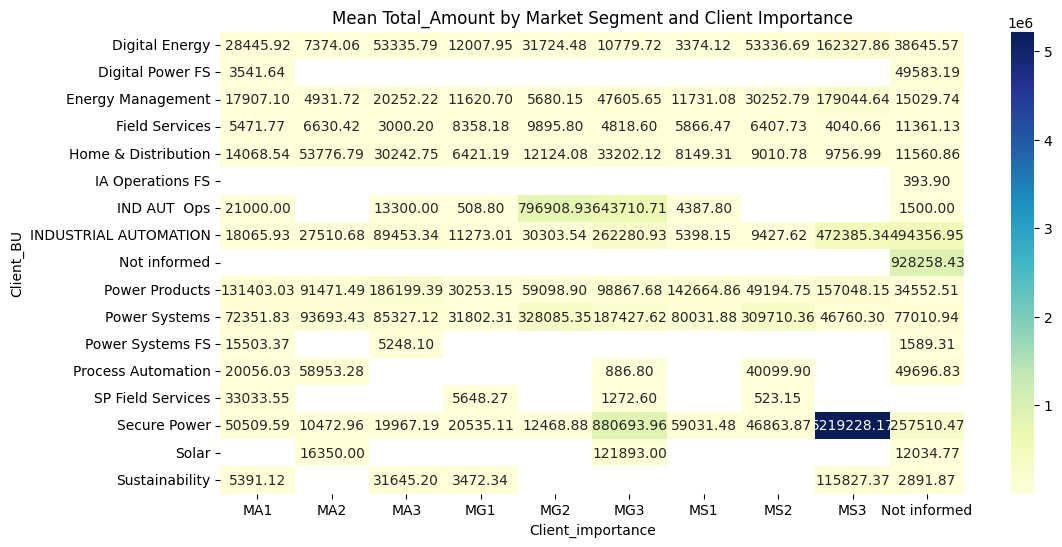

In [60]:
# Group by Client BU and Client Importance
grouped_summary = df_cleaned.groupby(['Client_BU', 'Client_importance'])['Total_Amount'].mean().unstack()

# print("Grouped Mean Total_Amount by Client BU and Client Importance:")
# print(grouped_summary)

# Heatmap for visualization
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Mean Total_Amount by Market Segment and Client Importance')
plt.show()


**Analysis**

* High-Value Client BUs:
    INDUSTRIAL AUTOMATION:
        This Client BU consistently has high mean total amounts across categories such as MG3 (472,385) and MS3 (494,357).
        Represents one of the most profitable Client BUs in high-importance categories.
    Secure Power:
        Exhibits extremely high mean values in MS3 (5,219,228) and MG3 (880,694).
        Secure Power clients in these categories are significant revenue drivers, indicating high priority.
    Power Systems:
        Strong performance in MG2 (328,085) and MG3 (187,428).
        Suggests strong relevance for these Client Importance levels, making Power Systems a top BU in profitability.
    Design Firm:
        Demonstrates exceptional values in MG2 (135,462), MG3 (355,371), and MS3 (397,362).
        Indicates a strategic opportunity for nurturing relationships with Design Firms in these categories.

* Lower-Value Client BUs:
    Field Services and Home & Distribution:
        These BUs exhibit consistently lower mean values, particularly in higher-priority categories such as MS3 and MG3.
        These may represent less strategic clients or lower transaction volumes.
    Digital Energy:
        Moderate mean values across all categories, but no standout high-value performance.
        Might be a stable but less critical contributor to total revenue.

* Client Importance Categories:
    MG3 and MS3:
        Across multiple BUs, these categories consistently exhibit the highest mean total amounts.
        Likely represent the most critical client importance levels, suggesting high business priority.
    MG2:
        Strong contributor to high mean values for BUs like Power Systems and INDUSTRIAL AUTOMATION, making it another key category.
    MA1, MA2, MA3:
        While some high mean amounts exist in these categories (e.g., Power Products in MA3), they are generally not as dominant as MG2, MG3, and MS3.


### 9. Mean total Amount by Client BU and Client type

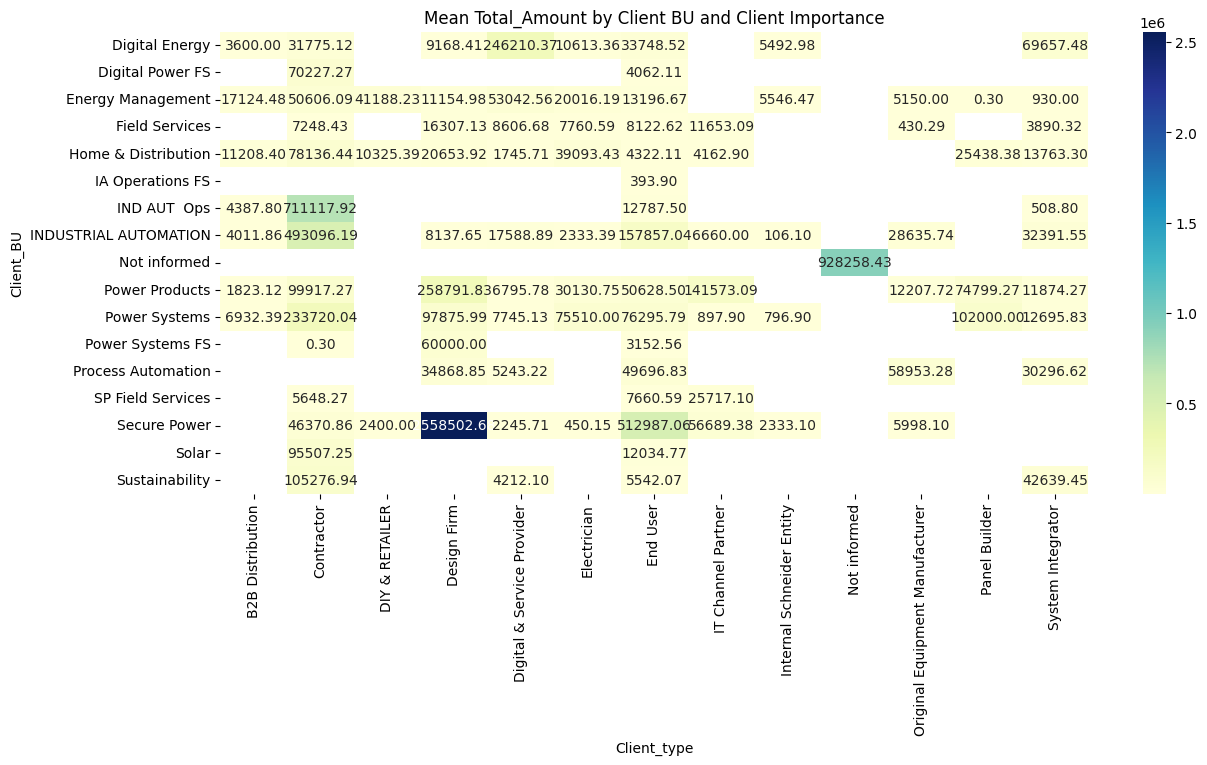

In [61]:
# Group by Client BU and Client type
grouped_summary = df_cleaned.groupby(['Client_BU', 'Client_type'])['Total_Amount'].mean().unstack()

# print("Grouped Mean Total_Amount by Client Type and Client Type:")
# print(grouped_summary)

# Heatmap for visualization
plt.figure(figsize=(14, 6))
sns.heatmap(grouped_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Mean Total_Amount by Client BU and Client Importance')
plt.show()


### 10. Barplot Mean Total amount by Market segment

/var/folders/7p/yc1lsycx5vx8zxzbhm_81gy40000gn/T/ipykernel_84539/4019939012.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


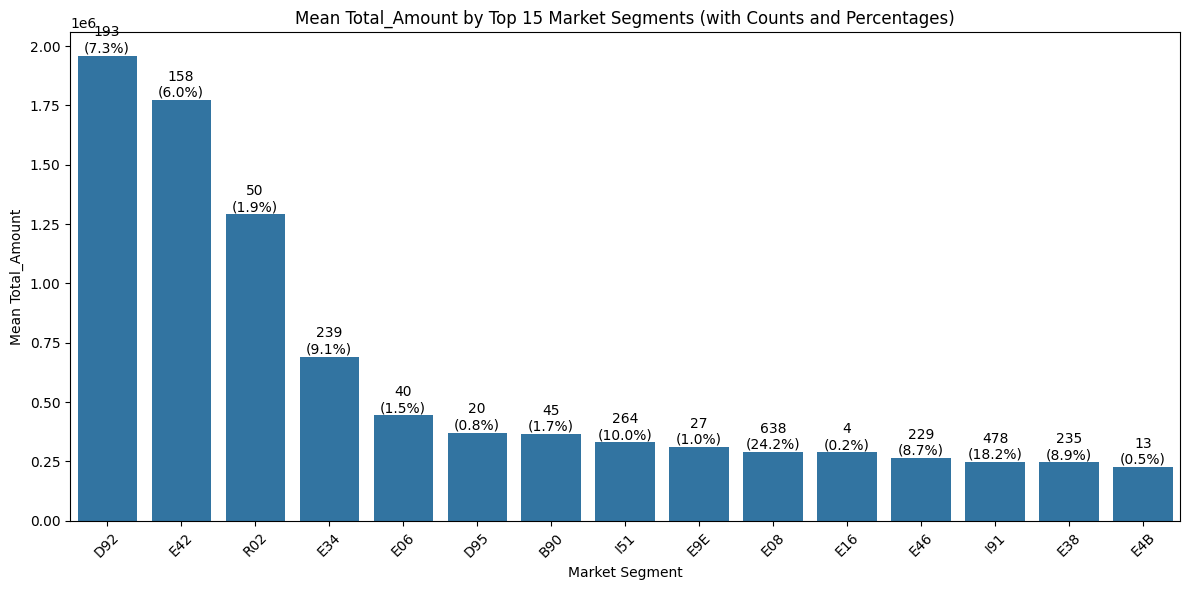

In [62]:
# Barplot for Mean Total_Amount by Market Segment (only top 15)

# Calculate mean Total_Amount for each Market Segment
top_segments = (
    df_cleaned.groupby('Market_segment')['Total_Amount']
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .index  # Get the top 15 segment names
)

# Filter the dataset to only include the top 15 Market Segments
df_top_segments = df_cleaned[df_cleaned['Market_segment'].isin(top_segments)]

# Calculate counts and percentages for the top 15 segments
market_segment_counts = df_top_segments['Market_segment'].value_counts()
total_count = market_segment_counts.sum()
market_segment_percentages = (market_segment_counts / total_count) * 100

# Create the barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_top_segments,
    x='Market_segment',
    y='Total_Amount',
    ci=None,
    estimator='mean',
    order=top_segments
)

# Annotate numbers and percentages on the bars
for bar, segment in zip(ax.patches, top_segments):
    count = market_segment_counts[segment]
    percent = market_segment_percentages[segment]
    # Annotate above the bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Center of the bar
        bar.get_height() + 5,              # Slightly above the bar
        f"{count}\n({percent:.1f}%)",      # Count and percentage
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Customize plot appearance
plt.title('Mean Total_Amount by Top 15 Market Segments (with Counts and Percentages)')
plt.xlabel('Market Segment')
plt.ylabel('Mean Total_Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 11. Mean Total_Amount by Client Type and Client Type

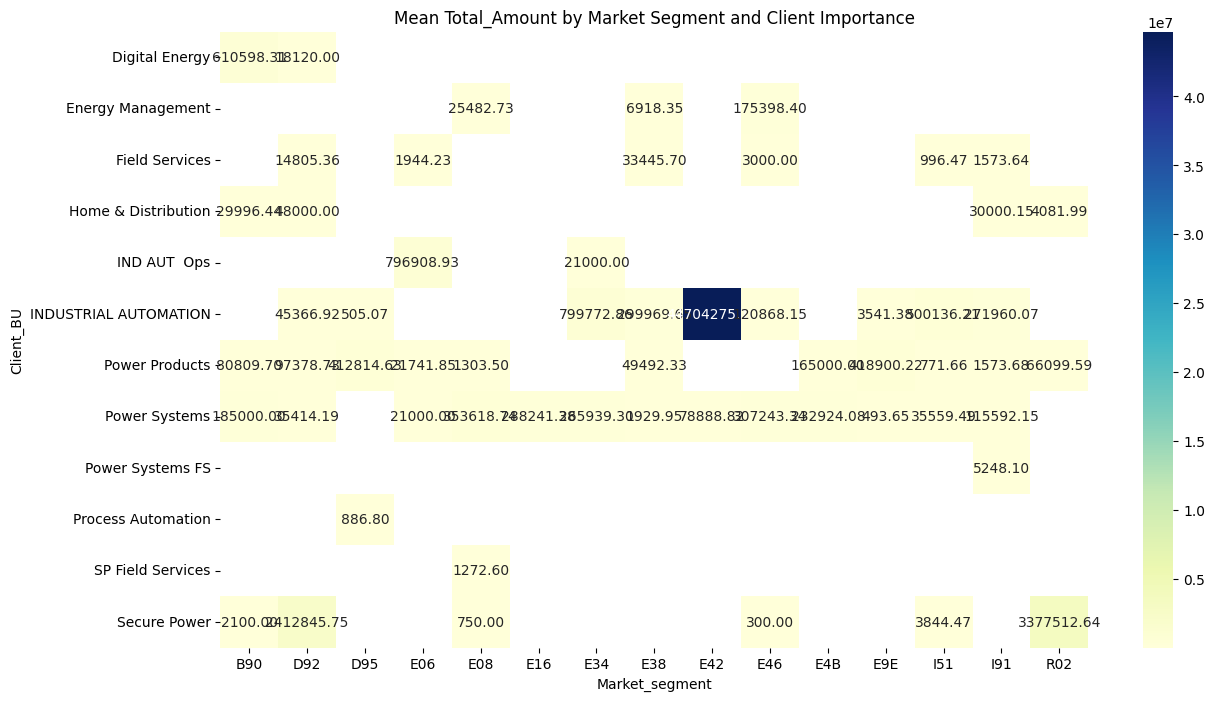

In [63]:
# Group by Client BU and Client type
grouped_summary = df_top_segments.groupby(['Client_BU', 'Market_segment'])['Total_Amount'].mean().unstack()

# print("Grouped Mean Total_Amount by Client Type and Client Type:")
# print(grouped_summary)

# Heatmap for visualization
plt.figure(figsize=(14, 8))
sns.heatmap(grouped_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Mean Total_Amount by Market Segment and Client Importance')
plt.show()



### 12. Number of offers by country and result offer

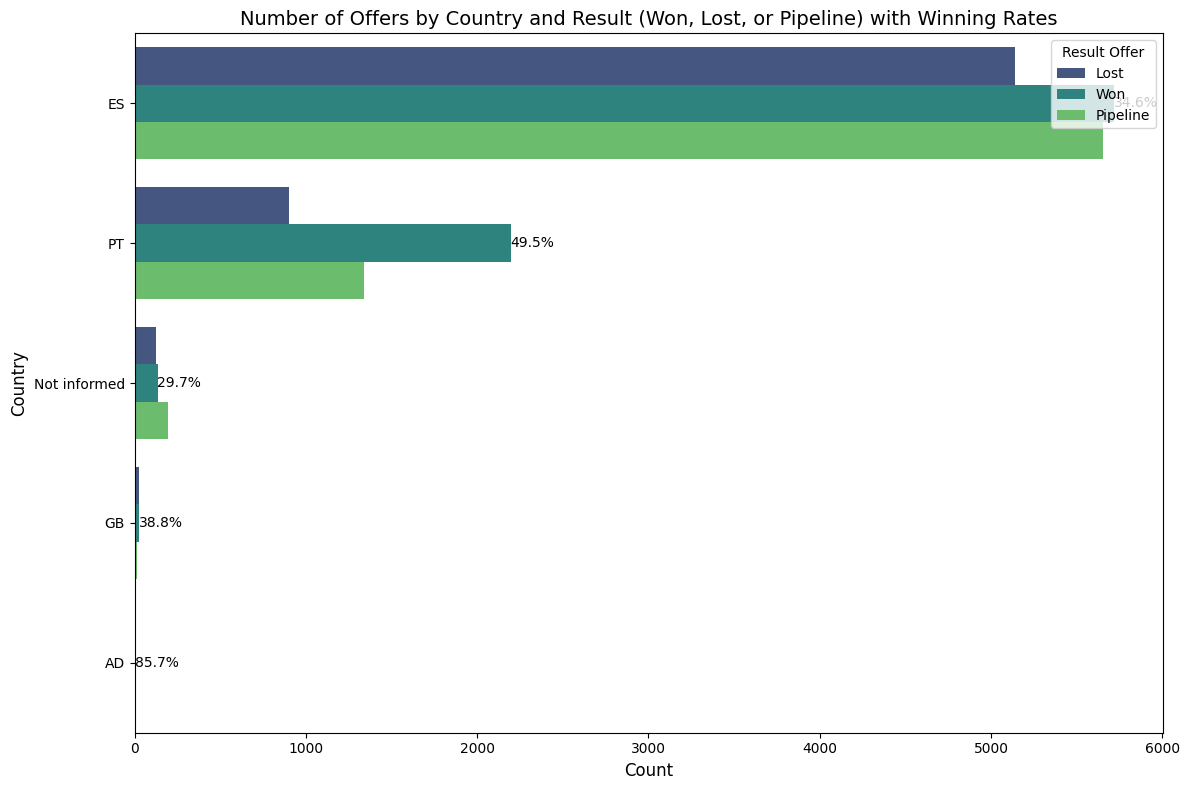

In [64]:
# Number of offers by country and result

# Assuming df_cleaned is already loaded with your dataset

# Group the data by Country and Result_offer and count occurrences
country_result_offer_counts = df_cleaned.groupby(['Country', 'Result_offer']).size().reset_index(name='Count')

# Calculate the total offers and winning rate for each country
country_totals = df_cleaned.groupby('Country').size()
country_wins = df_cleaned[df_cleaned['Result_offer'] == 'Won'].groupby('Country').size()
winning_rates = (country_wins / country_totals * 100).fillna(0)  # Winning rate as a percentage

# Merge winning rates into the grouped data
country_result_offer_counts['Winning Rate (%)'] = country_result_offer_counts['Country'].map(winning_rates)

# Create a bar plot to show the counts per Country and Result_offer
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=country_result_offer_counts,
    y='Country',
    x='Count',
    hue='Result_offer',
    palette="viridis",
    order=df_cleaned['Country'].value_counts().index
)

# Annotate winning rates next to the "Won" bars
for i, row in country_result_offer_counts.iterrows():
    if row['Result_offer'] == 'Won':
        plt.text(
            x=row['Count'] - 1,  # Position slightly to the right of the bar
            y=row['Country'],
            s=f"{row['Winning Rate (%)']:.1f}%",  # Winning rate formatted
            color="black", va="center"
        )

# Customize the title and labels
plt.title('Number of Offers by Country and Result (Won, Lost, or Pipeline) with Winning Rates', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title='Result Offer', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


## Target: Bid/Not_bid

In [65]:
# Filter the DataFrame where Bid_Notbid is 'Bid' or 'Not_bid'
df_cleaned_nullamounts_bidnotbid = df_cleaned_nullamounts[df_cleaned_nullamounts['Bid_Notbid'].isin(['Bid', 'Not_bid'])]

# Filter the DataFrame where Bid_Notbid is 'Not_bid'
df_cleaned_notbid = df_cleaned[df_cleaned['Bid_Notbid'].isin(['Not_bid'])]

### 1. Crosstab Bid_Notbid

Crosstab of Bid_Notbid and Result_offer (%):
Result_offer       Lost   Pipeline        Won
Bid_Notbid                                   
Bid           27.418211  32.811709  39.770080
Not_bid       51.396277  33.643617  14.960106


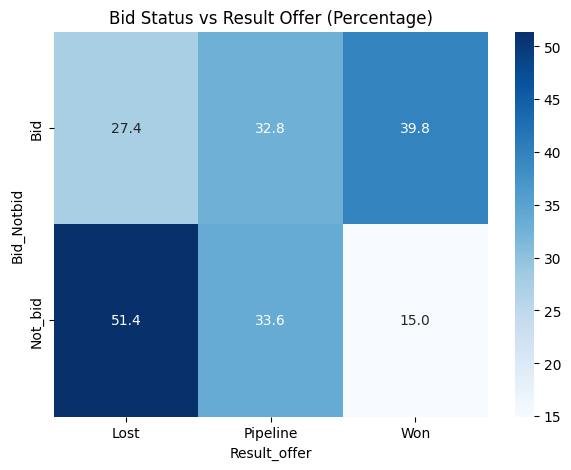

In [66]:
# Crosstab of Bid_Notbid and Result_offer
bid_offer_crosstab = pd.crosstab(df_cleaned_bidnotbid['Bid_Notbid'], df_cleaned_bidnotbid['Result_offer'], normalize='index') * 100
print("Crosstab of Bid_Notbid and Result_offer (%):")
print(bid_offer_crosstab)

# Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(bid_offer_crosstab, annot=True, fmt=".1f", cmap="Blues")
plt.title('Bid Status vs Result Offer (Percentage)')
plt.ylabel('Bid_Notbid')
plt.xlabel('Result_offer')
plt.show()

### 2. Distribution Bid_Notbid

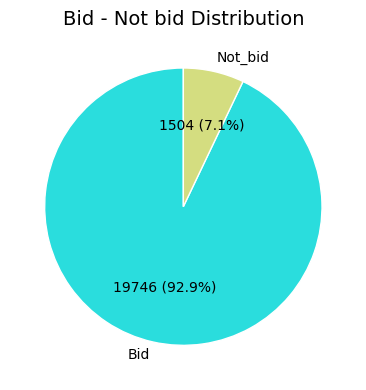

In [67]:

# Calculate the counts of Result_offer and the total number of rows
bid_notbid_counts = df_cleaned_bidnotbid['Bid_Notbid'].value_counts()
total = bid_notbid_counts.sum()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    bid_notbid_counts,
    labels=bid_notbid_counts.index,
    autopct=lambda p: f'{int(round(p * total / 100))} ({p:.1f}%)',
    startangle=90,
    colors=sns.color_palette("rainbow", len(bid_notbid_counts)),
    wedgeprops={'edgecolor': 'white'}
)

# Customize the title
plt.title('Bid - Not bid Distribution', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()


**Comments**
There's a large imbalance in the data for Not_bid cases.

### 3. Correlation matrix

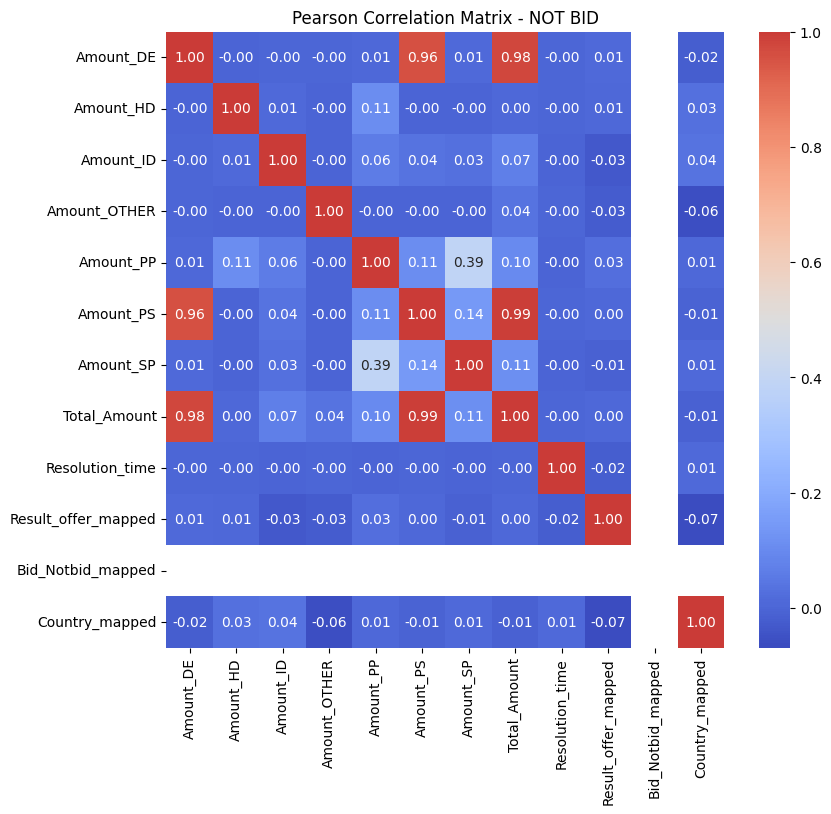


Strong Correlations:
         var1          var2  correlation
0  Amount_DE     Amount_PS     0.956528
1  Amount_DE  Total_Amount     0.976808
2  Amount_PS  Total_Amount     0.994057


In [68]:
# Correlation Matrix

numeric_cols = df_cleaned_notbid.select_dtypes(include=[np.number]).columns.tolist()

def analyze_correlations(df, method="pearson"):
    """Analyze and visualize correlations between variables"""
    # Calculate correlation matrix
    corr_matrix = df.corr(method=method)

    # Create heatmap
    plt.figure(figsize=(9, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", center=0.5)
    plt.title(f"{method.capitalize()} Correlation Matrix - NOT BID")
    plt.show()

    return corr_matrix

def identify_strong_correlations(corr_matrix, threshold):
    """Identify strong correlations above a threshold"""
    strong_corr = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                strong_corr.append(
                    {
                        "var1": corr_matrix.columns[i],
                        "var2": corr_matrix.columns[j],
                        "correlation": corr_matrix.iloc[i, j],
                    }
                )

    return pd.DataFrame(strong_corr)

# Analyze correlations
corr_matrix = analyze_correlations(df_cleaned_notbid[numeric_cols])
strong_correlations = identify_strong_correlations(corr_matrix, threshold=0.6)
print("\nStrong Correlations:\n", strong_correlations)

### 4. Client importance

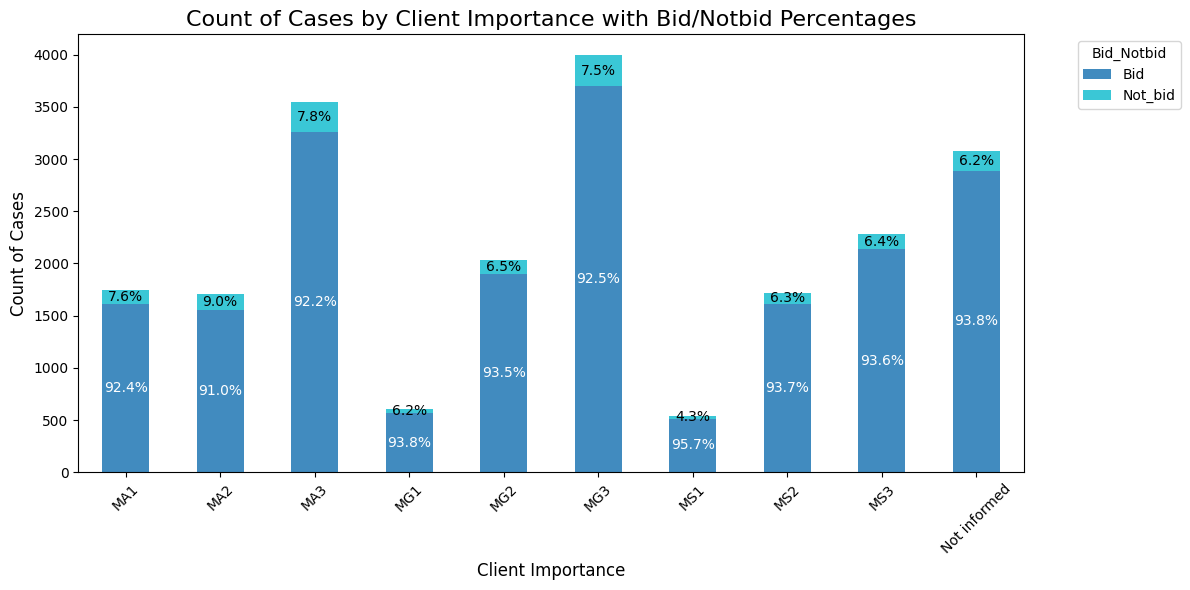

In [69]:
# Group by Client_importance and Bid_Notbid to get counts
client_importance_counts = df_cleaned_bidnotbid.groupby(['Client_importance', 'Bid_Notbid']).size().unstack(fill_value=0)

# Calculate percentages for each category
client_importance_percentages = (client_importance_counts.T / client_importance_counts.sum(axis=1)).T * 100

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
client_importance_counts.plot(kind='bar', stacked=True, ax=ax, colormap='tab10', alpha=0.85)

# Add percentages to each segment in the bar
for i, client_importance in enumerate(client_importance_counts.index):
    cumulative = 0
    total_cases = client_importance_counts.loc[client_importance].sum()
    for bid_notbid, value in client_importance_counts.loc[client_importance].items():
        percentage = client_importance_percentages.loc[client_importance, bid_notbid]
        x_pos = i
        y_pos = cumulative + value / 2
        ax.text(
            x_pos, y_pos, f"{percentage:.1f}%", ha='center', va='center', 
            fontsize=10, color='white' if percentage > 15 else 'black'
        )
        cumulative += value

# Customize the plot
ax.set_title('Count of Cases by Client Importance with Bid/Notbid Percentages', fontsize=16)
ax.set_xlabel('Client Importance', fontsize=12)
ax.set_ylabel('Count of Cases', fontsize=12)
ax.legend(title='Bid_Notbid', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**Comments**

MA3 and MG3 exhibit a higher total count of "Not Bid" cases.

### 5. Resolution time

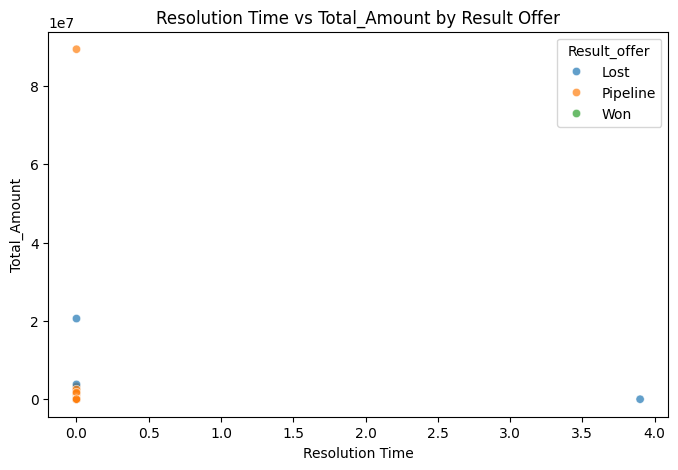

In [70]:
# Scatter plot of Resolution_time vs Total_Amount colored by Result_offer
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned_notbid, x='Resolution_time', y='Total_Amount', hue='Result_offer', alpha=0.7)
plt.title('Resolution Time vs Total_Amount by Result Offer')
plt.xlabel('Resolution Time')
plt.ylabel('Total_Amount')
plt.legend(title='Result_offer')
plt.show()


### 6. Client type

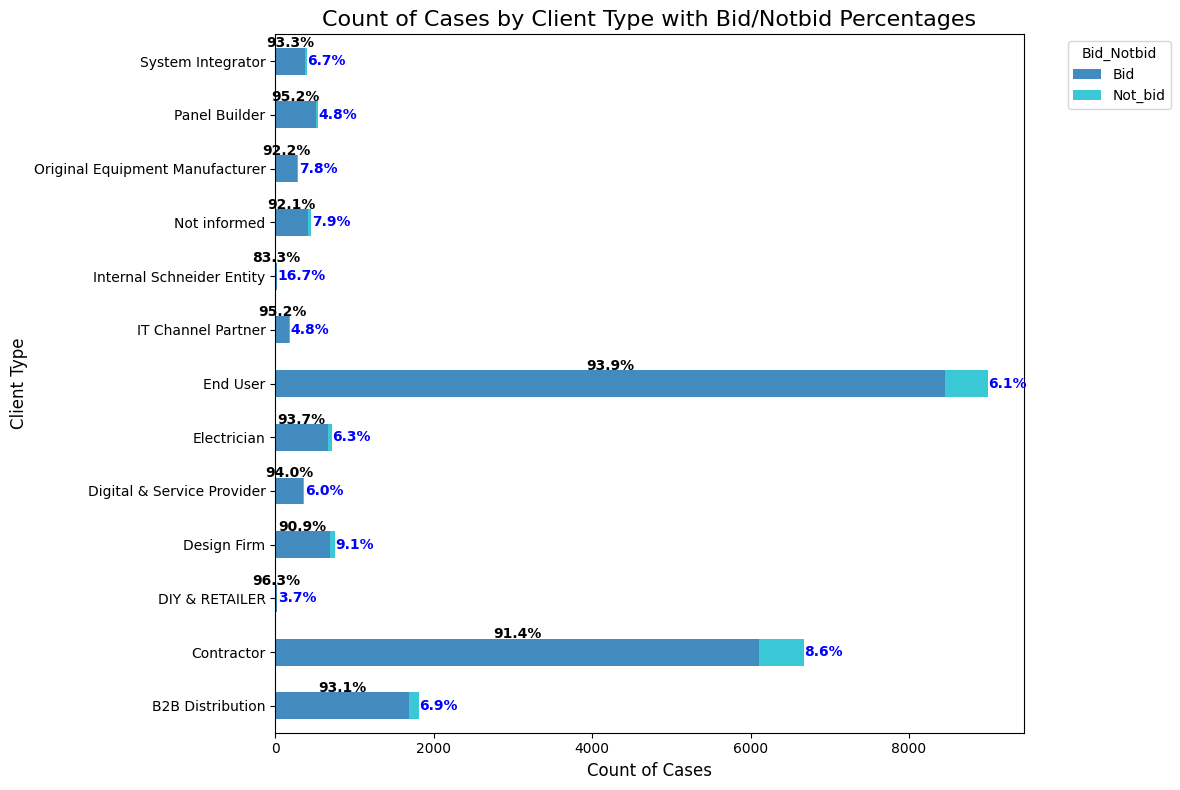

In [71]:

# Group by Client_type and Bid_Notbid to get counts
client_type_counts = df_cleaned_bidnotbid.groupby(['Client_type', 'Bid_Notbid']).size().unstack(fill_value=0)

# Calculate percentages for each category
client_type_percentages = (client_type_counts.T / client_type_counts.sum(axis=1)).T * 100

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data
client_type_counts.plot(kind='barh', stacked=True, ax=ax, colormap='tab10', alpha=0.85)

# Add percentages
for i, client_type in enumerate(client_type_counts.index):
    cumulative = 0
    total_cases = client_type_counts.loc[client_type].sum()
    for bid_notbid, value in client_type_counts.loc[client_type].items():
        percentage = client_type_percentages.loc[client_type, bid_notbid]
        y_pos = i
        
        if value > 0:  # Only annotate if the segment has a value
            if bid_notbid == "Bid":
                # Place Bid percentages above the bar
                ax.text(
                    cumulative + value / 2,  # Center of the bar segment
                    y_pos + 0.20, f"{percentage:.1f}%",  # Slightly above the bar
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
                )
            else:  # For Not_bid, place the percentages next to the bar
                ax.text(
                    cumulative + value + 5,  # Slightly outside the bar
                    y_pos, f"{percentage:.1f}%", 
                    ha='left', va='center', fontsize=10, color='blue', fontweight='bold'
                )
        
        cumulative += value

# Customize the plot
ax.set_title('Count of Cases by Client Type with Bid/Notbid Percentages', fontsize=16)
ax.set_xlabel('Count of Cases', fontsize=12)
ax.set_ylabel('Client Type', fontsize=12)
ax.legend(title='Bid_Notbid', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


### 7. Country

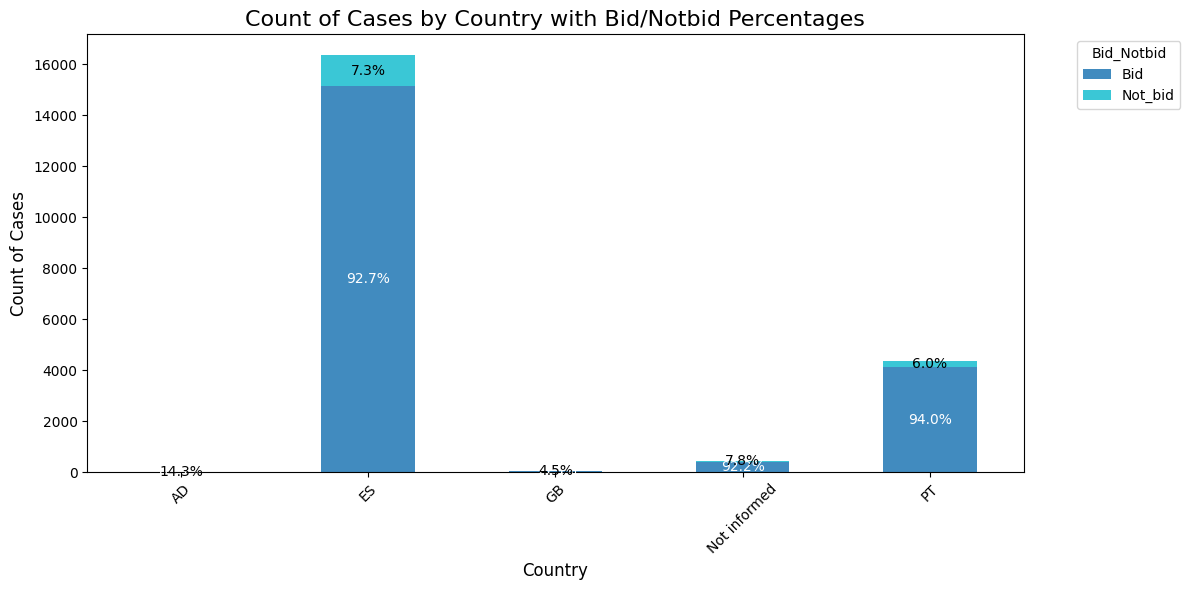

In [72]:
# Group by Country and Bid_Notbid to get counts
country_counts = df_cleaned_bidnotbid.groupby(['Country', 'Bid_Notbid']).size().unstack(fill_value=0)

# Calculate percentages for each category
country_percentages = (country_counts.T / country_counts.sum(axis=1)).T * 100

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
country_counts.plot(kind='bar', stacked=True, ax=ax, colormap='tab10', alpha=0.85)

# Add percentages to each segment in the bar
for i, country in enumerate(country_counts.index):
    cumulative = 0
    total_cases = country_counts.loc[country].sum()
    for bid_notbid, value in country_counts.loc[country].items():
        percentage = country_percentages.loc[country, bid_notbid]
        x_pos = i
        y_pos = cumulative + value / 2
        ax.text(
            x_pos, y_pos, f"{percentage:.1f}%", ha='center', va='center', 
            fontsize=10, color='white' if percentage > 15 else 'black'
        )
        cumulative += value

# Customize the plot
ax.set_title('Count of Cases by Country with Bid/Notbid Percentages', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Count of Cases', fontsize=12)
ax.legend(title='Bid_Notbid', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### 8. Coverage model

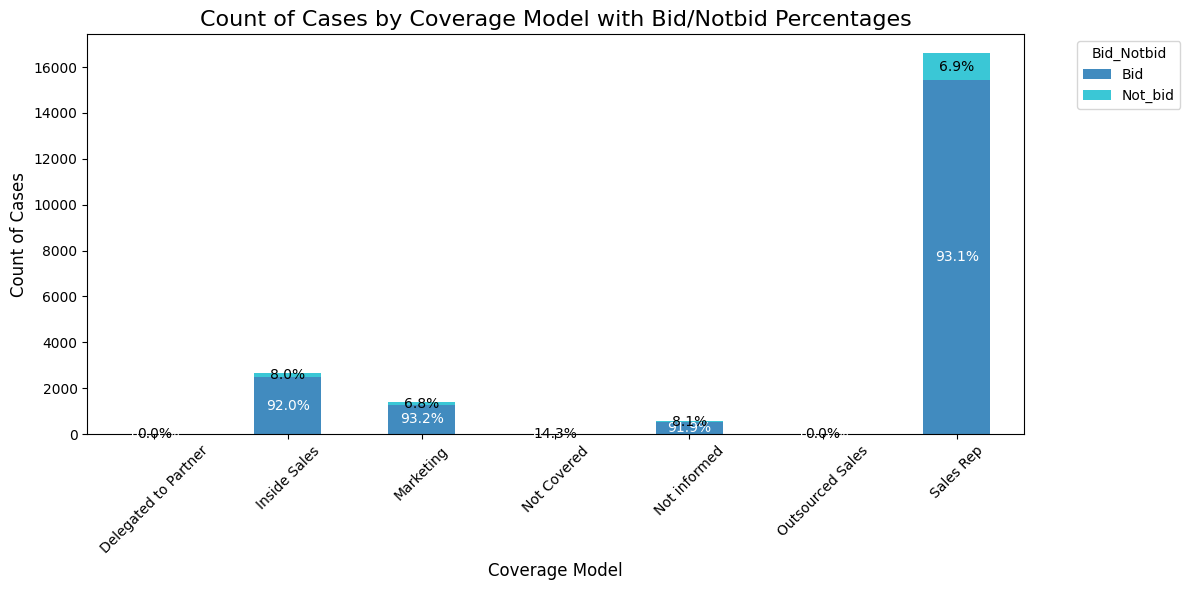

In [73]:
# Group by Coverage_model and Bid_Notbid to get counts
coverage_model_counts = df_cleaned_bidnotbid.groupby(['Coverage_model', 'Bid_Notbid']).size().unstack(fill_value=0)

# Calculate percentages for each category
coverage_model_percentages = (coverage_model_counts.T / coverage_model_counts.sum(axis=1)).T * 100

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
coverage_model_counts.plot(kind='bar', stacked=True, ax=ax, colormap='tab10', alpha=0.85)

# Add percentages to each segment in the bar
for i, coverage_model in enumerate(coverage_model_counts.index):
    cumulative = 0
    total_cases = coverage_model_counts.loc[coverage_model].sum()
    for bid_notbid, value in coverage_model_counts.loc[coverage_model].items():
        percentage = coverage_model_percentages.loc[coverage_model, bid_notbid]
        x_pos = i
        y_pos = cumulative + value / 2
        ax.text(
            x_pos, y_pos, f"{percentage:.1f}%", ha='center', va='center', 
            fontsize=10, color='white' if percentage > 15 else 'black'
        )
        cumulative += value

# Customize the plot
ax.set_title('Count of Cases by Coverage Model with Bid/Notbid Percentages', fontsize=16)
ax.set_xlabel('Coverage Model', fontsize=12)
ax.set_ylabel('Count of Cases', fontsize=12)
ax.legend(title='Bid_Notbid', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### 9. Client_BU

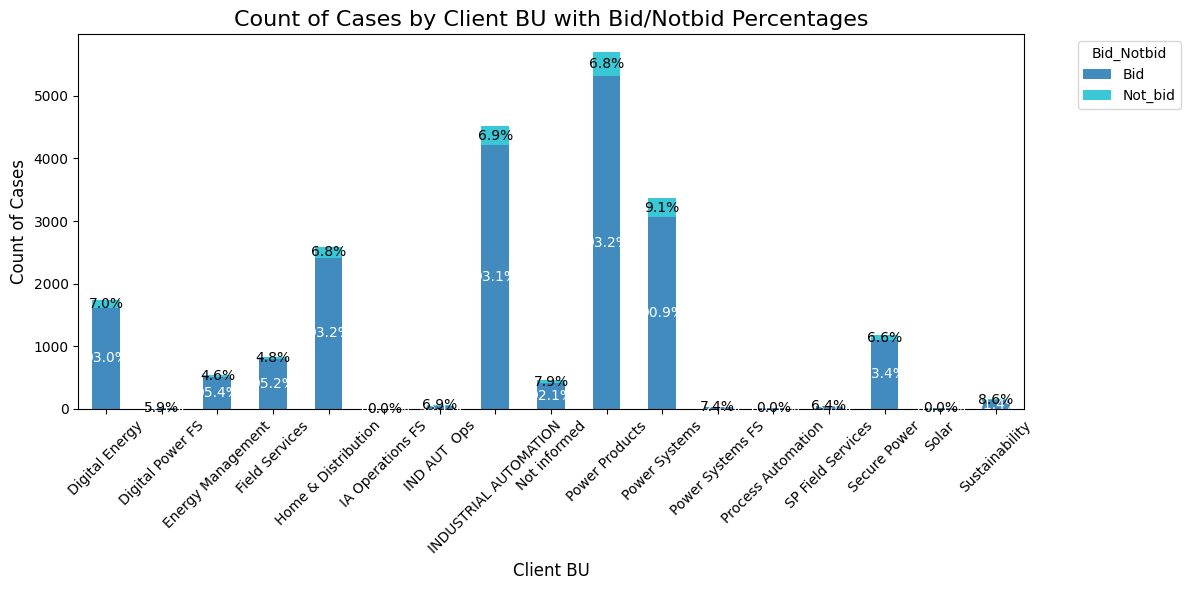

In [74]:
# Group by Client_BU and Bid_Notbid to get counts
client_bu_counts = df_cleaned_bidnotbid.groupby(['Client_BU', 'Bid_Notbid']).size().unstack(fill_value=0)

# Calculate percentages for each category
client_bu_percentages = (client_bu_counts.T / client_bu_counts.sum(axis=1)).T * 100

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
client_bu_counts.plot(kind='bar', stacked=True, ax=ax, colormap='tab10', alpha=0.85)

# Add percentages to each segment in the bar
for i, client_bu in enumerate(client_bu_counts.index):
    cumulative = 0
    total_cases = client_bu_counts.loc[client_bu].sum()
    for bid_notbid, value in client_bu_counts.loc[client_bu].items():
        percentage = client_bu_percentages.loc[client_bu, bid_notbid]
        x_pos = i
        y_pos = cumulative + value / 2
        ax.text(
            x_pos, y_pos, f"{percentage:.1f}%", ha='center', va='center', 
            fontsize=10, color='white' if percentage > 15 else 'black'
        )
        cumulative += value

# Customize the plot
ax.set_title('Count of Cases by Client BU with Bid/Notbid Percentages', fontsize=16)
ax.set_xlabel('Client BU', fontsize=12)
ax.set_ylabel('Count of Cases', fontsize=12)
ax.legend(title='Bid_Notbid', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## Target: Won/Lost

### 1. Frequency Won/Lost

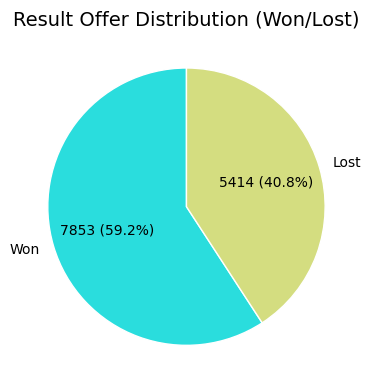

In [75]:

# Calculate the counts of Result_offer and the total number of rows
result_offer_counts = df_cleaned_bidwonlost['Result_offer'].value_counts()
total = result_offer_counts.sum()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    result_offer_counts,
    labels=result_offer_counts.index,
    autopct=lambda p: f'{int(round(p * total / 100))} ({p:.1f}%)',
    startangle=90,
    colors=sns.color_palette("rainbow", len(result_offer_counts)),
    wedgeprops={'edgecolor': 'white'}
)

# Customize the title
plt.title('Result Offer Distribution (Won/Lost)', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()


### 2. Boxplot Amount by Result_offer per BU Amount

Amount Summary by Result_offer (Null Amounts):
                 Amount_DE                 Amount_HD               Amount_ID          Amount_OTHER              Amount_PP               Amount_PS                  Amount_SP                Total_Amount          
                      mean      median          mean    median          mean  median          mean   median          mean   median           mean      median           mean       median           mean    median
Result_offer                                                                                                                                                                                                      
Lost          64929.470340  15000.0000  20055.214022  4233.738  73158.927246  6160.5  56199.949349  15150.0  46455.199553  3000.00  134612.758350  14254.8000  333420.903439  105000.0000  117335.458664  8070.000
Won           43102.188232   4204.9005  12526.387369  4500.000  35052.906548  1500.0  65796.188415  12000.0  

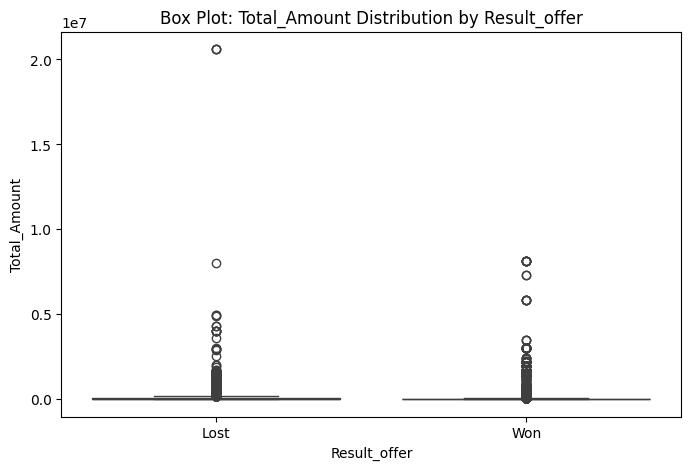

In [76]:
# Filter the DataFrame where Result_offer (Nulls amounts) is 'Won' or 'Lost'
df_cleaned_nullamounts_bidwonlost = df_cleaned_nullamounts[
    (df_cleaned_nullamounts['Result_offer'].isin(['Won', 'Lost'])) & 
    (df_cleaned_nullamounts['Bid_Notbid'].isin(['Bid']))]

# Aggregate mean and median values for each amount column, differentiated by Result_offer (Null Amounts)
amount_summary = df_cleaned_nullamounts_bidwonlost.groupby('Result_offer')[['Amount_DE', 'Amount_HD', 'Amount_ID', 
                                                     'Amount_OTHER', 'Amount_PP', 'Amount_PS', 'Amount_SP', 'Total_Amount']].agg(['mean', 'median'])

with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print("Amount Summary by Result_offer (Null Amounts):")
    print(amount_summary)

# Boxplot to visualize

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned_nullamounts_bidwonlost, x='Result_offer', y='Total_Amount')
plt.title('Box Plot: Total_Amount Distribution by Result_offer')
plt.show()


**Analysis**

* General Trends:
    The mean and median values for nearly all Amount_* columns are higher for "Lost" than for "Won`. This indicates that "Lost" offers tend to have larger financial amounts on average compared to "Won" offers.

* Mean vs. Median:
    Across both "Won" and "Lost" categories, the means are significantly higher than the medians in most columns (e.g., Total_Amount, Amount_PS, etc.). This discrepancy suggests that the data has a right-skewed distribution, with a few very high-value outliers inflating the means.

* Specific Columns:
    Total_Amount:
        "Lost" offers have a significantly lower median (8,070.00) compared to "Won" offers (3,616.76), indicating smaller deals are more likely to be successful (Won).
        The mean for "Lost" (117,335.46) is higher than for "Won" (77,666.99), showing the presence of high-value outliers in "Lost."

    Amount_PS (presumably the primary feature):
        The mean for "Lost" (134,612.76) is twice that for "Won" (65,630.53), but the medians (14,254.80 for "Lost" and 5,395.25 for "Won") show a similar ratio.
    Amount_SP:
        Interestingly, "Won" offers have a dramatically higher mean (841,321.63) and median (329,735.65) compared to "Lost" (333,420.90 mean, 105,000.00 median). This suggests that Amount_SP might be a key differentiator and is closely related to "Won" outcomes.

* Outliers:
    The higher means compared to medians in all columns highlight potential outliers, especially in the "Lost" category. This observation aligns with the right-skewed nature of the data.

* Box plot:
    The box plot clearly shows the distinct patterns in Total_Amount for "Won" and "Lost":
    Smaller deals tend to succeed ("Won"), while larger deals are more prone to failure ("Lost").


**Conclusions**

- Larger deals (Total_Amount) appear to have a higher chance of being "Lost" while smaller deals are more likely to be "Won".

- Certain amount columns, particularly Amount_SP and Amount_PS, show significant differences between "Won" and "Lost," making them potential predictors in a classification model.

- Columns such as Amount_SP, Amount_PS, and Total_Amount appear to have distinct patterns between "Won" and "Lost", it is important to take them into account as features for the predictive models.




### 3. Correlation matrix

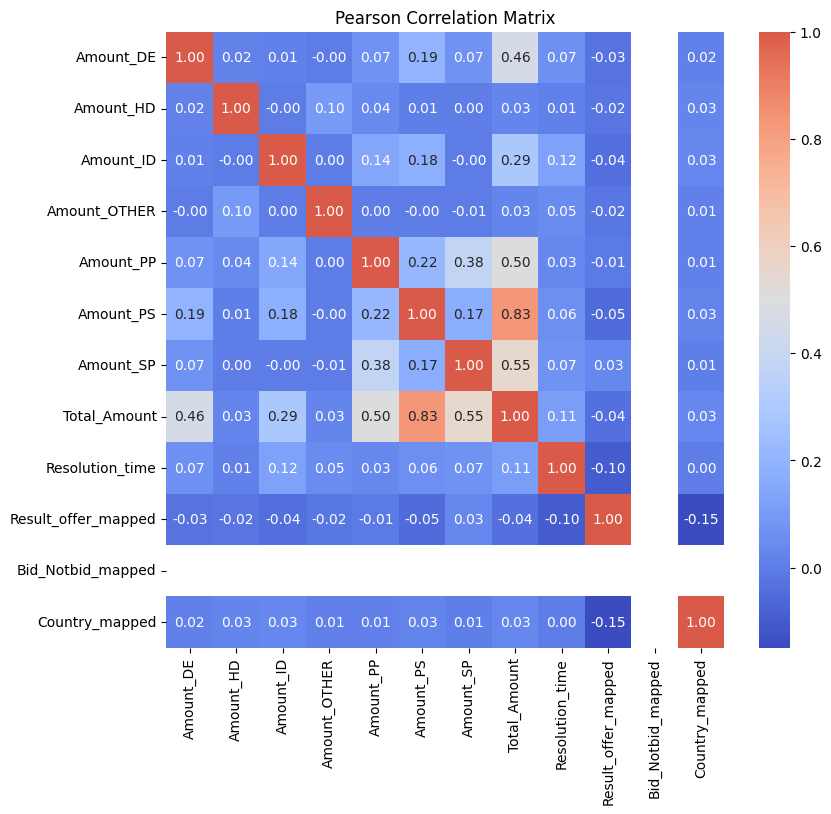


Strong Correlations:
         var1          var2  correlation
0  Amount_PS  Total_Amount     0.831146


In [77]:
# Correlation Matrix

numeric_cols = df_cleaned_bidwonlost.select_dtypes(include=[np.number]).columns.tolist()

def analyze_correlations(df, method="pearson"):
    """Analyze and visualize correlations between variables"""
    # Calculate correlation matrix
    corr_matrix = df.corr(method=method)

    # Create heatmap
    plt.figure(figsize=(9, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", center=0.5)
    plt.title(f"{method.capitalize()} Correlation Matrix")
    plt.show()

    return corr_matrix

def identify_strong_correlations(corr_matrix, threshold):
    """Identify strong correlations above a threshold"""
    strong_corr = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                strong_corr.append(
                    {
                        "var1": corr_matrix.columns[i],
                        "var2": corr_matrix.columns[j],
                        "correlation": corr_matrix.iloc[i, j],
                    }
                )

    return pd.DataFrame(strong_corr)

# Analyze correlations
corr_matrix = analyze_correlations(df_cleaned_bidwonlost[numeric_cols])
strong_correlations = identify_strong_correlations(corr_matrix, threshold=0.6)
print("\nStrong Correlations:\n", strong_correlations)

**Analysis**

Total_Amount has strong positive correlations with Amount_PS. This suggests that Amount_PS is a major contributor to the total amount.

### 4. Pairplots for Amount Columns and Result_offer with Regression Line

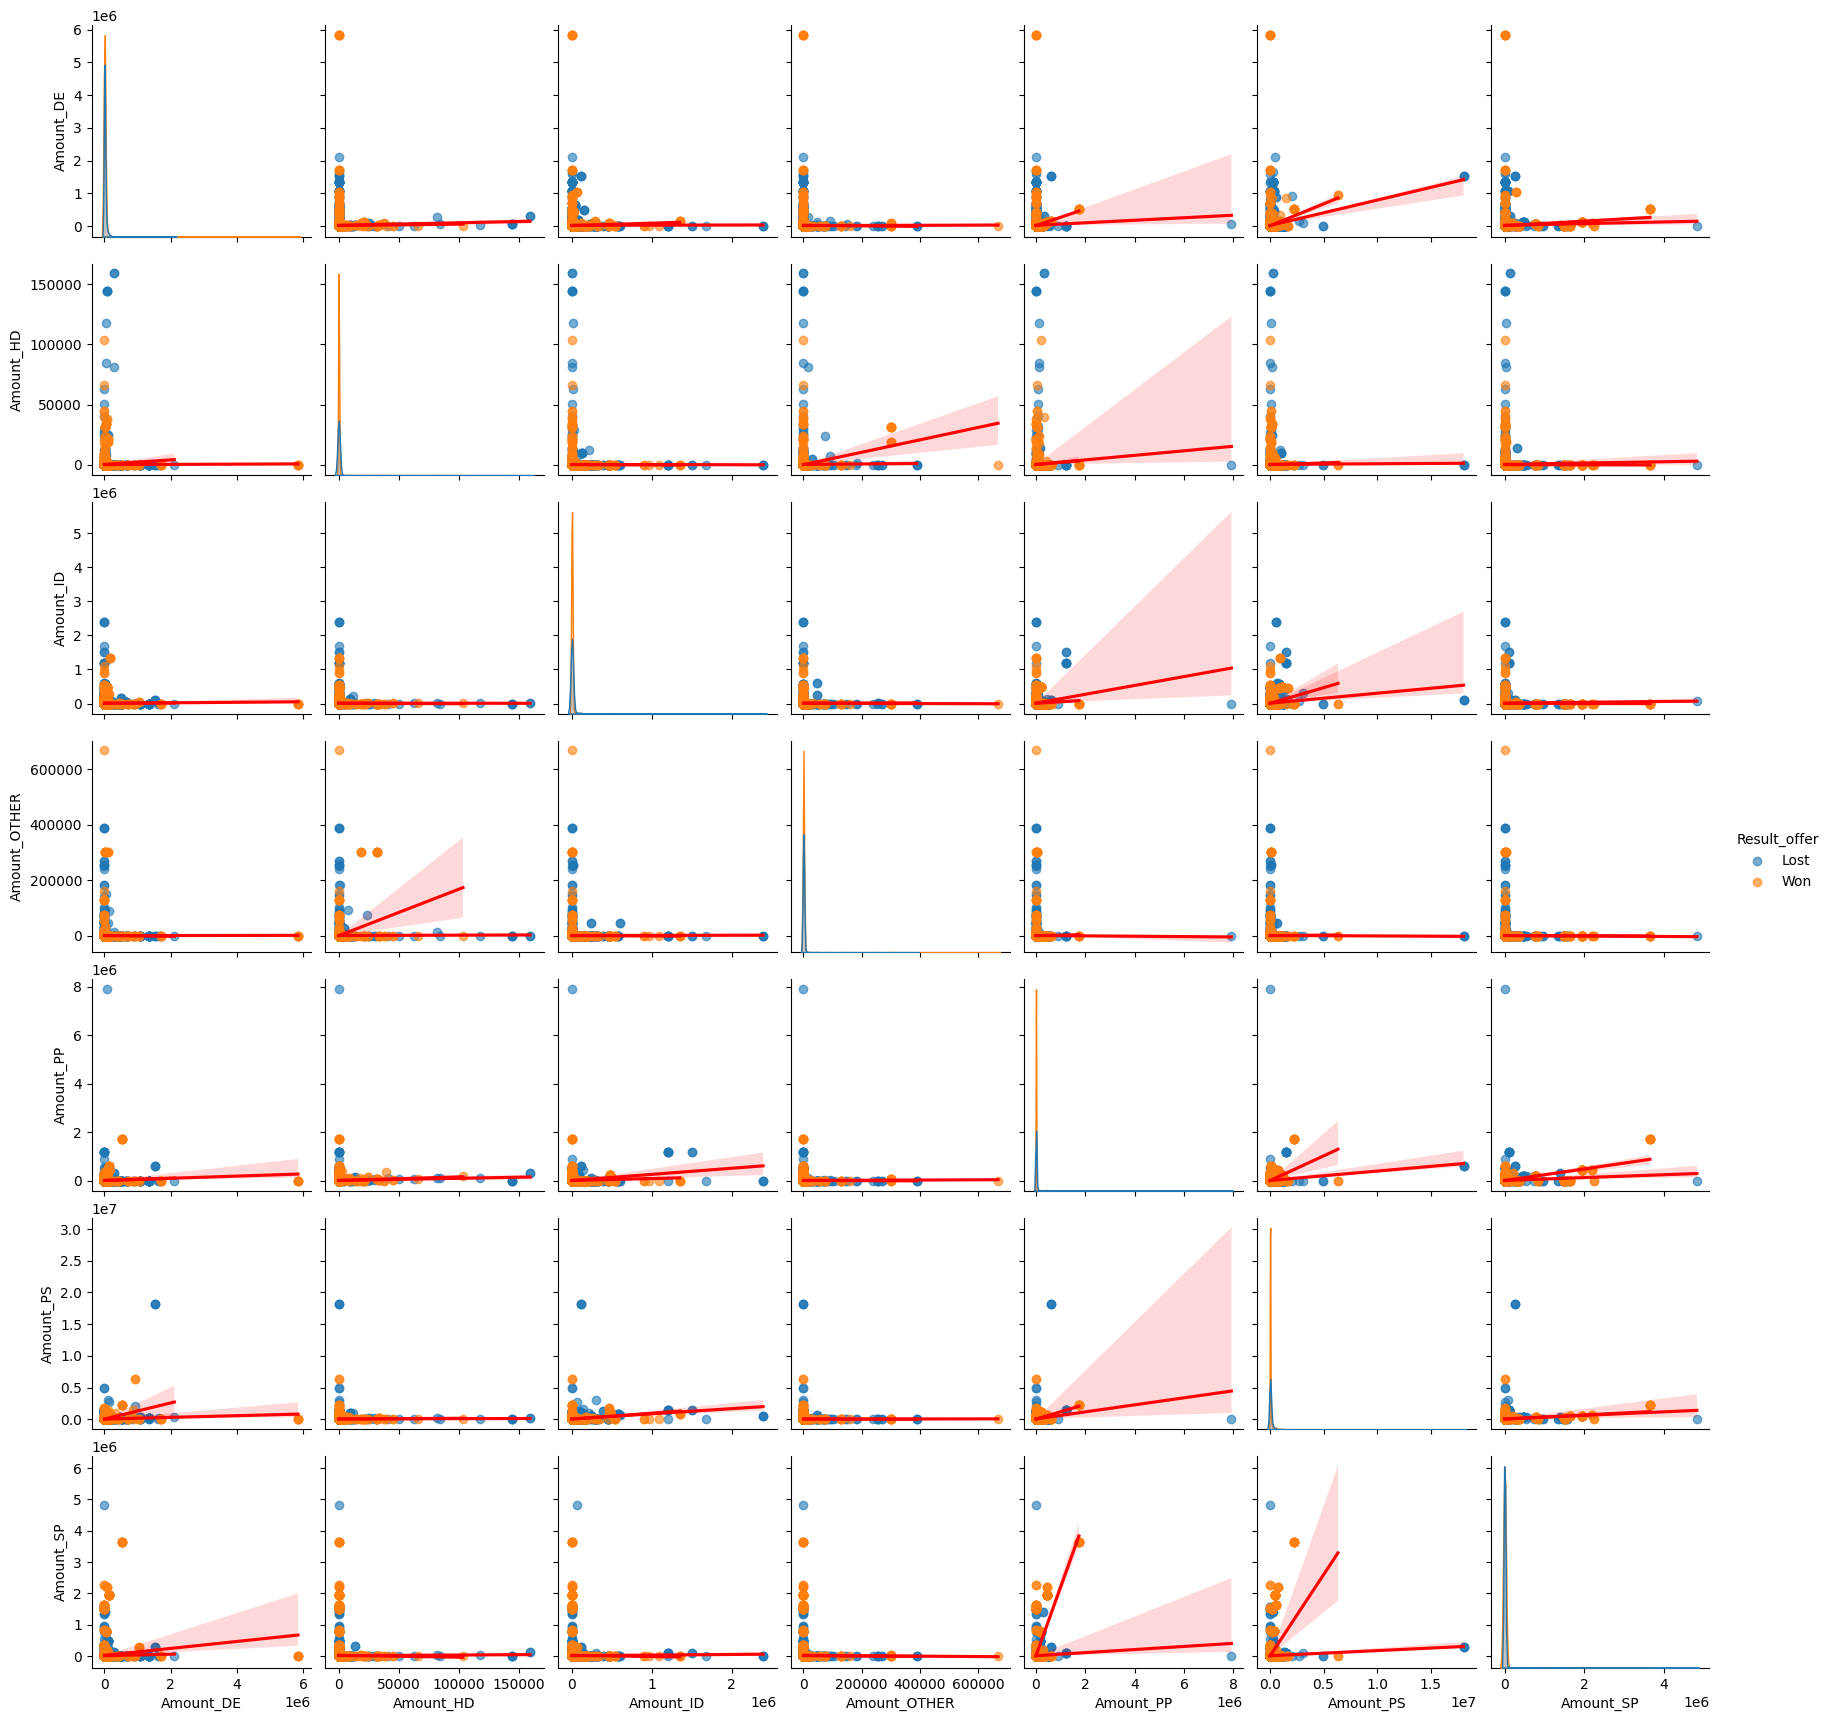

In [78]:
# Pairplots for Amount Columns and Result_offer with Regression Line
amount_cols = ['Amount_DE', 'Amount_HD', 'Amount_ID', 'Amount_OTHER', 'Amount_PP', 'Amount_PS', 'Amount_SP']

# Add regression line by setting kind="reg"
sns.pairplot(
    df_cleaned_bidwonlost,
    vars=amount_cols,
    hue='Result_offer',
    diag_kind="kde",
    kind="reg",  # Add regression lines
    height=2.5,
    plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.6}}
)
plt.show()


**Analysis**

* Weak Linear Relationships: 
    - Most variables show weak or no linear relationships with each other, as indicated by the almost flat regression lines.
    - There appears to be a weak positive relationship between Amount_PS and Amount_SP, and between Amount_DE and Amount_PP.

* Category Separation:
    In most relationships, "Won" (orange) and "Lost" (blue) points are not well-separated, indicating difficulty in distinguishing outcomes based solely on these variables.
    However, for certain combinations (e.g., Amount_PS vs. Amount_OTHER or Amount_SP), the red regression line for "Lost" shows a steeper positive trend compared to "Won."

* Clusters of Small Values:
    For nearly all variable pairs, there is a dense cluster of points near the origin (low values for both variables). This suggests the majority of offers involve smaller deal amounts.

* Outliers:
    There are several high-value outliers across all Amount_* columns, particularly for "Lost." These outliers influence the regression lines and should be carefully analyzed.

### 5. Result offer distribution by Client importance 

Proportions of Total_Amount by Client_importance:
Result_offer            Lost        Won
Client_importance                      
MA1                66.914559  33.085441
MA2                58.819343  41.180657
MA3                71.712746  28.287254
MG1                65.303300  34.696700
MG2                85.640751  14.359249
MG3                61.870841  38.129159
MS1                55.474612  44.525388
MS2                27.614041  72.385959
MS3                25.154935  74.845065
Not informed       39.642809  60.357191


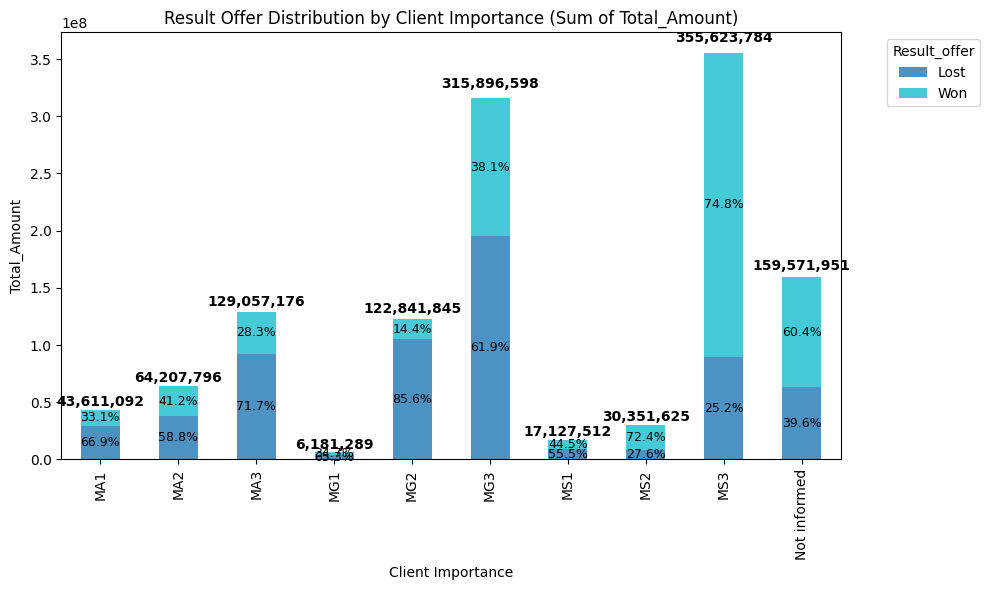

In [79]:
# Group data and calculate sum of Total_Amount
importance_offer = df_cleaned_bidwonlost.groupby(['Client_importance', 'Result_offer'])['Total_Amount'].sum().unstack().fillna(0)

# Calculate proportions of Total_Amount by Client_importance
importance_offer_percent = (importance_offer.T / importance_offer.sum(axis=1)).T * 100

print("Proportions of Total_Amount by Client_importance:")
print(importance_offer_percent)

# Stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bars
bars = importance_offer.plot(kind='bar', stacked=True, figsize=(10, 6), ax=ax, alpha=0.8, cmap="tab10")

# Add annotations for each segment in the bars
for i, client_importance in enumerate(importance_offer.index):
    cumulative = 0  # Track cumulative height of stacked bars
    total_amount = importance_offer.loc[client_importance].sum()  # Total_Amount for this bar
    for result_offer in importance_offer.columns:
        percent = importance_offer_percent.loc[client_importance, result_offer]
        height = importance_offer.loc[client_importance, result_offer]
        if height > 0:
            # Annotate percentage inside the bar segment
            y_pos = cumulative + (height / 2)
            ax.text(
                i, y_pos, f"{percent:.1f}%", 
                ha='center', va='center', fontsize=9, color='black'
            )
        cumulative += height
    # Annotate Total_Amount on top of the bar
    ax.text(
        i, cumulative + 0.02 * cumulative, f"{total_amount:,.0f}",
        ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
    )

# Set plot labels and title
plt.title('Result Offer Distribution by Client Importance (Sum of Total_Amount)')
plt.ylabel('Total_Amount')
plt.xlabel('Client Importance')
plt.legend(title='Result_offer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Analysis**

* Certain client importance categories are more strongly associated with specific outcomes:
    - High "Won" Proportions: MS group (MS3, MS2 and MS1) (and Not informed) are categories where deals are more likely to be successful (Won). 
    - High "Lost" Proportions: MG2, MA3, and MG1 are categories where deals are more likely to fail (Lost).

* Relative importance:
    - MS3 contribute a large absolute amount and high proportion for "Won". As result, MS3 should be prioritized, as it not only has the highest total Total_Amount but also a very high success rate (74.85% Won).
    - Categories with high "Lost" proportions (e.g., MG2, MA3) could indicate inefficiencies or challenges that need addressing to improve conversion rates.


Grouped Total_Amount by Client Importance and Result Offer:
Result_offer                Won
Client_importance              
MA1                1.442892e+07
MA2                2.644119e+07
MA3                3.650673e+07
MG1                2.144703e+06
MG2                1.763917e+07
MG3                1.204487e+08
MS1                7.626091e+06
MS2                2.197031e+07
MS3                2.661669e+08
Not informed       9.631315e+07


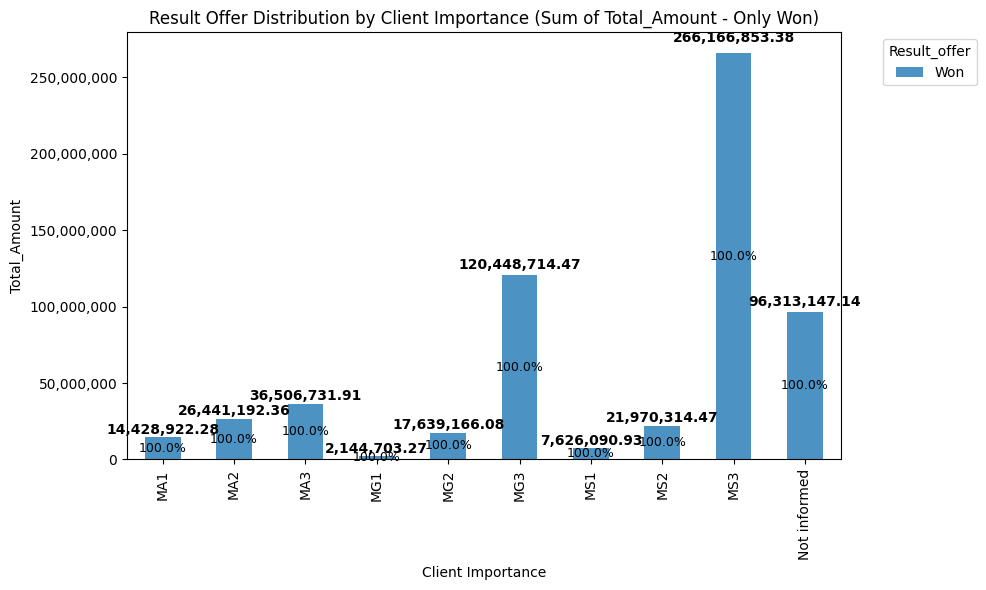

In [80]:

# Group data and calculate sum of Total_Amount
importance_offer = df_cleaned_bidwon.groupby(['Client_importance', 'Result_offer'])['Total_Amount'].sum().unstack().fillna(0)

# Calculate proportions of Total_Amount by Client_importance
importance_offer_percent = (importance_offer.T / importance_offer.sum(axis=1)).T * 100

print("Grouped Total_Amount by Client Importance and Result Offer:")
print(importance_offer)

# Stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bars
bars = importance_offer.plot(kind='bar', stacked=True, figsize=(10, 6), ax=ax, alpha=0.8, cmap="tab10")

# Add annotations for each segment in the bars
for i, client_importance in enumerate(importance_offer.index):
    cumulative = 0  # Track cumulative height of stacked bars
    total_amount = importance_offer.loc[client_importance].sum()  # Total_Amount for this bar
    for result_offer in importance_offer.columns:
        percent = importance_offer_percent.loc[client_importance, result_offer]
        height = importance_offer.loc[client_importance, result_offer]
        if height > 0:
            # Annotate percentage inside the bar segment
            y_pos = cumulative + (height / 2)
            ax.text(
                i, y_pos, f"{percent:.1f}%", 
                ha='center', va='center', fontsize=9, color='black'
            )
        cumulative += height
    # Annotate Total_Amount on top of the bar with exact value
    ax.text(
        i, cumulative + 0.02 * cumulative, f"{total_amount:,.2f}",  # Display full numbers with 2 decimals
        ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
    )

# Force y-axis to show full numbers instead of abbreviations
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Set plot labels and title
plt.title('Result Offer Distribution by Client Importance (Sum of Total_Amount - Only Won)')
plt.ylabel('Total_Amount')
plt.xlabel('Client Importance')
plt.legend(title='Result_offer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Analysis**
- MS3: This category contributes the largest total Total_Amount for "Won" outcomes. It is a clear leader among the categories, indicating that deals classified as MS3 are highly valuable and often result in successful outcomes.

- MG3: The second-highest contributor to Total_Amount for "Won" deals. Represents another critical category with substantial success in generating revenue.

- The chart shows that certain Client_importance categories correlate strongly with high-value successful deals (e.g., MS3, MG3). It is important to use this feature in our predictive models to assess the success likelihood.

### 6. Resolution time vs Total amount by Result Offer

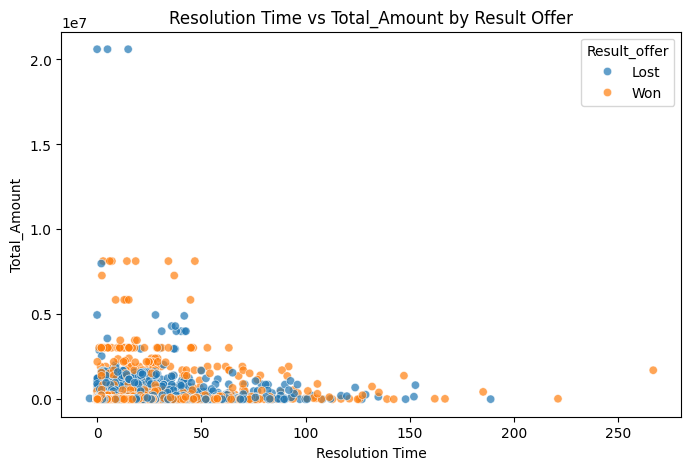

In [81]:
# Scatter plot of Resolution_time vs Total_Amount colored by Result_offer
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned_bidwonlost, x='Resolution_time', y='Total_Amount', hue='Result_offer', alpha=0.7)
plt.title('Resolution Time vs Total_Amount by Result Offer')
plt.xlabel('Resolution Time')
plt.ylabel('Total_Amount')
plt.legend(title='Result_offer')
plt.show()


**Analysis**

- The higher density of "Won" deals for shorter resolution times indicates that quicker resolutions are more likely to lead to success.

- While shorter resolution times are more likely associated with "Won" outcomes, the overall weak correlation suggests that Resolution_time alone is not a strong predictor.

### 7. Heatmap - Client type and Client importance

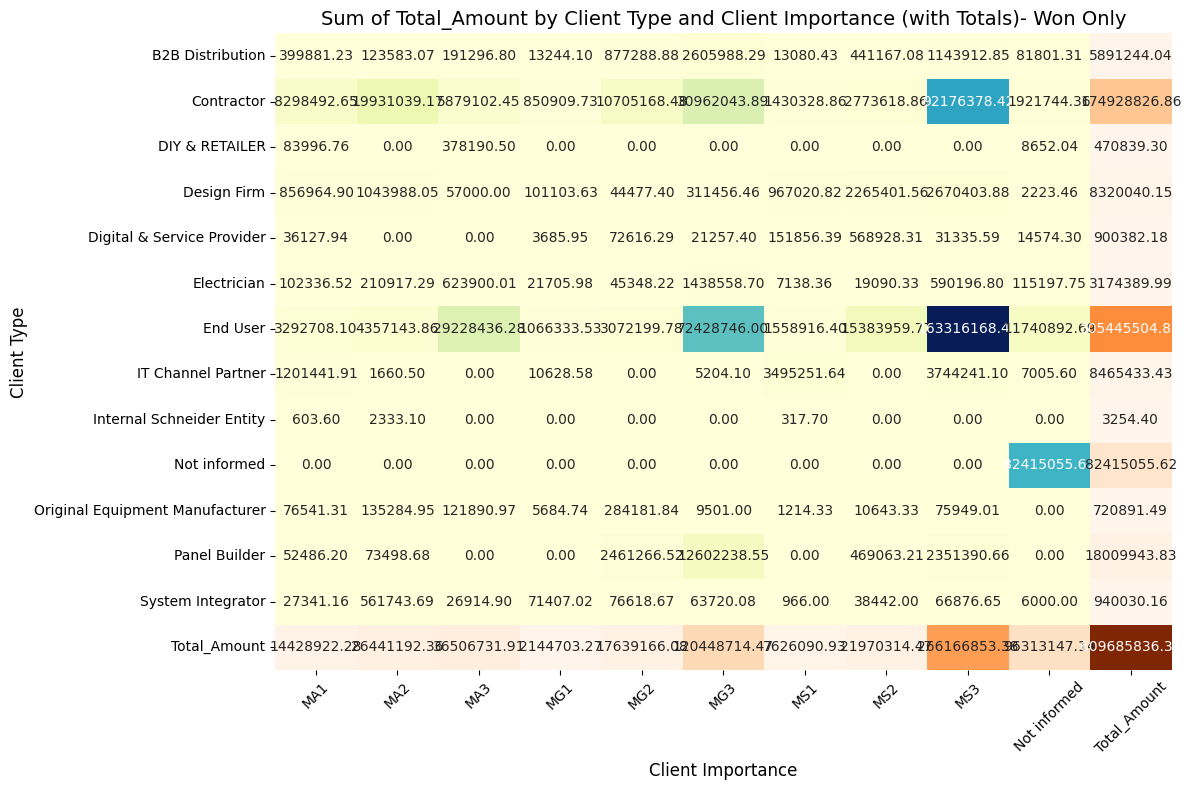

In [82]:

# Group by Client_type and Client_importance to compute the sum of Total_Amount
heatmap_data = df_cleaned_bidwon.groupby(['Client_type', 'Client_importance'])['Total_Amount'].sum().unstack(fill_value=0)

# Add a total column (sum across Client_importance for each Client_type)
heatmap_data['Total_Amount'] = heatmap_data.sum(axis=1)

# Add a total row (sum across Client_type for each Client_importance, including the total column)
heatmap_data.loc['Total_Amount'] = heatmap_data.sum(axis=0)

# Separate masks for main data and totals
main_mask = np.zeros_like(heatmap_data, dtype=bool)
main_mask[heatmap_data.index == 'Total_Amount', :] = True  # Mask total row
main_mask[:, heatmap_data.columns == 'Total_Amount'] = True  # Mask total column

total_mask = ~main_mask  # Inverse of the main mask to color only totals

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Main data heatmap
sns.heatmap(
    heatmap_data,
    mask=main_mask,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar=False,
    ax=ax
)

# Overlay heatmap for totals
sns.heatmap(
    heatmap_data,
    mask=total_mask,
    annot=True,
    fmt=".2f",
    cmap="Oranges",  # Different colormap for totals
    cbar=False,
    ax=ax
)

# Titles and labels
plt.title('Sum of Total_Amount by Client Type and Client Importance (with Totals)- Won Only', fontsize=14)
plt.xlabel('Client Importance', fontsize=12)
plt.ylabel('Client Type', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**Analysis**

High-Value Combinations: MS3, MG3
    - End User in MS3, MG3, MA3
    - Contractor in MS3, MG3
    - Panel Builder in MG3


### 8. Client type distribution & amount

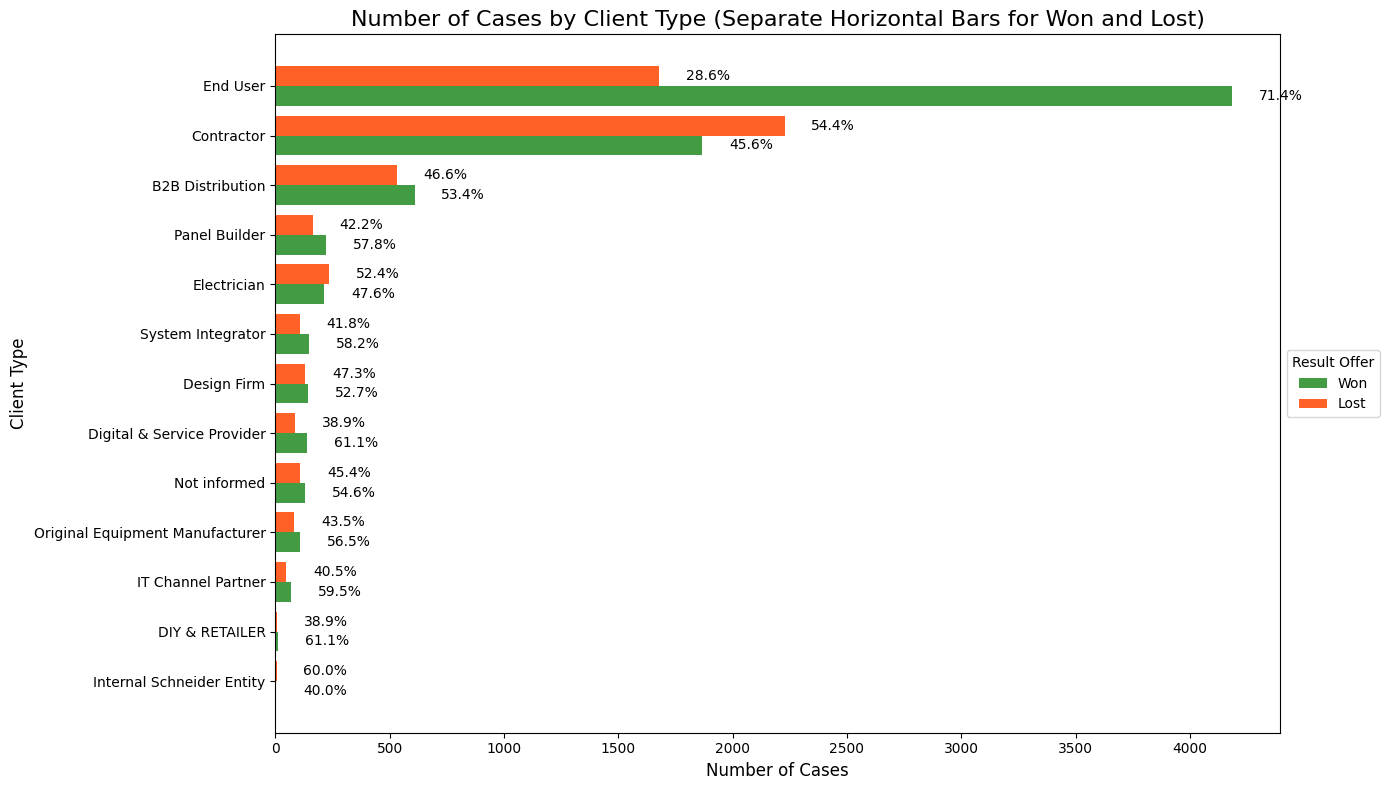

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Aggregate data by count of cases (instead of total amount)
grouped_data = df_cleaned_bidwonlost.groupby(['Client_type', 'Result_offer']).size().reset_index(name='Total_Cases')

# Step 2: Pivot the data to create a table for side-by-side bars
pivot_data = grouped_data.pivot(index='Client_type', columns='Result_offer', values='Total_Cases').fillna(0)

# Step 3: Calculate percentages for each Client_type
percentages = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100  # Calculate percentages

# Step 4: Order Client_type by the total cases won (ascending)
pivot_data = pivot_data.loc[pivot_data['Won'].sort_values(ascending=True).index]
percentages = percentages.loc[pivot_data.index]

# Step 5: Plot horizontal bars
y = np.arange(len(pivot_data.index))  # Positions for each client type
bar_height = 0.4  # Height of each bar

plt.figure(figsize=(14, 8))

# Plot 'Won' bars in green
plt.barh(
    y - bar_height / 2, 
    pivot_data['Won'], 
    height=bar_height, 
    label='Won', 
    color='#228B22',  # Forest Green color for Won
    alpha=0.85
)
# Annotate 'Won' bars with percentages
for i, (cases, percent) in enumerate(zip(pivot_data['Won'], percentages['Won'])):
    if cases > 0:
        plt.text(
            x=cases + max(pivot_data.sum(axis=1)) * 0.02,  # Slightly to the right of the bar
            y=i - bar_height / 2, 
            s=f"{percent:.1f}%", 
            ha='left', 
            va='center', 
            fontsize=10
        )

# Plot 'Lost' bars in red
plt.barh(
    y + bar_height / 2, 
    pivot_data['Lost'], 
    height=bar_height, 
    label='Lost', 
    color='#FF4500',  # Orange Red color for Lost
    alpha=0.85
)
# Annotate 'Lost' bars with percentages
for i, (cases, percent) in enumerate(zip(pivot_data['Lost'], percentages['Lost'])):
    if cases > 0:
        plt.text(
            x=cases + max(pivot_data.sum(axis=1)) * 0.02,  # Slightly to the right of the bar
            y=i + bar_height / 2, 
            s=f"{percent:.1f}%", 
            ha='left', 
            va='center', 
            fontsize=10
        )

# Customize the plot
plt.title("Number of Cases by Client Type (Separate Horizontal Bars for Won and Lost)", fontsize=16)
plt.xlabel("Number of Cases", fontsize=12)
plt.ylabel("Client Type", fontsize=12)
plt.yticks(ticks=y, labels=pivot_data.index)

# Move legend outside the plot
plt.legend(
    title="Result Offer", 
    loc='center left', 
    bbox_to_anchor=(1, 0.5),  # Position the legend outside the plot
    fontsize=10
)

plt.tight_layout()

# Show the plot
plt.show()


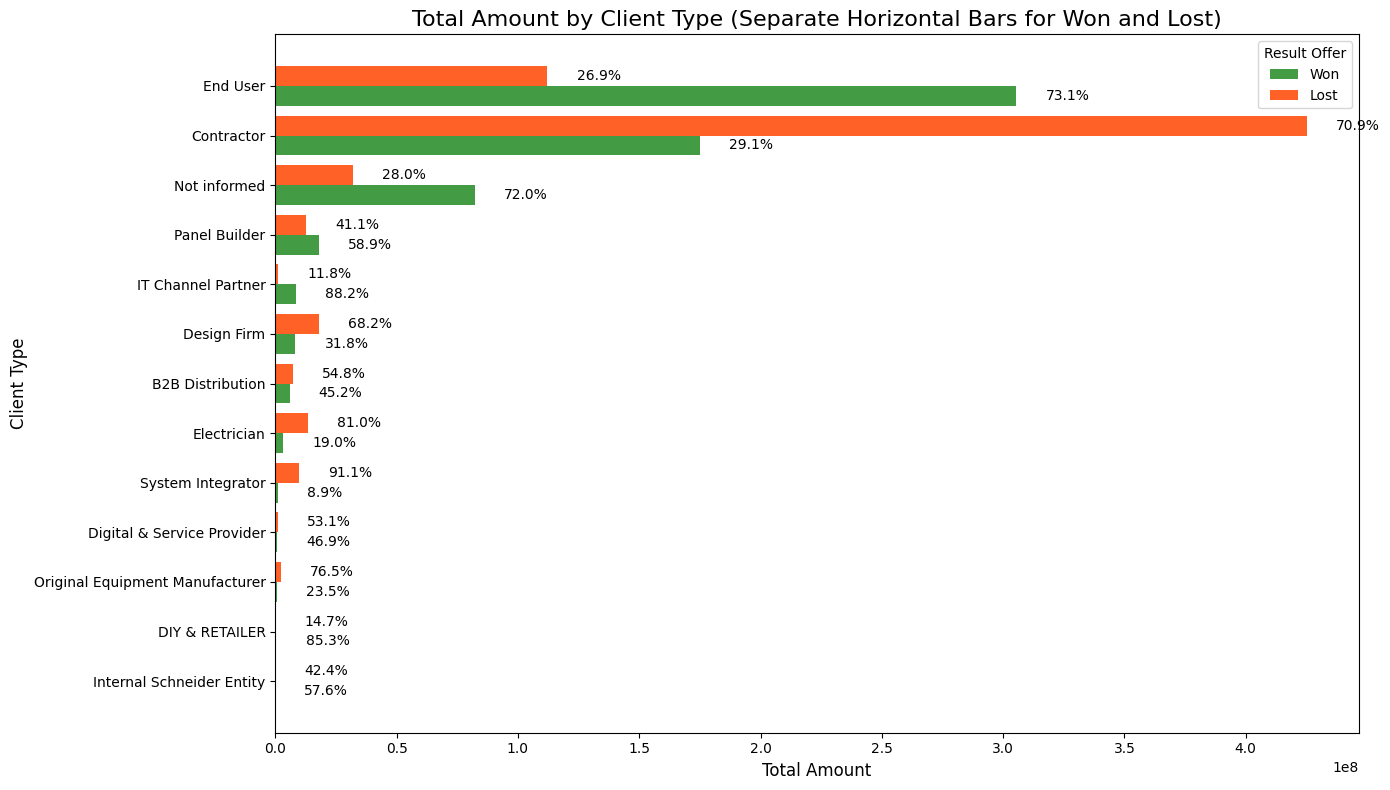

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Aggregate data
grouped_data = df_cleaned_bidwonlost.groupby(['Client_type', 'Result_offer'])['Total_Amount'].sum().reset_index()

# Step 2: Pivot the data to create a table for side-by-side bars
pivot_data = grouped_data.pivot(index='Client_type', columns='Result_offer', values='Total_Amount').fillna(0)

# Step 3: Calculate percentages for each Client_type
percentages = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100  # Calculate percentages

# Step 4: Order Client_type by the total amount won (ascending)
pivot_data = pivot_data.loc[pivot_data['Won'].sort_values(ascending=True).index]
percentages = percentages.loc[pivot_data.index]

# Step 5: Plot horizontal bars
y = np.arange(len(pivot_data.index))  # Positions for each client type
bar_height = 0.4  # Height of each bar

plt.figure(figsize=(14, 8))

# Plot 'Won' bars in green
plt.barh(
    y - bar_height / 2, 
    pivot_data['Won'], 
    height=bar_height, 
    label='Won', 
    color='#228B22',  # Forest Green color for Won
    alpha=0.85
)
# Annotate 'Won' bars with percentages
for i, (total, percent) in enumerate(zip(pivot_data['Won'], percentages['Won'])):
    if total > 0:
        plt.text(
            x=total + max(pivot_data.sum(axis=1)) * 0.02,  # Slightly to the right of the bar
            y=i - bar_height / 2, 
            s=f"{percent:.1f}%", 
            ha='left', 
            va='center', 
            fontsize=10
        )

# Plot 'Lost' bars in red
plt.barh(
    y + bar_height / 2, 
    pivot_data['Lost'], 
    height=bar_height, 
    label='Lost', 
    color='#FF4500',  # Orange Red color for Lost
    alpha=0.85
)
# Annotate 'Lost' bars with percentages
for i, (total, percent) in enumerate(zip(pivot_data['Lost'], percentages['Lost'])):
    if total > 0:
        plt.text(
            x=total + max(pivot_data.sum(axis=1)) * 0.02,  # Slightly to the right of the bar
            y=i + bar_height / 2, 
            s=f"{percent:.1f}%", 
            ha='left', 
            va='center', 
            fontsize=10
        )

# Customize the plot
plt.title("Total Amount by Client Type (Separate Horizontal Bars for Won and Lost)", fontsize=16)
plt.xlabel("Total Amount", fontsize=12)
plt.ylabel("Client Type", fontsize=12)
plt.yticks(ticks=y, labels=pivot_data.index)
plt.legend(title="Result Offer", loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


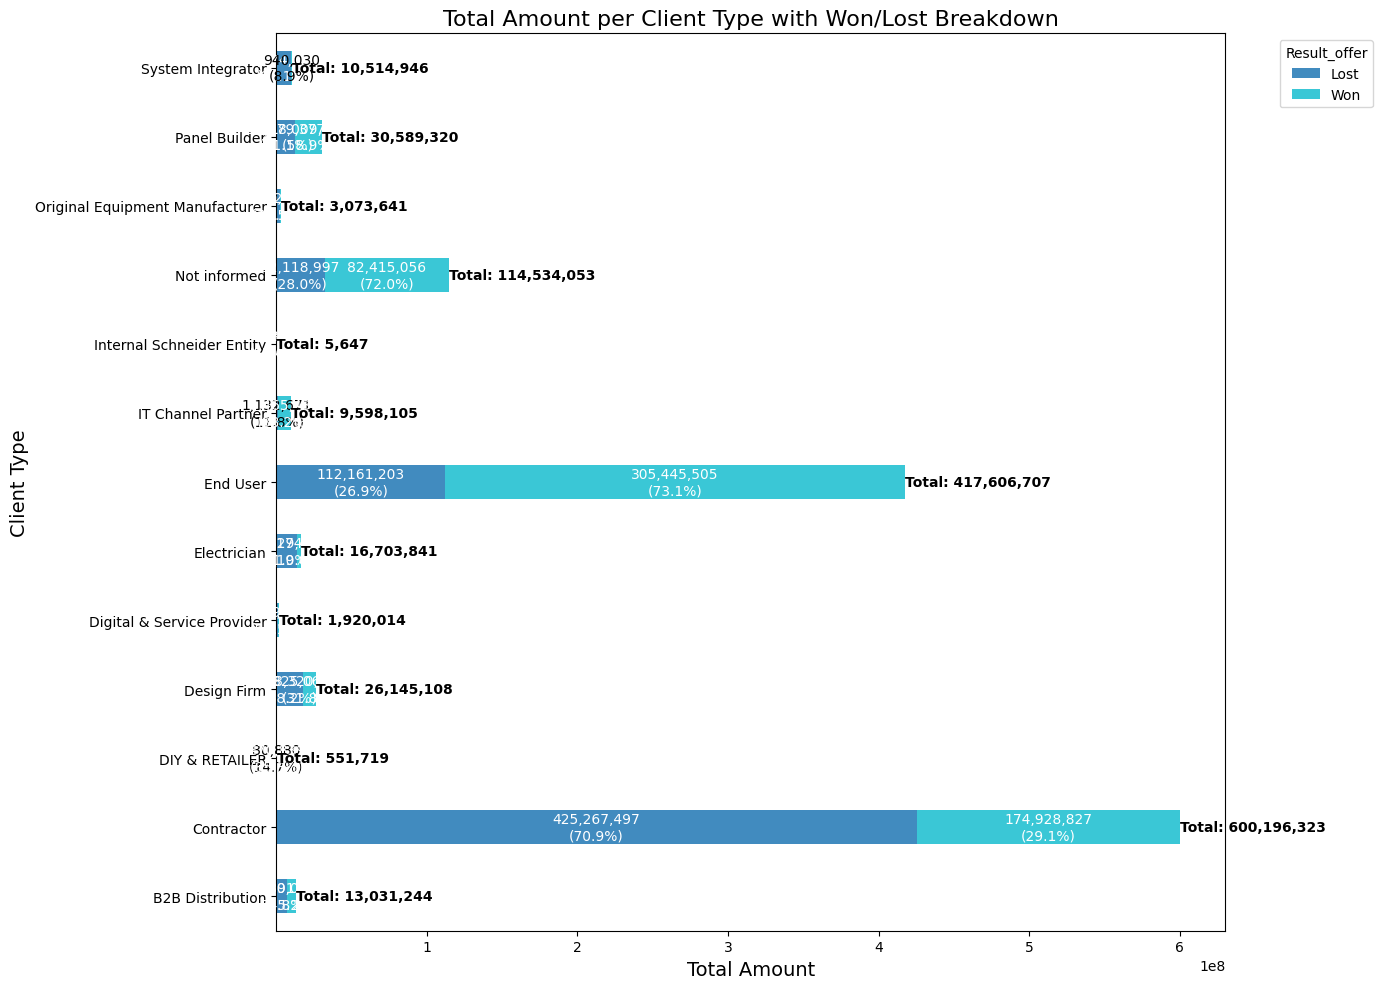

Result_offer                             Lost           Won  Won_Amount_Percent  Lost_Amount_Percent  Total_Amount    Won_Amount   Lost_Amount
Client_type                                                                                                                                   
B2B Distribution                 7.140000e+06  5.891244e+06               45.21                54.79  1.303124e+07  5.891244e+06  7.140000e+06
Contractor                       4.252675e+08  1.749288e+08               29.15                70.85  6.001963e+08  1.749288e+08  4.252675e+08
DIY & RETAILER                   8.088000e+04  4.708393e+05               85.34                14.66  5.517193e+05  4.708393e+05  8.088000e+04
Design Firm                      1.782507e+07  8.320040e+06               31.82                68.18  2.614511e+07  8.320040e+06  1.782507e+07
Digital & Service Provider       1.019631e+06  9.003822e+05               46.89                53.11  1.920014e+06  9.003822e+05  1.019631e+06

In [85]:
# Group by Client_type and Result_offer: Total_Amount and case count
client_type_total = df_cleaned_bidwonlost.groupby(['Client_type', 'Result_offer'])['Total_Amount'].sum().unstack(fill_value=0)

# Calculate percentages for Total_Amount (for annotations)
client_type_total_percent = (client_type_total.T / client_type_total.sum(axis=1)).T * 100

# Plot the data
fig, ax = plt.subplots(figsize=(14, 10))

# Create horizontal stacked bar plot for Total_Amount
client_type_total.plot(kind='barh', stacked=True, colormap='tab10', alpha=0.85, ax=ax)

# Add annotations for each bar segment
for i, client_type in enumerate(client_type_total.index):
    cumulative = 0
    total_amount = client_type_total.loc[client_type].sum()  # Total amount for this client type
    
    for result_offer, value in client_type_total.loc[client_type].items():
        percentage = client_type_total_percent.loc[client_type, result_offer]
        x_pos = cumulative + value / 2
        ax.text(
            x_pos, i, f"{value:,.0f}\n({percentage:.1f}%)", ha='center', va='center',
            fontsize=10, color='white' if percentage > 15 else 'black'
        )
        cumulative += value
    
    # Add total amount annotation at the end of the bar
    ax.text(
        cumulative, i, f"Total: {total_amount:,.0f}",
        ha='left', va='center', fontsize=10, color='black', fontweight='bold'
    )

# Customizing the plot
ax.set_title('Total Amount per Client Type with Won/Lost Breakdown', fontsize=16)
ax.set_xlabel('Total Amount', fontsize=14)
ax.set_ylabel('Client Type', fontsize=14)
ax.legend(title='Result_offer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

# Combine totals and percentages into a single DataFrame for display
combined_table = client_type_total.copy()
combined_table['Won_Amount_Percent'] = client_type_total_percent['Won'].round(2)
combined_table['Lost_Amount_Percent'] = client_type_total_percent['Lost'].round(2)

# Add case data for completeness
combined_table['Total_Amount'] = client_type_total.sum(axis=1)
combined_table['Won_Amount'] = client_type_total['Won']
combined_table['Lost_Amount'] = client_type_total['Lost']

# Display the combined table
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(combined_table)


**Analysis**
1. High "Won" Percentages
    - IT Channel Partner: 88.20% - The highest win percentage across client types, but small amount.
    - End User: 73.14% - The largest absolute Won_Amount of 305.45M makes this client type a key driver of success.
    - DIY & RETAILER: 85.34% - high win percentage, but small amount.

2. High "Lost" Percentages
    - System Integrator: 91.06% Lost - highest percentage of lost deals, but small amount.
    - Electrician: 81.00% Lost - Small amount.
    - Contractor: 70.85% Lost - they account for the largest absolute Lost_Amount of $425.27M, however they are still a high-value segment.
    - Original Equipment Manufacturer: 76.55% Lost - This client type has a significant loss percentage, but small amount.

3. Balanced Performance
    - Panel Builder: 58.88% Won and 41.12% Lost - Small amount.
    - Digital & Service Provider: 46.89% Won and 53.11% - Small amount.

**Conclusions**
1. High-Value Client Types: End User and Contractor:
    They have the largest Total_Amount values, making them critical to overall performance. 
    End Users already have a high win rate.
    Improving win rate for Contractors could significantly boost total wins.

2. High Loss Rates: System Integrator, Electrician, and Contractor. Contractor contributes to significant missed opportunities.

3. High Win Rates: IT Channel Partner, End User. 


### 8. Client type and Country

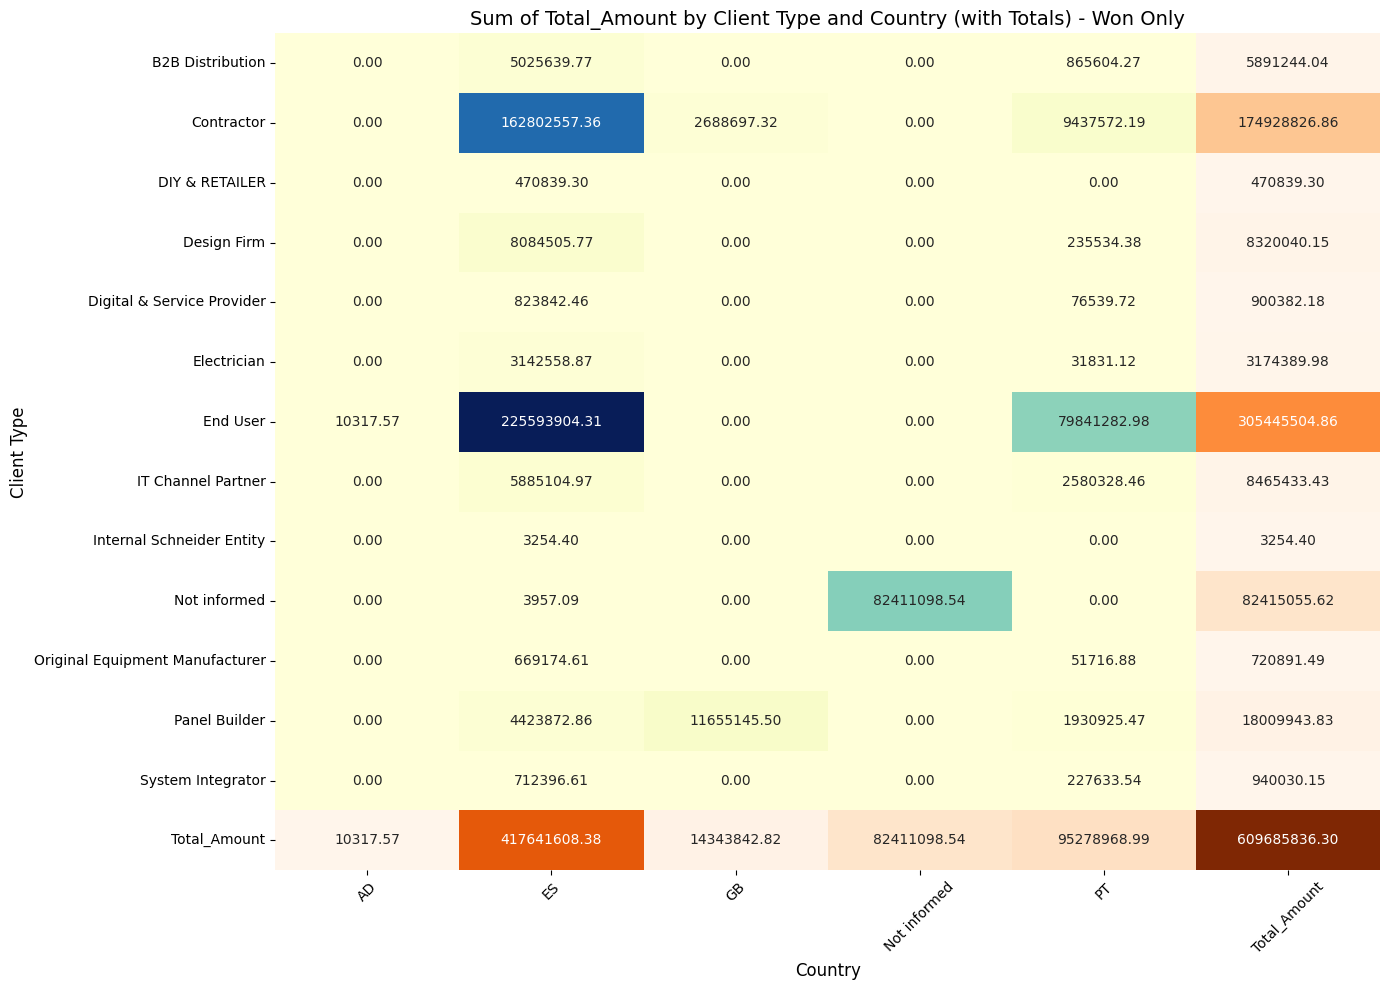

In [86]:
# Group by Client_type and Country to compute the sum of Total_Amount
heatmap_data = df_cleaned_bidwon.groupby(['Client_type', 'Country'])['Total_Amount'].sum().unstack(fill_value=0)

# Add a total column (sum across Country for each Client_type)
heatmap_data['Total_Amount'] = heatmap_data.sum(axis=1)

# Add a total row (sum across Client_type for each Country, including the total column)
heatmap_data.loc['Total_Amount'] = heatmap_data.sum(axis=0)

# Separate masks for main data and totals
main_mask = np.zeros_like(heatmap_data, dtype=bool)
main_mask[heatmap_data.index == 'Total_Amount', :] = True  # Mask total row
main_mask[:, heatmap_data.columns == 'Total_Amount'] = True  # Mask total column

total_mask = ~main_mask  # Inverse of the main mask to color only totals

# Plot the heatmap
fig, ax = plt.subplots(figsize=(14, 10))

# Main data heatmap
sns.heatmap(
    heatmap_data,
    mask=main_mask,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar=False,
    ax=ax
)

# Overlay heatmap for totals
sns.heatmap(
    heatmap_data,
    mask=total_mask,
    annot=True,
    fmt=".2f",
    cmap="Oranges",  # Different colormap for totals
    cbar=False,
    ax=ax
)

# Titles and labels
plt.title('Sum of Total_Amount by Client Type and Country (with Totals) - Won Only', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Client Type', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**Analysis**
Top combinations:
- ES: End User, Contractor
- PT: End User

### 9. Heatmap - Client BU and Client Importance

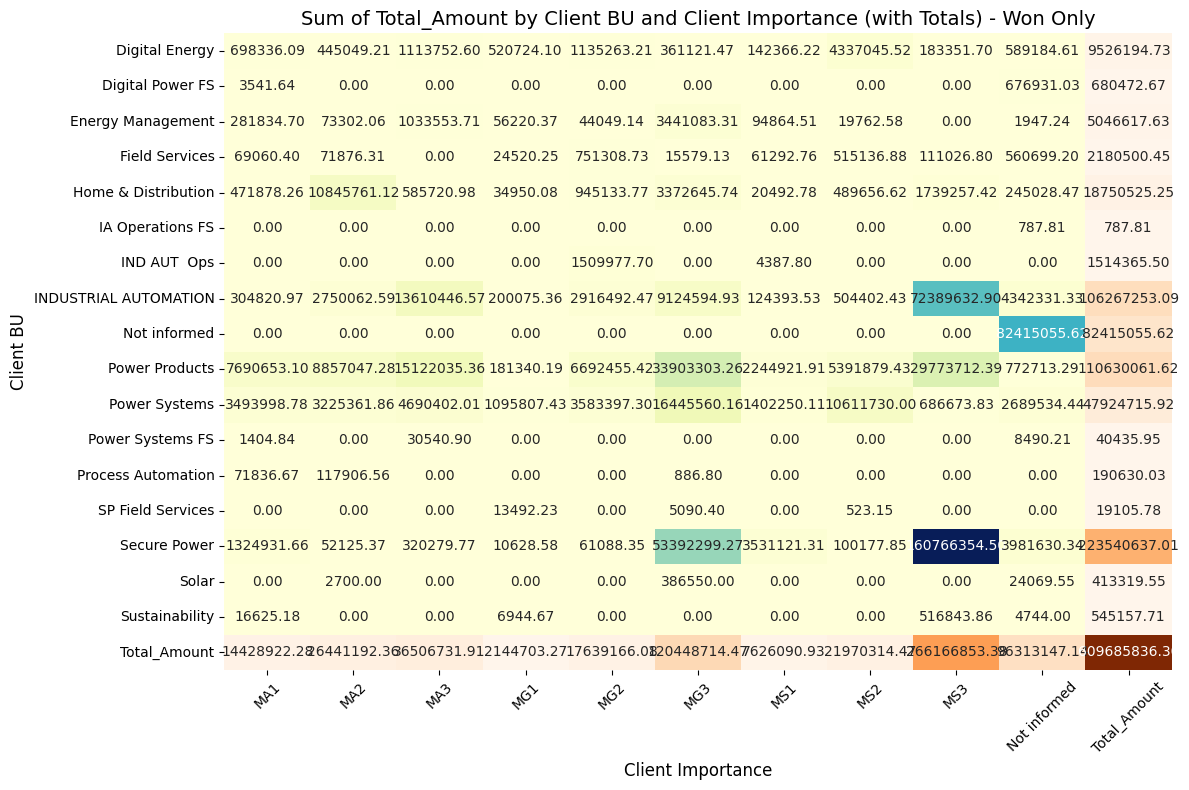

In [87]:
# Heatmap - Group by Client BU and Client Importance - WON ONLY


# Group by Client_BU and Client_importance to compute the sum of Total_Amount
heatmap_data = df_cleaned_bidwon.groupby(['Client_BU', 'Client_importance'])['Total_Amount'].sum().unstack(fill_value=0)

# Add a total column (sum across Client_importance for each Client_BU)
heatmap_data['Total_Amount'] = heatmap_data.sum(axis=1)

# Add a total row (sum across Client_BU for each Client_importance, including the total column)
heatmap_data.loc['Total_Amount'] = heatmap_data.sum(axis=0)

# Separate masks for main data and totals
main_mask = np.zeros_like(heatmap_data, dtype=bool)
main_mask[heatmap_data.index == 'Total_Amount', :] = True  # Mask total row
main_mask[:, heatmap_data.columns == 'Total_Amount'] = True  # Mask total column

total_mask = ~main_mask  # Inverse of the main mask to color only totals

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Main data heatmap
sns.heatmap(
    heatmap_data,
    mask=main_mask,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar=False,
    ax=ax
)

# Overlay heatmap for totals
sns.heatmap(
    heatmap_data,
    mask=total_mask,
    annot=True,
    fmt=".2f",
    cmap="Oranges",  # Different colormap for totals
    cbar=False,
    ax=ax
)

# Titles and labels
plt.title('Sum of Total_Amount by Client BU and Client Importance (with Totals) - Won Only', fontsize=14)
plt.xlabel('Client Importance', fontsize=12)
plt.ylabel('Client BU', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**Analysis**
Top contributors: 
- Secure Power MS3, MG3
- INDUSTRIAL AUTOMATION MS3
- Power Products MS3, MG3

### 10. Client BU distribution & amount

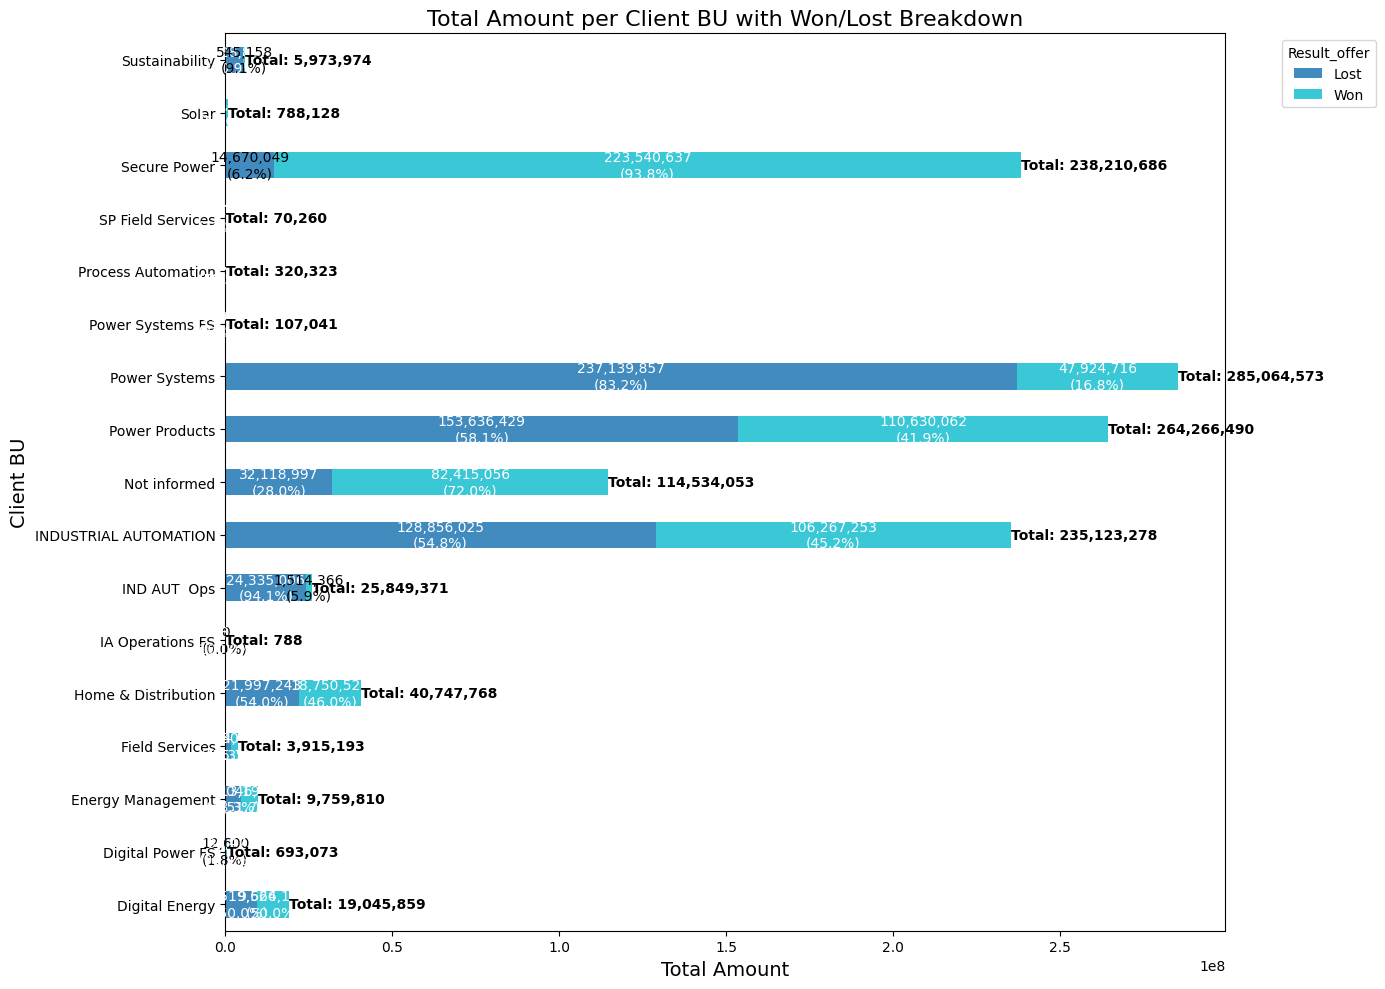

Result_offer                   Lost           Won  Won_Amount_Percent  Lost_Amount_Percent  Total_Amount    Won_Amount   Lost_Amount
Client_BU                                                                                                                           
Digital Energy         9.519664e+06  9.526195e+06               50.02                49.98  1.904586e+07  9.526195e+06  9.519664e+06
Digital Power FS       1.260000e+04  6.804727e+05               98.18                 1.82  6.930727e+05  6.804727e+05  1.260000e+04
Energy Management      4.713192e+06  5.046618e+06               51.71                48.29  9.759810e+06  5.046618e+06  4.713192e+06
Field Services         1.734692e+06  2.180500e+06               55.69                44.31  3.915193e+06  2.180500e+06  1.734692e+06
Home & Distribution    2.199724e+07  1.875053e+07               46.02                53.98  4.074777e+07  1.875053e+07  2.199724e+07
IA Operations FS       0.000000e+00  7.878090e+02              100.00

In [88]:
# Group by Client_BU and Result_offer: Total_Amount and calculate the sum
client_bu_total = df_cleaned_bidwonlost.groupby(['Client_BU', 'Result_offer'])['Total_Amount'].sum().unstack(fill_value=0)

# Calculate percentages for Total_Amount (for annotations)
client_bu_total_percent = (client_bu_total.T / client_bu_total.sum(axis=1)).T * 100

# Plot the data
fig, ax = plt.subplots(figsize=(14, 10))

# Create horizontal stacked bar plot for Total_Amount
client_bu_total.plot(kind='barh', stacked=True, colormap='tab10', alpha=0.85, ax=ax)

# Add annotations for each bar segment
for i, client_bu in enumerate(client_bu_total.index):
    cumulative = 0
    total_amount = client_bu_total.loc[client_bu].sum()  # Total amount for this Client_BU
    
    for result_offer, value in client_bu_total.loc[client_bu].items():
        percentage = client_bu_total_percent.loc[client_bu, result_offer]
        x_pos = cumulative + value / 2
        ax.text(
            x_pos, i, f"{value:,.0f}\n({percentage:.1f}%)", ha='center', va='center',
            fontsize=10, color='white' if percentage > 15 else 'black'
        )
        cumulative += value
    
    # Add total amount annotation at the end of the bar
    ax.text(
        cumulative, i, f"Total: {total_amount:,.0f}",
        ha='left', va='center', fontsize=10, color='black', fontweight='bold'
    )

# Customizing the plot
ax.set_title('Total Amount per Client BU with Won/Lost Breakdown', fontsize=16)
ax.set_xlabel('Total Amount', fontsize=14)
ax.set_ylabel('Client BU', fontsize=14)
ax.legend(title='Result_offer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

# Combine totals and percentages into a single DataFrame for display
combined_table = client_bu_total.copy()
combined_table['Won_Amount_Percent'] = client_bu_total_percent['Won'].round(2)
combined_table['Lost_Amount_Percent'] = client_bu_total_percent['Lost'].round(2)

# Add total amounts for completeness
combined_table['Total_Amount'] = client_bu_total.sum(axis=1)
combined_table['Won_Amount'] = client_bu_total['Won']
combined_table['Lost_Amount'] = client_bu_total['Lost']

# Display the combined table
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(combined_table)


**Analysis**
Top contributors & won rates: 
- Secure Power
- Power Products
- INDUSTRIAL AUTOMATION

### 11. Heatmap - Country and Client Importance

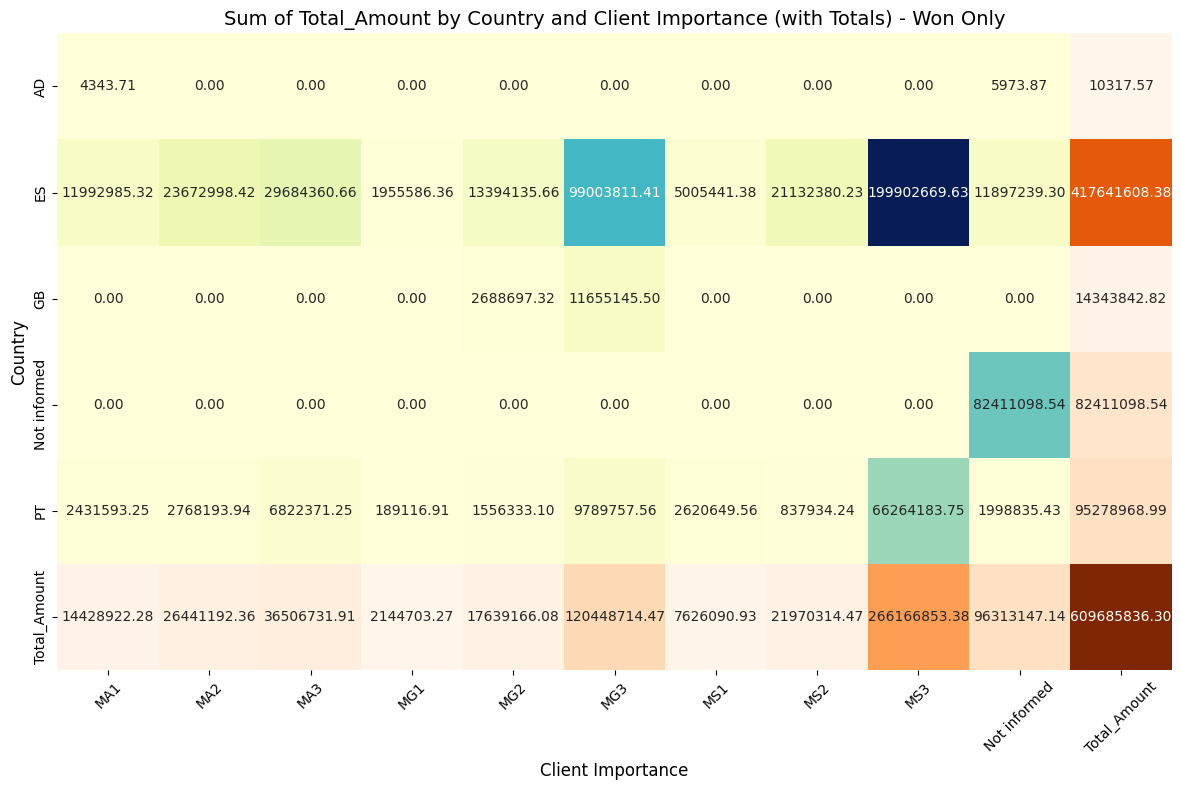

In [89]:
# Group by Country and Client_importance to compute the sum of Total_Amount
heatmap_data = df_cleaned_bidwon.groupby(['Country', 'Client_importance'])['Total_Amount'].sum().unstack(fill_value=0)

# Add a total column (sum across Client_importance for each Country)
heatmap_data['Total_Amount'] = heatmap_data.sum(axis=1)

# Add a total row (sum across Country for each Client_importance, including the total column)
heatmap_data.loc['Total_Amount'] = heatmap_data.sum(axis=0)

# Separate masks for main data and totals
main_mask = np.zeros_like(heatmap_data, dtype=bool)
main_mask[heatmap_data.index == 'Total_Amount', :] = True  # Mask total row
main_mask[:, heatmap_data.columns == 'Total_Amount'] = True  # Mask total column

total_mask = ~main_mask  # Inverse of the main mask to color only totals

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Main data heatmap
sns.heatmap(
    heatmap_data,
    mask=main_mask,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar=False,
    ax=ax
)

# Overlay heatmap for totals
sns.heatmap(
    heatmap_data,
    mask=total_mask,
    annot=True,
    fmt=".2f",
    cmap="Oranges",  # Different colormap for totals
    cbar=False,
    ax=ax
)

# Titles and labels
plt.title('Sum of Total_Amount by Country and Client Importance (with Totals) - Won Only', fontsize=14)
plt.xlabel('Client Importance', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**Analysis**
Top contributors: 
- ES MS3, MG3, MA3
- PT MS3

### 12. Country distribution

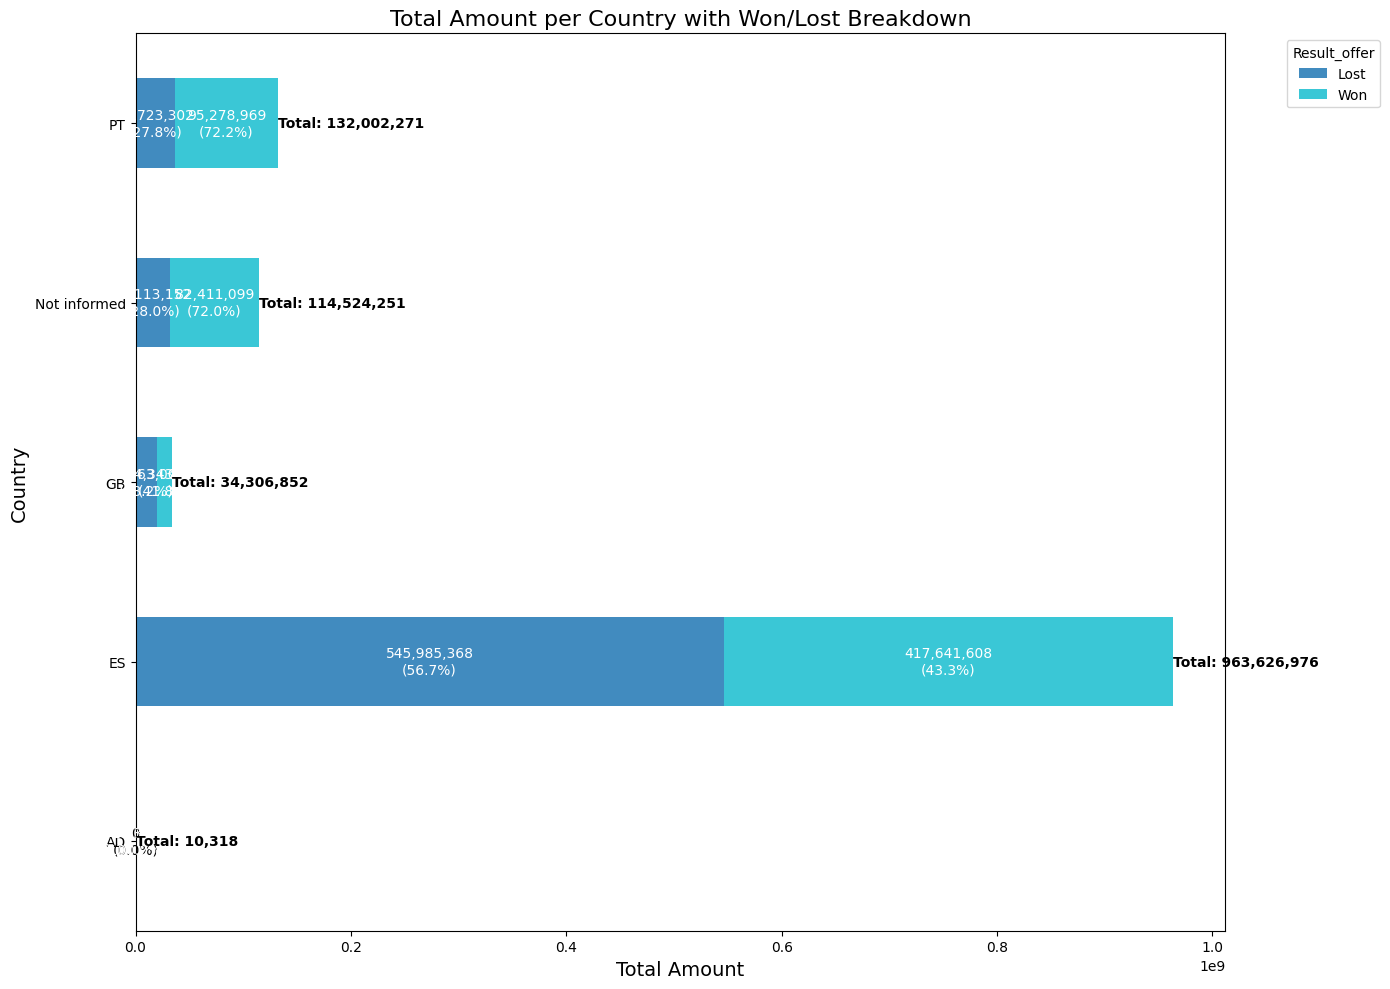

Result_offer          Lost           Won  Won_Amount_Percent  Lost_Amount_Percent  Total_Amount    Won_Amount   Lost_Amount
Country                                                                                                                    
AD            0.000000e+00  1.031757e+04              100.00                 0.00  1.031757e+04  1.031757e+04  0.000000e+00
ES            5.459854e+08  4.176416e+08               43.34                56.66  9.636270e+08  4.176416e+08  5.459854e+08
GB            1.996301e+07  1.434384e+07               41.81                58.19  3.430685e+07  1.434384e+07  1.996301e+07
Not informed  3.211315e+07  8.241110e+07               71.96                28.04  1.145243e+08  8.241110e+07  3.211315e+07
PT            3.672330e+07  9.527897e+07               72.18                27.82  1.320023e+08  9.527897e+07  3.672330e+07


In [90]:

# Group by Country and Result_offer: Total_Amount and calculate the sum
country_total = df_cleaned_bidwonlost.groupby(['Country', 'Result_offer'])['Total_Amount'].sum().unstack(fill_value=0)

# Calculate percentages for Total_Amount (for annotations)
country_total_percent = (country_total.T / country_total.sum(axis=1)).T * 100

# Plot the data
fig, ax = plt.subplots(figsize=(14, 10))

# Create horizontal stacked bar plot for Total_Amount
country_total.plot(kind='barh', stacked=True, colormap='tab10', alpha=0.85, ax=ax)

# Add annotations for each bar segment
for i, country in enumerate(country_total.index):
    cumulative = 0
    total_amount = country_total.loc[country].sum()  # Total amount for this Country
    
    for result_offer, value in country_total.loc[country].items():
        percentage = country_total_percent.loc[country, result_offer]
        x_pos = cumulative + value / 2
        ax.text(
            x_pos, i, f"{value:,.0f}\n({percentage:.1f}%)", ha='center', va='center',
            fontsize=10, color='white' if percentage > 15 else 'black'
        )
        cumulative += value
    
    # Add total amount annotation at the end of the bar
    ax.text(
        cumulative, i, f"Total: {total_amount:,.0f}",
        ha='left', va='center', fontsize=10, color='black', fontweight='bold'
    )

# Customizing the plot
ax.set_title('Total Amount per Country with Won/Lost Breakdown', fontsize=16)
ax.set_xlabel('Total Amount', fontsize=14)
ax.set_ylabel('Country', fontsize=14)
ax.legend(title='Result_offer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

# Combine totals and percentages into a single DataFrame for display
combined_table = country_total.copy()
combined_table['Won_Amount_Percent'] = country_total_percent['Won'].round(2)
combined_table['Lost_Amount_Percent'] = country_total_percent['Lost'].round(2)

# Add total amounts for completeness
combined_table['Total_Amount'] = country_total.sum(axis=1)
combined_table['Won_Amount'] = country_total['Won']
combined_table['Lost_Amount'] = country_total['Lost']

# Display the combined table
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(combined_table)


/var/folders/7p/yc1lsycx5vx8zxzbhm_81gy40000gn/T/ipykernel_84539/2429707391.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x=bottoms[i] + total / 2,  # Center horizontally


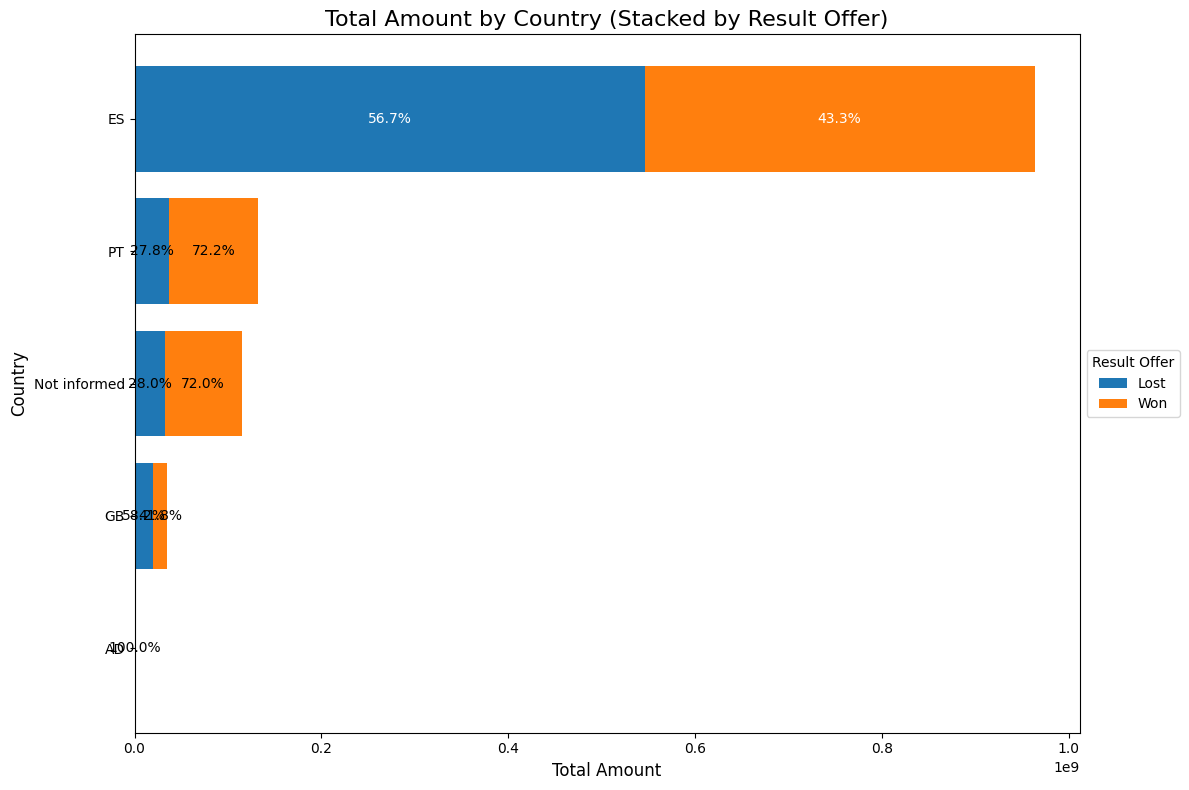

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate Total_Amount by Country and Result_offer
grouped_data = df_cleaned_bidwonlost.groupby(['Country', 'Result_offer'])['Total_Amount'].sum().reset_index()

# Order Country by the total amount won (descending)
won_amounts = grouped_data[grouped_data['Result_offer'] == 'Won'].sort_values(by='Total_Amount', ascending=True)
country_order = won_amounts['Country']

# Pivot data for stacking
pivot_data = grouped_data.pivot(index='Country', columns='Result_offer', values='Total_Amount').fillna(0)

# Reorder Country based on the calculated order
pivot_data = pivot_data.loc[country_order]

# Calculate percentages for each segment
percentages = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Plot stacked bar
plt.figure(figsize=(12, 8))
bottoms = pd.Series(0, index=pivot_data.index)  # Initialize the bottoms for stacking

for result_offer in pivot_data.columns:
    plt.barh(
        pivot_data.index, 
        pivot_data[result_offer], 
        left=bottoms, 
        label=result_offer
    )
    for i, (total, percent) in enumerate(zip(pivot_data[result_offer], percentages[result_offer])):
        if total > 0:  # Only annotate non-zero segments
            plt.text(
                x=bottoms[i] + total / 2,  # Center horizontally
                y=i,  # Align vertically
                s=f"{percent:.1f}%",  # Format percentage
                ha='center', 
                va='center', 
                fontsize=10,
                color='white' if total > pivot_data[result_offer].max() / 2 else 'black'  # Adjust text color
            )
    bottoms += pivot_data[result_offer]  # Update bottoms for stacking

# Customize the plot
plt.title("Total Amount by Country (Stacked by Result Offer)", fontsize=16)
plt.xlabel("Total Amount", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.legend(title="Result Offer", loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Show the plot
plt.show()


### 13. Market segment

/var/folders/7p/yc1lsycx5vx8zxzbhm_81gy40000gn/T/ipykernel_84539/3842710383.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


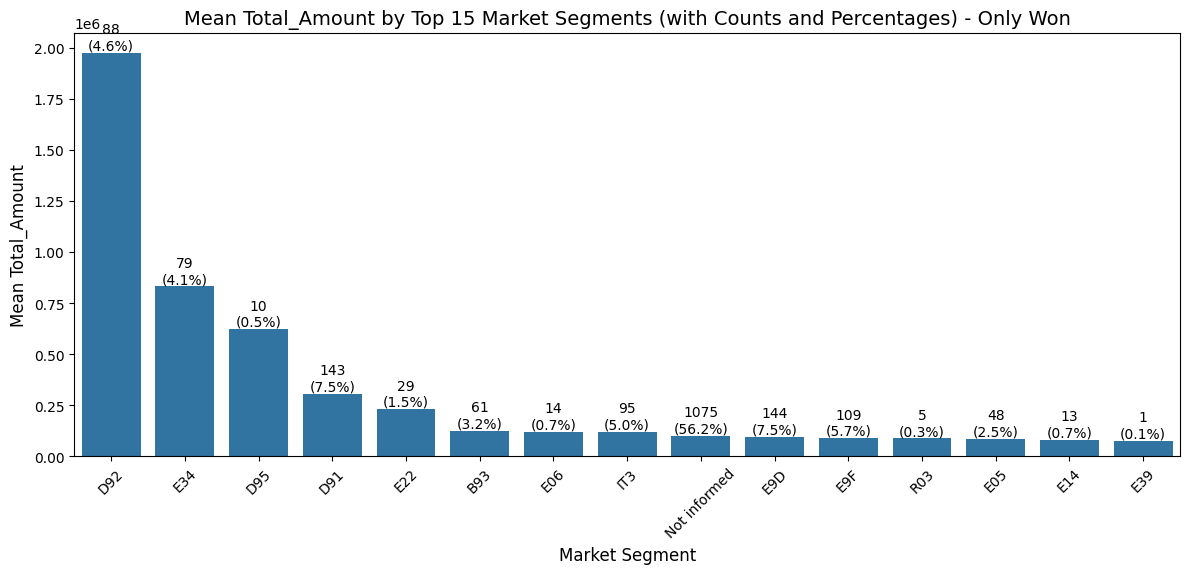

In [92]:
# Calculate mean Total_Amount for each Market Segment and get top 15
top_segments = (
    df_cleaned_bidwon.groupby('Market_segment')['Total_Amount']
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .index  # Get the top 15 segment names
)

# Filter the dataset to only include the top 15 Market Segments
df_top_segments = df_cleaned_bidwon[df_cleaned_bidwon['Market_segment'].isin(top_segments)]

# Calculate counts and percentages for the top 15 segments
market_segment_counts = df_top_segments['Market_segment'].value_counts()
total_count = market_segment_counts.sum()
market_segment_percentages = (market_segment_counts / total_count) * 100

# Create the barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_top_segments,
    x='Market_segment',
    y='Total_Amount',
    ci=None,
    estimator='mean',
    order=top_segments
)

# Annotate numbers and percentages on the bars
for bar in ax.patches:
    segment_index = int(bar.get_x() + bar.get_width() / 2)  # Get the bar's center x-coordinate
    segment = top_segments[segment_index]  # Retrieve the Market_segment name
    if segment in market_segment_counts.index:  # Only annotate if the segment exists
        count = market_segment_counts[segment]
        percent = market_segment_percentages[segment]
        # Annotate above the bar
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            bar.get_height() + 5,              # Slightly above the bar
            f"{count}\n({percent:.1f}%)",      # Count and percentage
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Customize plot appearance
plt.title('Mean Total_Amount by Top 15 Market Segments (with Counts and Percentages) - Only Won', fontsize=14)
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Mean Total_Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 14. Coverage model

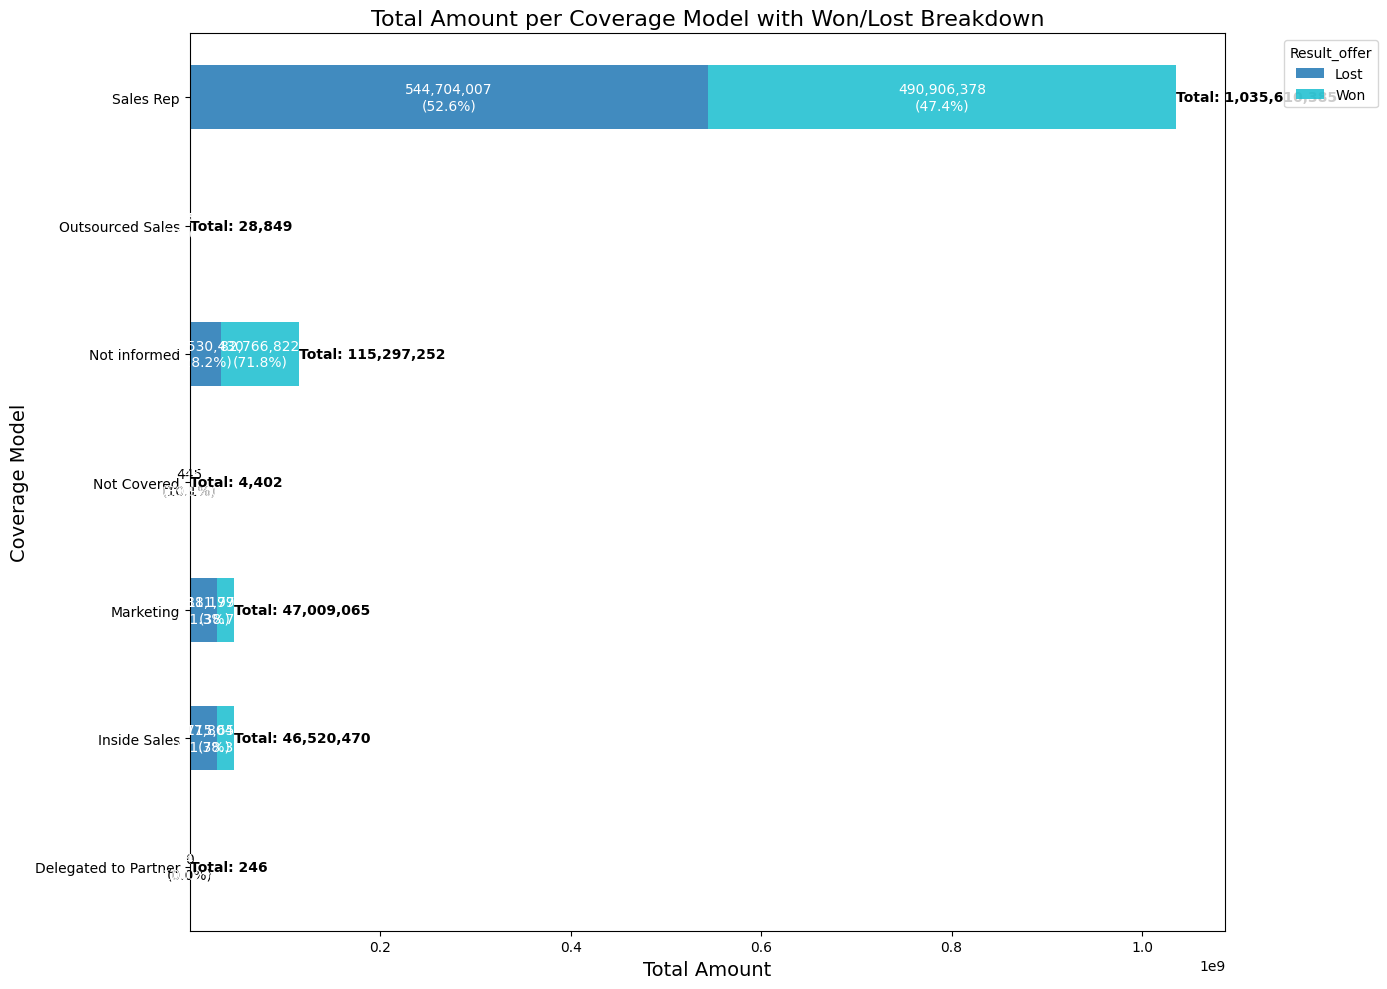

Result_offer                  Lost           Won  Won_Amount_Percent  Lost_Amount_Percent  Total_Amount    Won_Amount   Lost_Amount
Coverage_model                                                                                                                     
Delegated to Partner  0.000000e+00  2.463000e+02              100.00                 0.00  2.463000e+02  2.463000e+02  0.000000e+00
Inside Sales          2.871566e+07  1.780481e+07               38.27                61.73  4.652047e+07  1.780481e+07  2.871566e+07
Marketing             2.881179e+07  1.819727e+07               38.71                61.29  4.700906e+07  1.819727e+07  2.881179e+07
Not Covered           4.449660e+02  3.957087e+03               89.89                10.11  4.402053e+03  3.957087e+03  4.449660e+02
Not informed          3.253043e+07  8.276682e+07               71.79                28.21  1.152973e+08  8.276682e+07  3.253043e+07
Outsourced Sales      2.250000e+04  6.348552e+03               22.01        

In [93]:


# Group by Coverage_model and Result_offer: Total_Amount and calculate the sum
coverage_model_total = df_cleaned_bidwonlost.groupby(['Coverage_model', 'Result_offer'])['Total_Amount'].sum().unstack(fill_value=0)

# Calculate percentages for Total_Amount (for annotations)
coverage_model_total_percent = (coverage_model_total.T / coverage_model_total.sum(axis=1)).T * 100

# Plot the data
fig, ax = plt.subplots(figsize=(14, 10))

# Create horizontal stacked bar plot for Total_Amount
coverage_model_total.plot(kind='barh', stacked=True, colormap='tab10', alpha=0.85, ax=ax)

# Add annotations for each bar segment
for i, coverage_model in enumerate(coverage_model_total.index):
    cumulative = 0
    total_amount = coverage_model_total.loc[coverage_model].sum()  # Total amount for this Coverage_model
    
    for result_offer, value in coverage_model_total.loc[coverage_model].items():
        percentage = coverage_model_total_percent.loc[coverage_model, result_offer]
        x_pos = cumulative + value / 2
        ax.text(
            x_pos, i, f"{value:,.0f}\n({percentage:.1f}%)", ha='center', va='center',
            fontsize=10, color='white' if percentage > 15 else 'black'
        )
        cumulative += value
    
    # Add total amount annotation at the end of the bar
    ax.text(
        cumulative, i, f"Total: {total_amount:,.0f}",
        ha='left', va='center', fontsize=10, color='black', fontweight='bold'
    )

# Customizing the plot
ax.set_title('Total Amount per Coverage Model with Won/Lost Breakdown', fontsize=16)
ax.set_xlabel('Total Amount', fontsize=14)
ax.set_ylabel('Coverage Model', fontsize=14)
ax.legend(title='Result_offer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

# Combine totals and percentages into a single DataFrame for display
combined_table = coverage_model_total.copy()
combined_table['Won_Amount_Percent'] = coverage_model_total_percent['Won'].round(2)
combined_table['Lost_Amount_Percent'] = coverage_model_total_percent['Lost'].round(2)

# Add total amounts for completeness
combined_table['Total_Amount'] = coverage_model_total.sum(axis=1)
combined_table['Won_Amount'] = coverage_model_total['Won']
combined_table['Lost_Amount'] = coverage_model_total['Lost']

# Display the combined table
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(combined_table)


### 14. Coverage model and Client importance

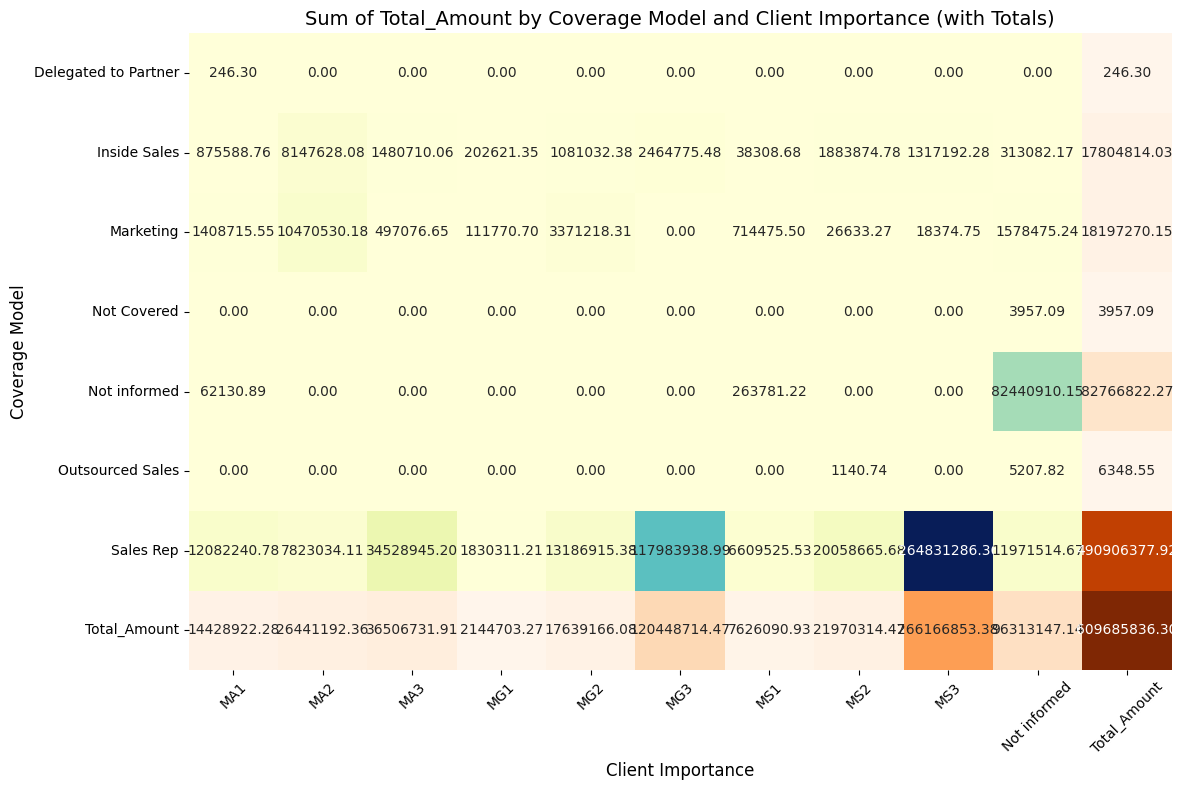

In [94]:
# Group by Coverage_model and Client_importance to compute the sum of Total_Amount
heatmap_data = df_cleaned_bidwon.groupby(['Coverage_model', 'Client_importance'])['Total_Amount'].sum().unstack(fill_value=0)

# Add a total column (sum across Client_importance for each Coverage_model)
heatmap_data['Total_Amount'] = heatmap_data.sum(axis=1)

# Add a total row (sum across Coverage_model for each Client_importance, including the total column)
heatmap_data.loc['Total_Amount'] = heatmap_data.sum(axis=0)

# Separate masks for main data and totals
main_mask = np.zeros_like(heatmap_data, dtype=bool)
main_mask[heatmap_data.index == 'Total_Amount', :] = True  # Mask total row
main_mask[:, heatmap_data.columns == 'Total_Amount'] = True  # Mask total column

total_mask = ~main_mask  # Inverse of the main mask to color only totals

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Main data heatmap
sns.heatmap(
    heatmap_data,
    mask=main_mask,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar=False,
    ax=ax
)

# Overlay heatmap for totals
sns.heatmap(
    heatmap_data,
    mask=total_mask,
    annot=True,
    fmt=".2f",
    cmap="Oranges",  # Different colormap for totals
    cbar=False,
    ax=ax
)

# Titles and labels
plt.title('Sum of Total_Amount by Coverage Model and Client Importance (with Totals)', fontsize=14)
plt.xlabel('Client Importance', fontsize=12)
plt.ylabel('Coverage Model', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### 14. Coverage model and Country

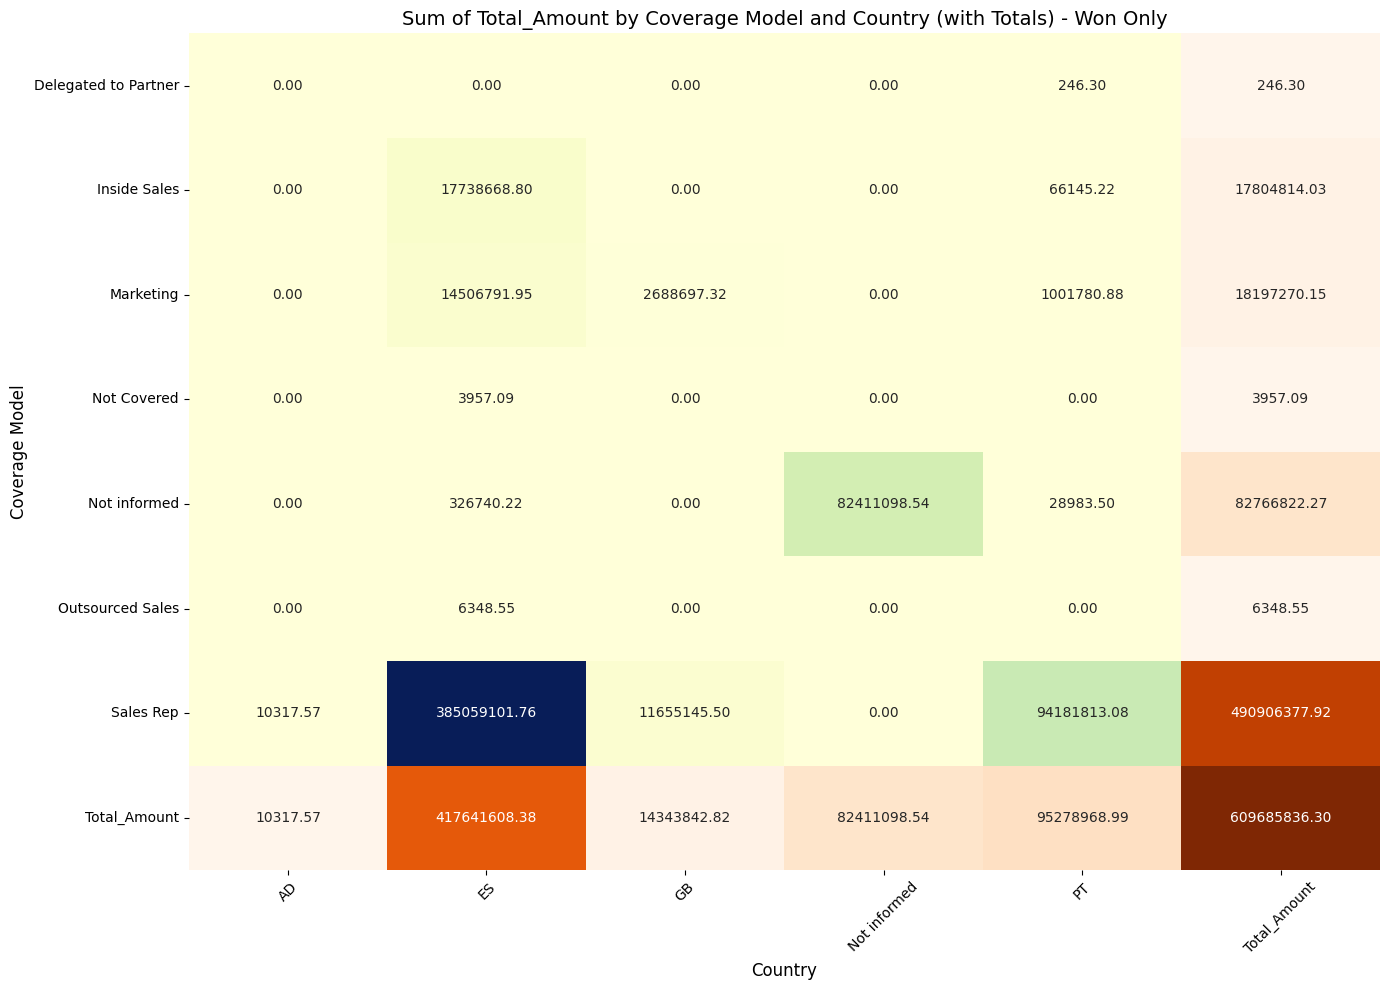

In [95]:

# Group by Coverage_model and Country to compute the sum of Total_Amount
heatmap_data = df_cleaned_bidwon.groupby(['Coverage_model', 'Country'])['Total_Amount'].sum().unstack(fill_value=0)

# Add a total column (sum across Country for each Coverage_model)
heatmap_data['Total_Amount'] = heatmap_data.sum(axis=1)

# Add a total row (sum across Coverage_model for each Country, including the total column)
heatmap_data.loc['Total_Amount'] = heatmap_data.sum(axis=0)

# Separate masks for main data and totals
main_mask = np.zeros_like(heatmap_data, dtype=bool)
main_mask[heatmap_data.index == 'Total_Amount', :] = True  # Mask total row
main_mask[:, heatmap_data.columns == 'Total_Amount'] = True  # Mask total column

total_mask = ~main_mask  # Inverse of the main mask to color only totals

# Plot the heatmap
fig, ax = plt.subplots(figsize=(14, 10))

# Main data heatmap
sns.heatmap(
    heatmap_data,
    mask=main_mask,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar=False,
    ax=ax
)

# Overlay heatmap for totals
sns.heatmap(
    heatmap_data,
    mask=total_mask,
    annot=True,
    fmt=".2f",
    cmap="Oranges",  # Different colormap for totals
    cbar=False,
    ax=ax
)

# Titles and labels
plt.title('Sum of Total_Amount by Coverage Model and Country (with Totals) - Won Only', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Coverage Model', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


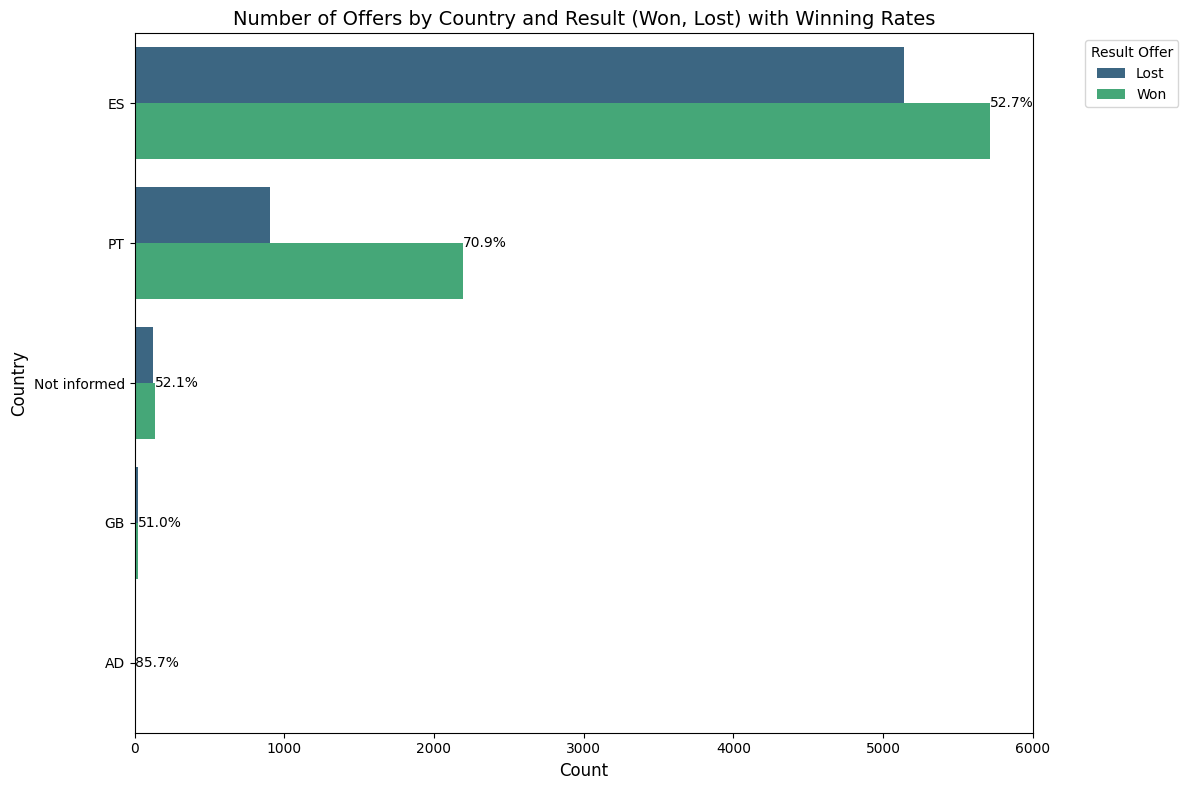

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is already loaded with your dataset

# Exclude 'Pipeline' from the Result_offer
df_cleaned_filtered = df_cleaned[df_cleaned['Result_offer'] != 'Pipeline']

# Group the data by Country and Result_offer and count occurrences
country_result_offer_counts = df_cleaned_filtered.groupby(['Country', 'Result_offer']).size().reset_index(name='Count')

# Calculate the total offers and winning rate for each country
country_totals = df_cleaned_filtered.groupby('Country').size()
country_wins = df_cleaned_filtered[df_cleaned_filtered['Result_offer'] == 'Won'].groupby('Country').size()
winning_rates = (country_wins / country_totals * 100).fillna(0)  # Winning rate as a percentage

# Merge winning rates into the grouped data
country_result_offer_counts['Winning Rate (%)'] = country_result_offer_counts['Country'].map(winning_rates)

# Create a bar plot to show the counts per Country and Result_offer
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=country_result_offer_counts,
    y='Country',
    x='Count',
    hue='Result_offer',
    palette="viridis",
    order=df_cleaned_filtered['Country'].value_counts().index
)

# Annotate winning rates next to the "Won" bars
for i, row in country_result_offer_counts.iterrows():
    if row['Result_offer'] == 'Won':
        plt.text(
            x=row['Count'] - 1,  # Position slightly to the left of the bar
            y=row['Country'],
            s=f"{row['Winning Rate (%)']:.1f}%",  # Winning rate formatted
            color="black", va="center"
        )

# Customize the title and labels
plt.title('Number of Offers by Country and Result (Won, Lost) with Winning Rates', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Move the legend outside the plot
plt.legend(title='Result Offer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


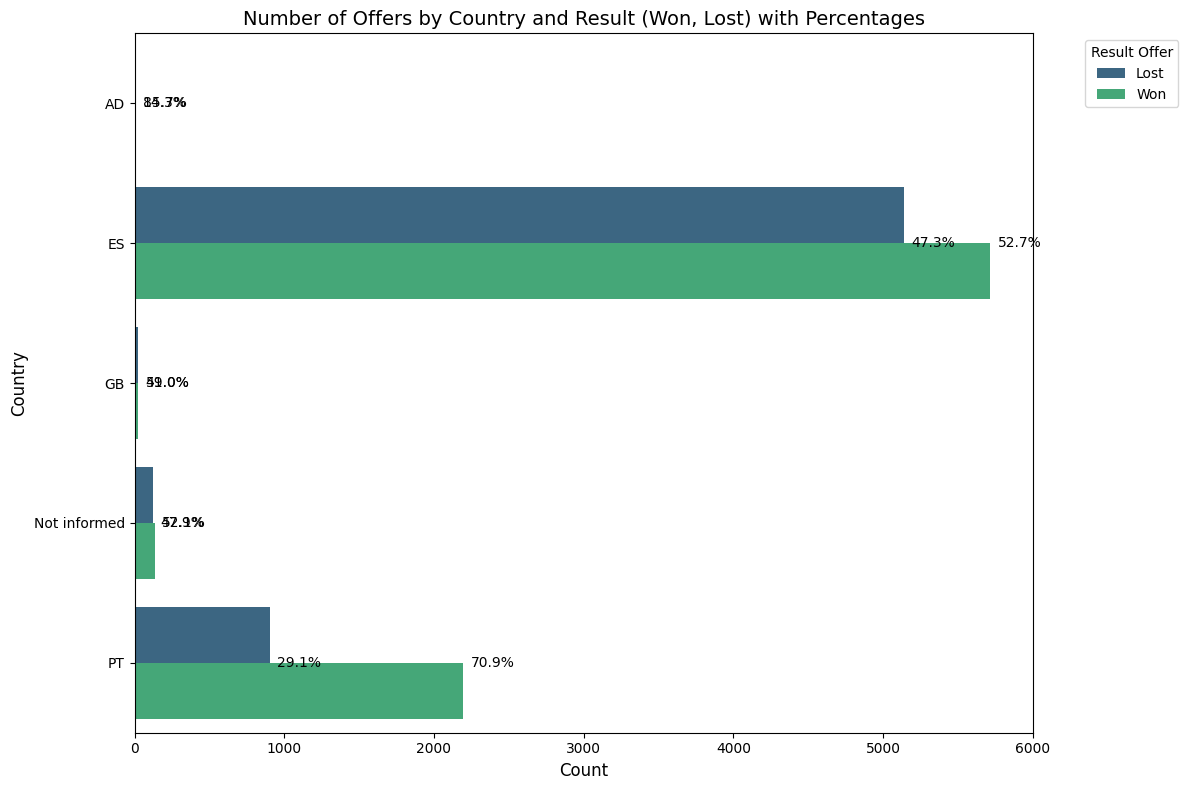

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is already loaded with your dataset

# Exclude 'Pipeline' from the Result_offer
df_cleaned_filtered = df_cleaned[df_cleaned['Result_offer'] != 'Pipeline']

# Group the data by Country and Result_offer and count occurrences
country_result_offer_counts = df_cleaned_filtered.groupby(['Country', 'Result_offer']).size().reset_index(name='Count')

# Calculate percentages for each Result_offer per Country
country_result_offer_counts['Percentage'] = (
    country_result_offer_counts.groupby('Country')['Count']
    .transform(lambda x: x / x.sum() * 100)
)

# Create a bar plot to show the counts per Country and Result_offer
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=country_result_offer_counts,
    y='Country',
    x='Count',
    hue='Result_offer',
    palette="viridis",
    order=country_result_offer_counts['Country'].value_counts().index
)

# Annotate the percentages **next to the bars**
for i, row in country_result_offer_counts.iterrows():
    plt.text(
        x=row['Count'] + 50,  # Slightly outside the bar
        y=row['Country'],
        s=f"{row['Percentage']:.1f}%",  # Format as percentage
        color="black",
        ha="left", va="center", fontsize=10
    )

# Customize the title and labels
plt.title('Number of Offers by Country and Result (Won, Lost) with Percentages', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Move the legend outside the plot
plt.legend(title='Result Offer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


# end